In [547]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from scipy.ndimage import gaussian_filter1d
from pandas import DataFrame, Series
import matplotlib.pylab as plt
import seaborn as sns 
import pandas as pd
import numpy as np
import datetime
import pyproj 
import random
import os
import io

%matplotlib inline
np.set_printoptions(precision=3 , suppress= True)

In [548]:
#initial parameters - path
folder_path = '/home/rafaela/internship/time_series/TimeSeries-insar/egm_files'
file_path = os.path.join(folder_path, 'EGMS_L3_E44N25_100km_E.csv')
teste = pd.read_csv(file_path)

teste_reduced = teste.iloc[:,list(range(1, 4)) + list(range(11, 375))]
print(teste_reduced)

        easting  northing  height  20160105  20160111  20160117  20160123  \
0       4499150   2596450  2186.4       3.2       5.8       3.2       1.6   
1       4499350   2596550  2060.1       8.4       6.5       6.2       4.6   
2       4499150   2596550  2112.4      -1.0      -0.8      -2.5      -3.2   
3       4498950   2596550  2075.7       1.7       0.9       0.3      -1.1   
4       4498850   2596550  2024.0       1.1       1.5       2.7       0.8   
...         ...       ...     ...       ...       ...       ...       ...   
209839  4415850   2516650   565.8      -0.9      -0.2      -0.1      -0.8   
209840  4415950   2516650   563.0      -0.0      -0.4      -0.4      -0.4   
209841  4416050   2516650   551.3      -1.2      -0.6      -0.4       2.4   
209842  4416150   2516650   537.0       2.0      -0.3      -1.1      -2.4   
209843  4416250   2516750   535.2      -1.0       0.2       0.5      -1.1   

        20160129  20160204  20160210  ...  20211029  20211104  20211110  \


In [550]:
#define the ETRS89-LAEA and the UTM projection
etrs89_laea = pyproj.CRS("EPSG:3035")
wgs84 = pyproj.CRS("EPSG:4326")
utm_32 = pyproj.CRS("EPSG:23032")

In [551]:
teste_new = teste_reduced.copy()

transformer = pyproj.Transformer.from_crs(etrs89_laea, wgs84)
teste_new["latitude"], teste_new["longitude"] = transformer.transform(teste_new["northing"].to_numpy(), teste_new["easting"].to_numpy())

print(teste_new)

        easting  northing  height  20160105  20160111  20160117  20160123  \
0       4499150   2596450  2186.4       3.2       5.8       3.2       1.6   
1       4499350   2596550  2060.1       8.4       6.5       6.2       4.6   
2       4499150   2596550  2112.4      -1.0      -0.8      -2.5      -3.2   
3       4498950   2596550  2075.7       1.7       0.9       0.3      -1.1   
4       4498850   2596550  2024.0       1.1       1.5       2.7       0.8   
...         ...       ...     ...       ...       ...       ...       ...   
209839  4415850   2516650   565.8      -0.9      -0.2      -0.1      -0.8   
209840  4415950   2516650   563.0      -0.0      -0.4      -0.4      -0.4   
209841  4416050   2516650   551.3      -1.2      -0.6      -0.4       2.4   
209842  4416150   2516650   537.0       2.0      -0.3      -1.1      -2.4   
209843  4416250   2516750   535.2      -1.0       0.2       0.5      -1.1   

        20160129  20160204  20160210  ...  20211110  20211116  20211122  \


In [54]:
#teste_new = teste_reduced.copy()

#transformer = pyproj.Transformer.from_crs(etrs89_laea, utm_32)

#for index, row in teste_reduced.iterrows():
 #   northing, easting = row["northing"], row["easting"] 
 #   longitude, latitude = transformer.transform(northing, easting)
 #   teste_new.at[index, "longitude"] = longitude
 #   teste_new.at[index, "latitude"] = latitude

#print(teste_new)

In [583]:
latitude_min = 46.100
latitude_max = 46.300
longitude_min = 11.650
longitude_max = 12.100

teste_area_selected = teste_new[((teste_new['latitude'] > latitude_min) & (teste_new['latitude'] < latitude_max) &
                  (teste_new['longitude'] > longitude_min) & (teste_new['longitude'] < longitude_max))]

print(teste_area_selected)

        easting  northing  height  20160105  20160111  20160117  20160123  \
64170   4480850   2569650  1857.3       2.0       1.9       2.2      -1.3   
64171   4480150   2569650  1868.8      -3.0      -2.4      -1.7      -1.2   
64172   4479850   2569650  1537.8       2.1       1.9       1.8      -0.7   
64173   4480550   2569650  1774.5       1.9       1.9       4.7       4.3   
64174   4480450   2569750  1847.8       1.1       1.2      -0.4      -1.3   
...         ...       ...     ...       ...       ...       ...       ...   
137184  4452250   2557150  1682.2       0.5       0.5       0.0       0.3   
137185  4452450   2557250  1665.6      -0.2      -0.0       0.3       0.5   
137186  4450650   2557550  1609.6       1.1       0.9       1.2       1.7   
137187  4451250   2557550  1614.5      -0.4      -0.3       0.2       1.1   
137188  4451650   2557650  1618.6       0.2       0.8       0.9       0.9   

        20160129  20160204  20160210  ...  20211110  20211116  20211122  \


In [481]:
teste_new.loc[1789]

easting      4.581650e+06
northing     2.526650e+06
height       7.100000e+00
20160105     1.400000e+00
20160111     6.000000e-01
                 ...     
20211210    -2.700000e+00
20211216    -2.000000e+00
20211222    -2.600000e+00
latitude     4.579981e+01
longitude    1.334953e+01
Name: 1789, Length: 369, dtype: float64

In [584]:
def selec_points(teste_area_selected, indice_number):
    points_location = teste_area_selected.iloc[indice_number, 367:369]
    teste_point = teste_area_selected.iloc[indice_number, 3:367]
    teste_point.index = pd.to_datetime(teste_point.index, format='%Y%m%d')
    points_dataframe = pd.DataFrame(teste_point, columns=[teste_point.name])
    return (points_dataframe, points_location)
    
num_points = 500
indicies = random.choices(range(len(teste_area_selected)), k = num_points)
points_dictionaire = {}
points_location_list = []

for indice_number in indicies:
    points_dataframe, points_location = selec_points(teste_area_selected, indice_number)
    points_dictionaire[indice_number] = points_dataframe
    points_location_list.append(points_location)


In [585]:
points_location_df = pd.DataFrame(points_location_list)
points_file_path = "/home/rafaela/internship/time_series/TimeSeries-insar/egm_files/points_location_list_east.csv"
points_location_df.to_csv(points_file_path, index=True)

In [586]:
def linear_detrend(column_name, indice_data):
 
    #getting the linear model to substract from the original time series:    
    x = np.arange(len(indice_data)).reshape(-1, 1)
    y = indice_data.values.reshape(-1, 1)
    
    linear_model = LinearRegression().fit(x, y)
    regression_line = linear_model.predict(x)
    
    detrended_values = y.flatten() - regression_line.flatten()
    #detrended_values = station_data[f'{station_name}_east(m)'].values - regression_line.flatten()
    
    detrended_dataframe = pd.DataFrame(
        detrended_values, 
        index=indice_data.index, 
        columns=[f'{column_name}_east(mm)_detrended'])
        
    return detrended_dataframe


#dictionaries to store the data
detrended_data_dict = {}

#calling the function
for indice_number, indice_data in points_dictionaire.items():
    
    column_name = indice_data.columns[0]
    detrended_dataframe = linear_detrend(
        column_name, 
        indice_data)
    detrended_data_dict[column_name] = detrended_dataframe

#printing dataframe
#stations detrended
#for indice_number, indice_data in detrended_data_dict.items():
    #print(f'{indice_number}: \n{indice_data}\n')

In [587]:
def remove_outliers(indice_number, indice_data):
    limiar_z = 4.0
    
    
    selecting_outliers = indice_data[(np.abs(indice_data-indice_data.mean()) 
                                              < limiar_z*indice_data.std())]
    
    
    outliers_removed_dataframe = pd.DataFrame(selecting_outliers, 
                                              index=indice_data.index)
    
    outliers_removed_dataframe = outliers_removed_dataframe.rename(
        columns={f'{indice_number}_east(mm)_detrended':f'{indice_number}_east(mm)'})  
    
    outliers_removed_dataframe.dropna(inplace=True)
    
    return outliers_removed_dataframe

#dictionaries to store the data
area_outliers_removed_dict = {}

#calling the function
for indice_number, indice_data in detrended_data_dict.items():
    outliers_removed_dataframe = remove_outliers(
        indice_number, 
        indice_data)
    area_outliers_removed_dict[indice_number] = outliers_removed_dataframe

#printing dataframe
#stations detrended
#for indice_number, indice_data in area_outliers_removed_dict.items():
    #print(f'{indice_number}: \n{indice_data}\n')

In [582]:
def create_station_file (
    area_outliers_removed_dict,
    index_selected, 
    station_name,
    folder_path):
    
    station_file = area_outliers_removed_dict[index_selected].squeeze()
    station_file_df = pd.DataFrame(station_file)
    station_file_df.columns = [index_selected]
    
    return station_file_df

station_file_dict = {}
indexes_selected = [76159, 76120, 75492, 75613, 75587, 74799, 75429, 74942, 75136, 76594, 65870, 76613,
                    76075, 76134, 75982, 75235, 74780, 76227, 75020, 76623, 76808, 75073, 75453, 76172,
                    75617, 76565, 75483, 75379, 76290]


for index_selected, station_name, in zip(indexes_selected, [file_station_name]*len(indexes_selected)):
    
    station_file_df = create_station_file(area_outliers_removed_dict,
                                          index_selected, 
                                          station_name,
                                          folder_path)
    
    station_file_dict[index_selected] = station_file_df

KeyError: 76159

In [566]:
station_name = 'brse'
folder_path = '/home/rafaela/internship/time_series/TimeSeries-insar/egm_files/insar_ts_plots/east/'


concatenated_df = pd.concat(station_file_dict.values(), axis=1)
file_path = os.path.join(folder_path, f'{station_name}.csv')
concatenated_df.to_csv(file_path, index=True)

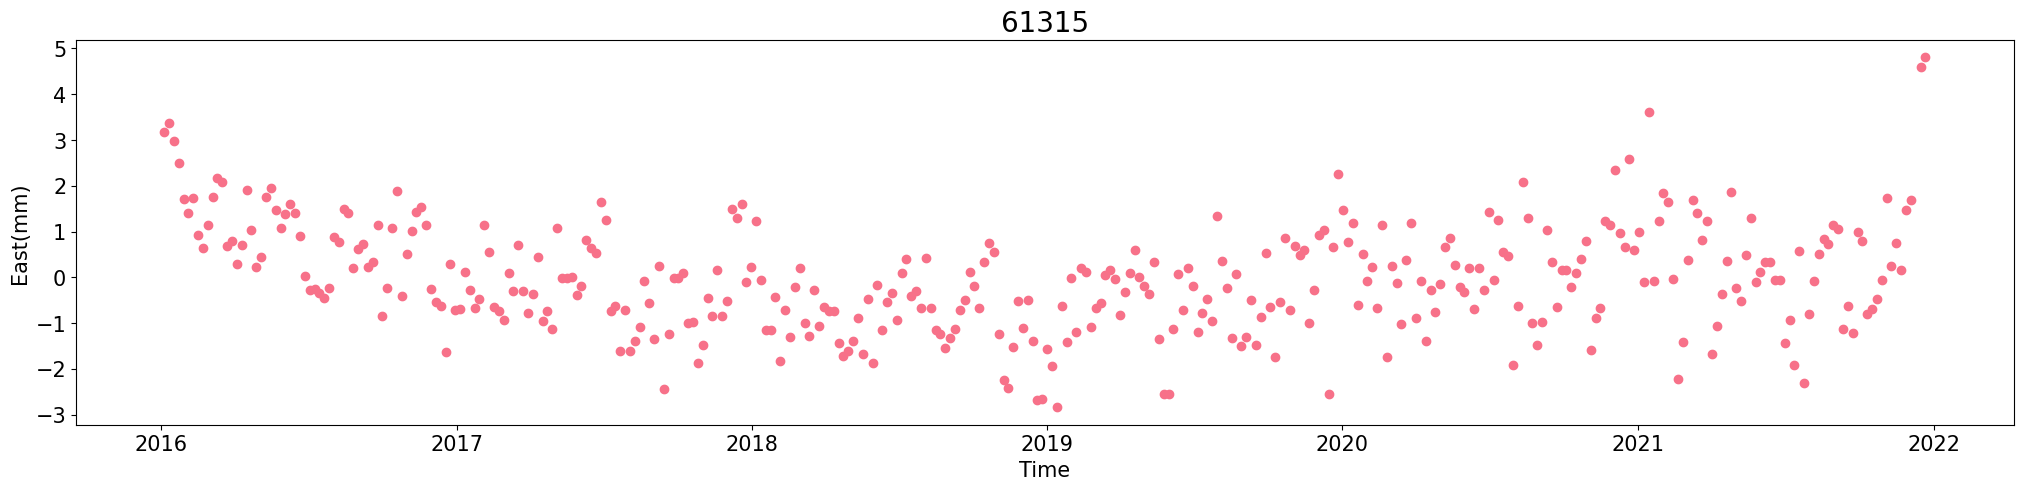

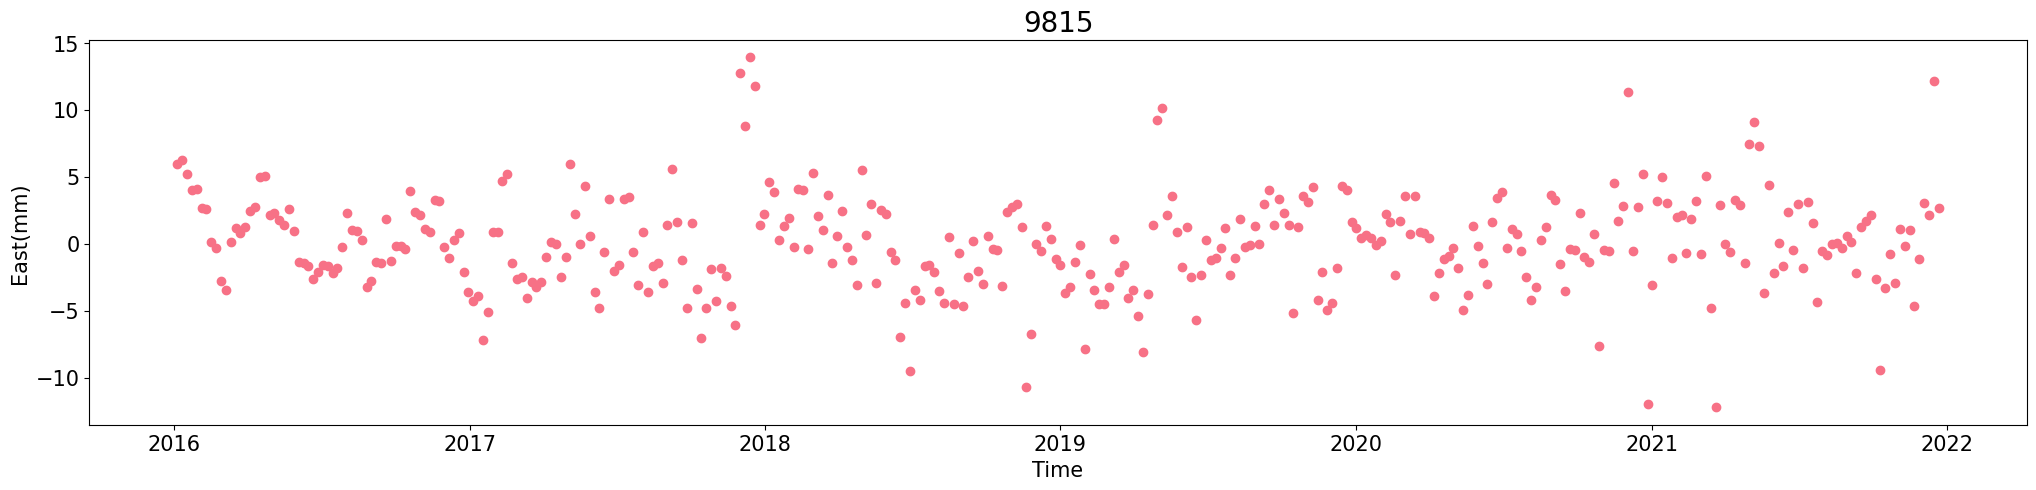

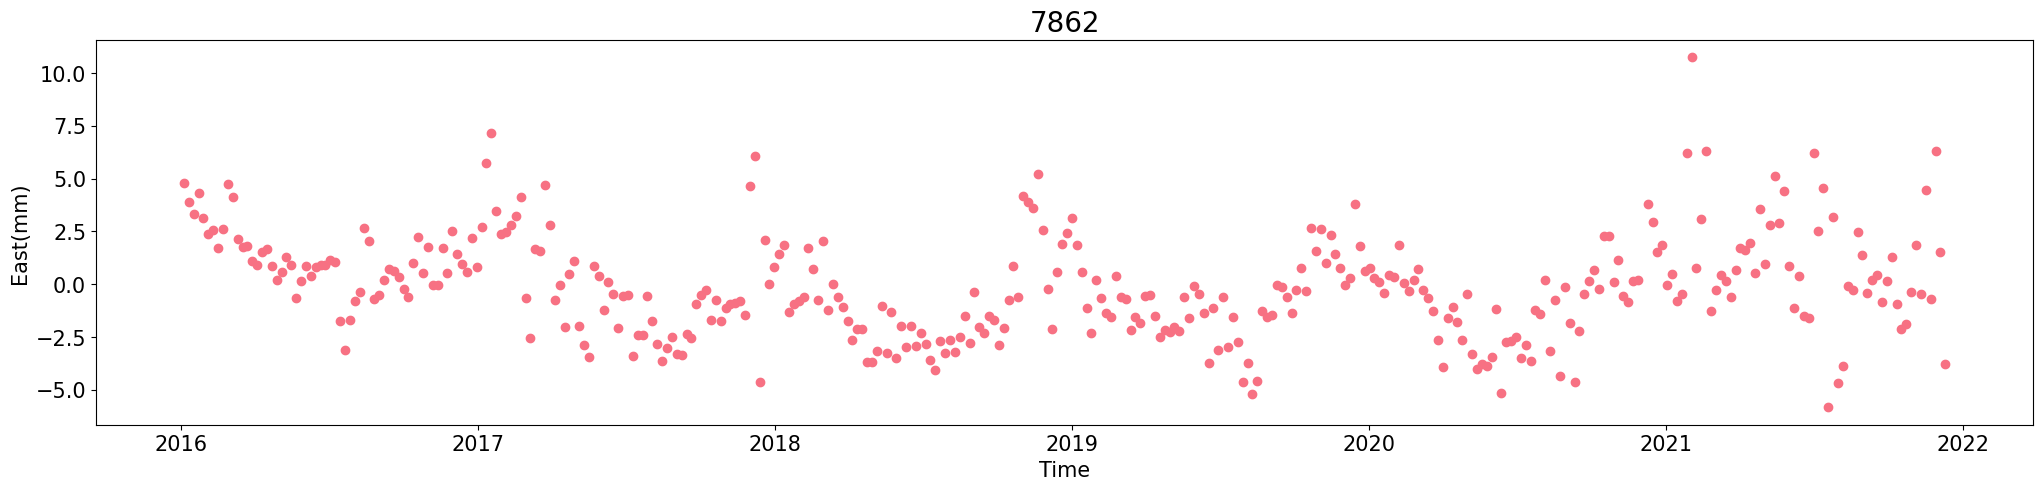

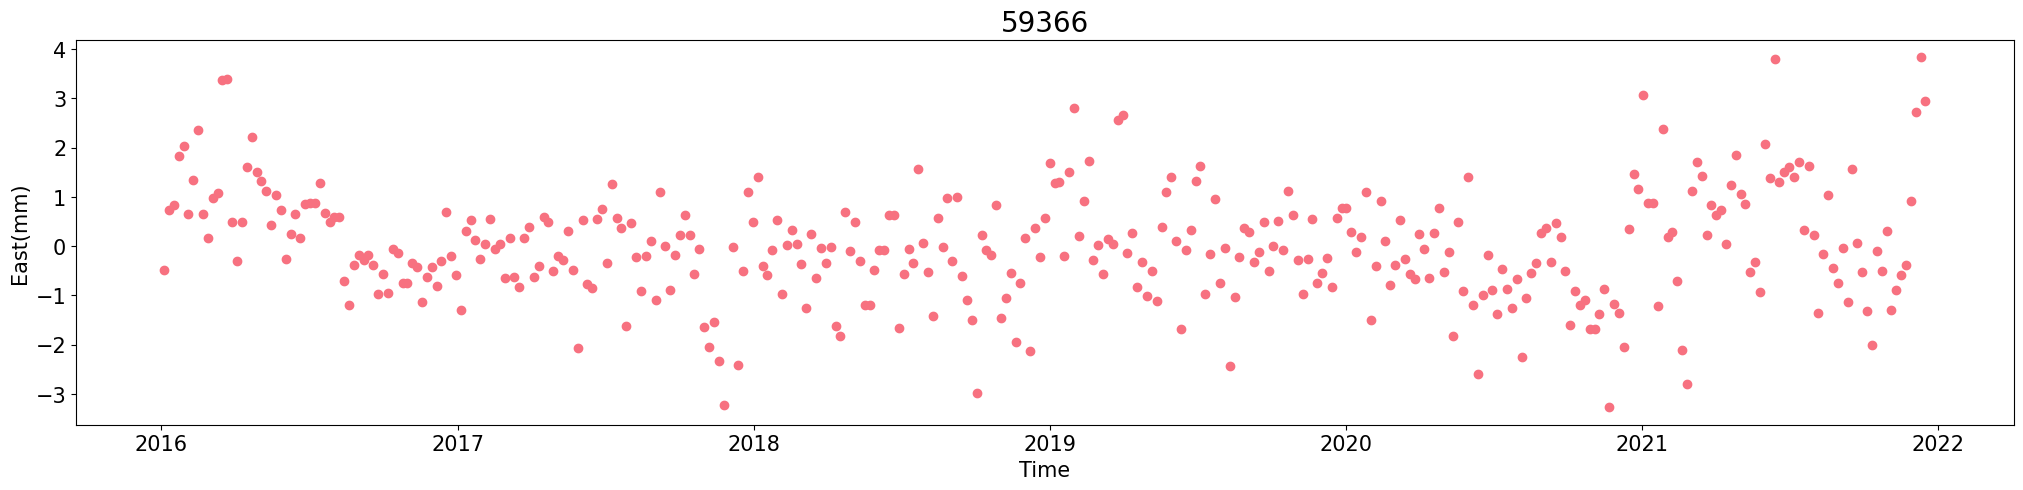

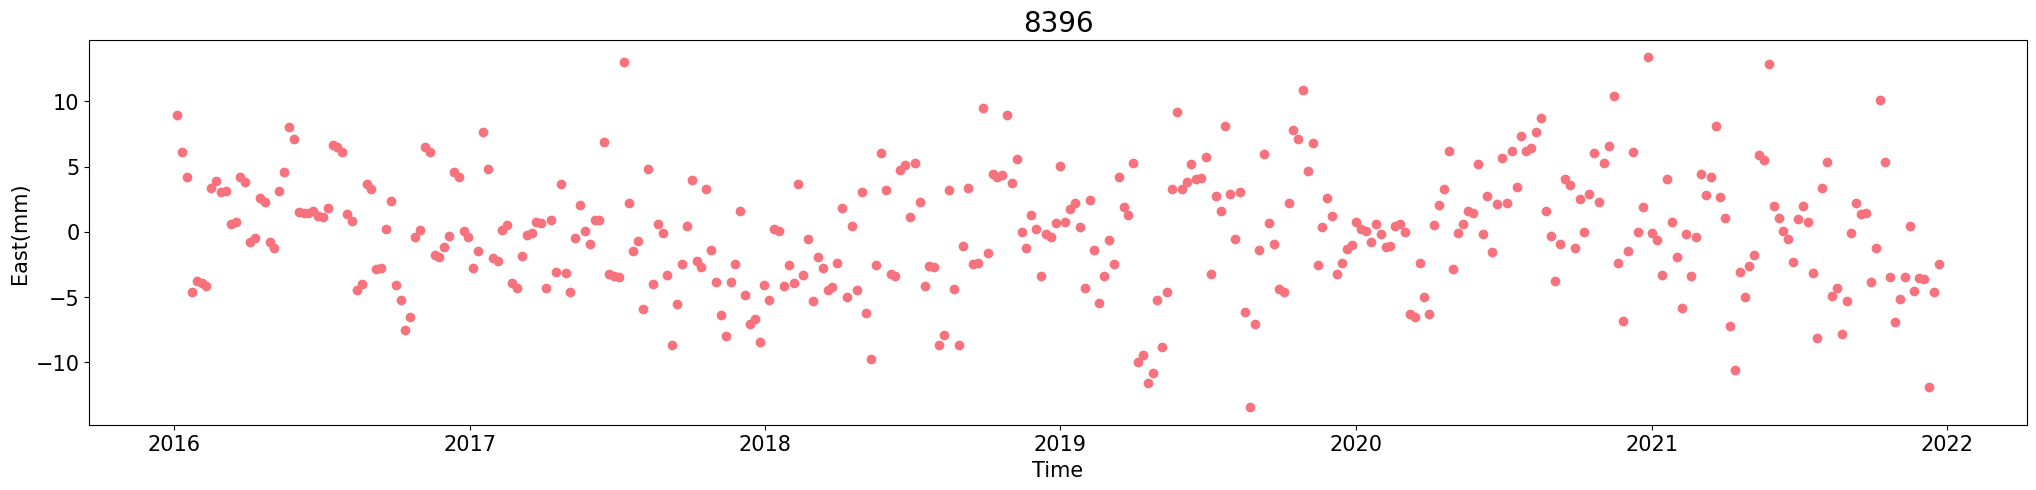

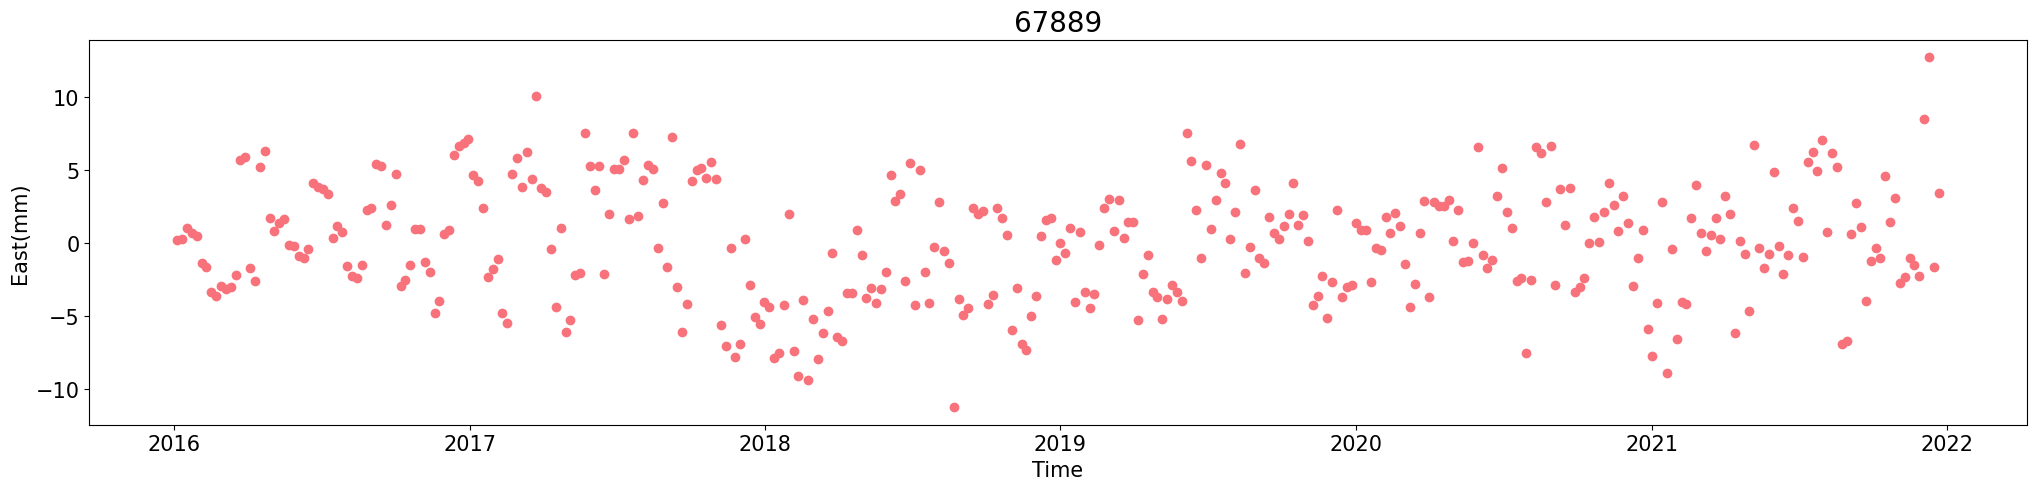

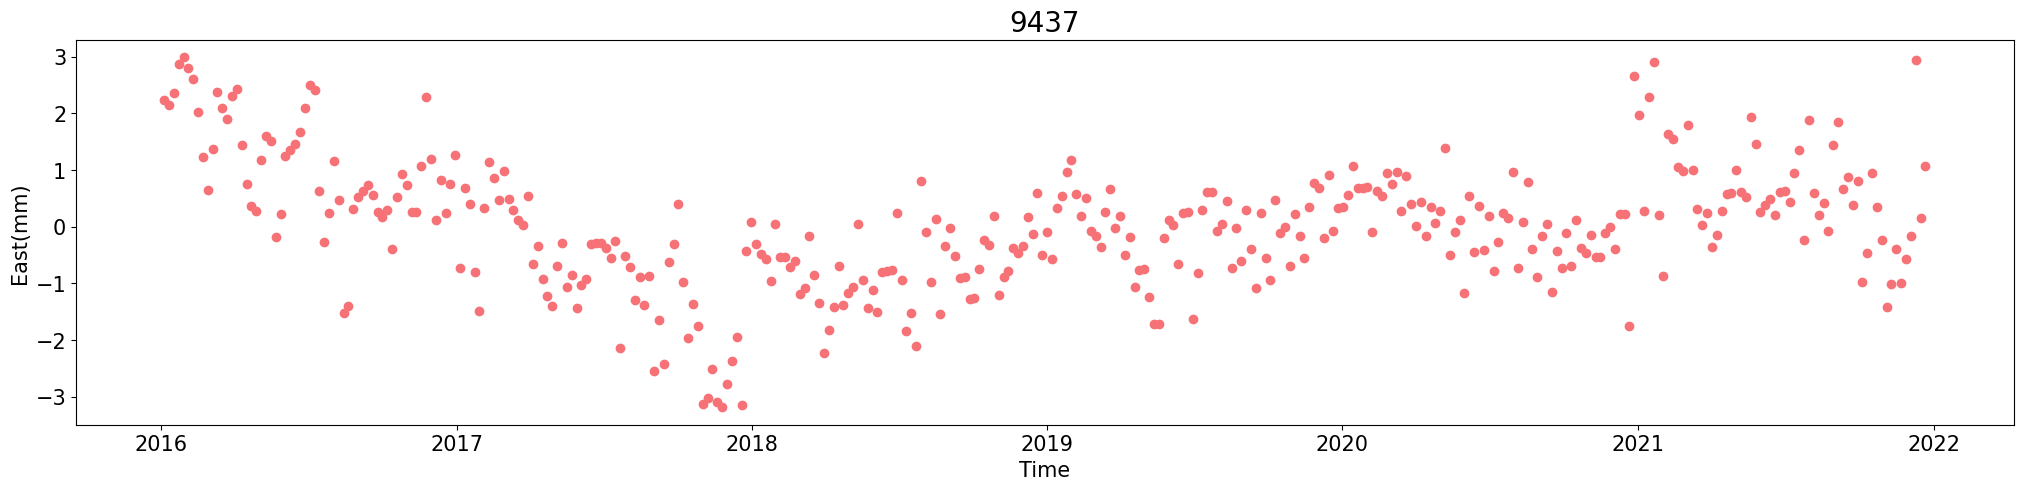

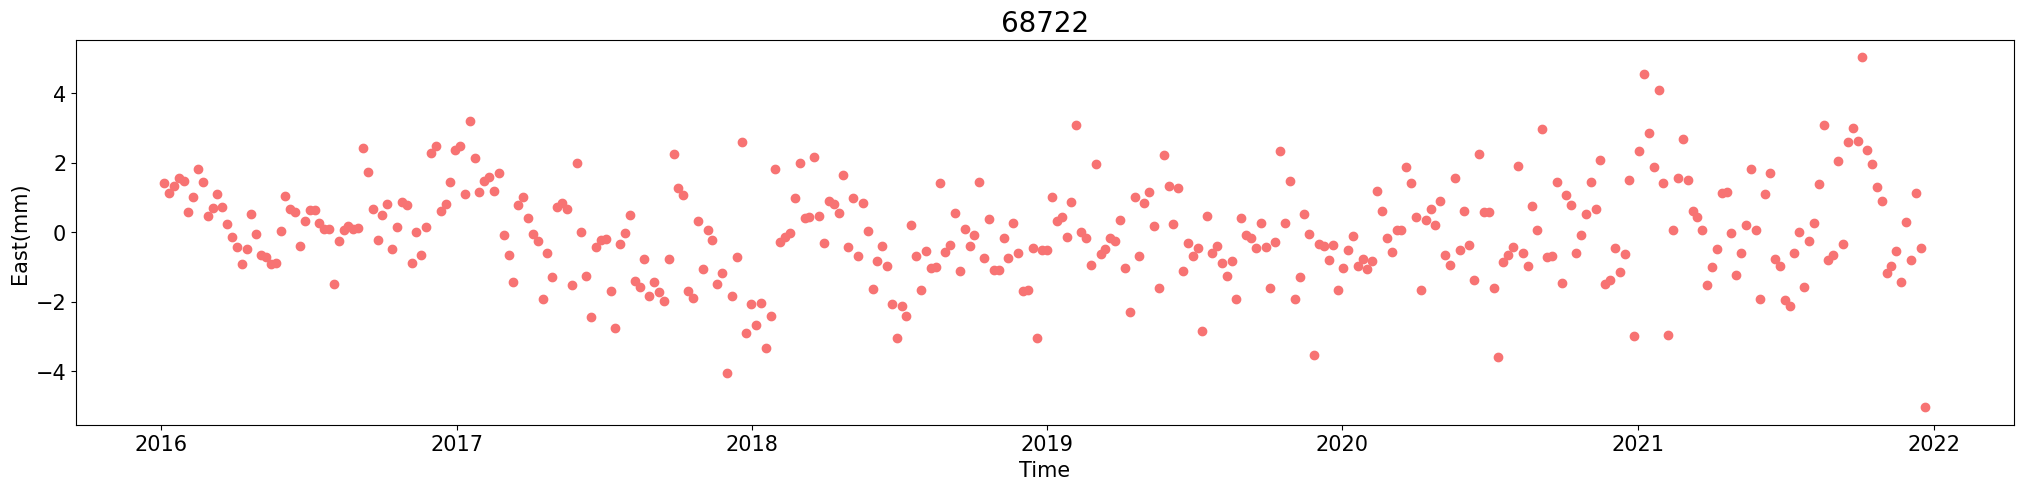

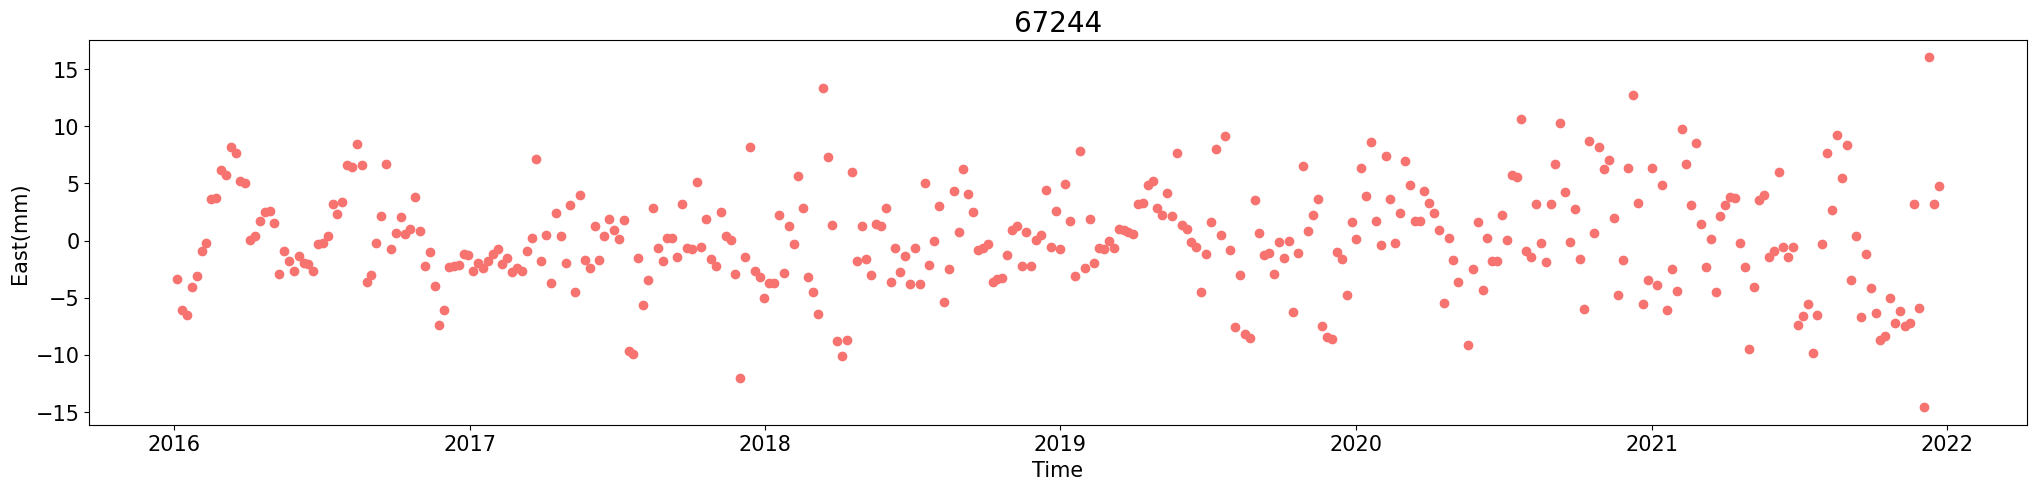

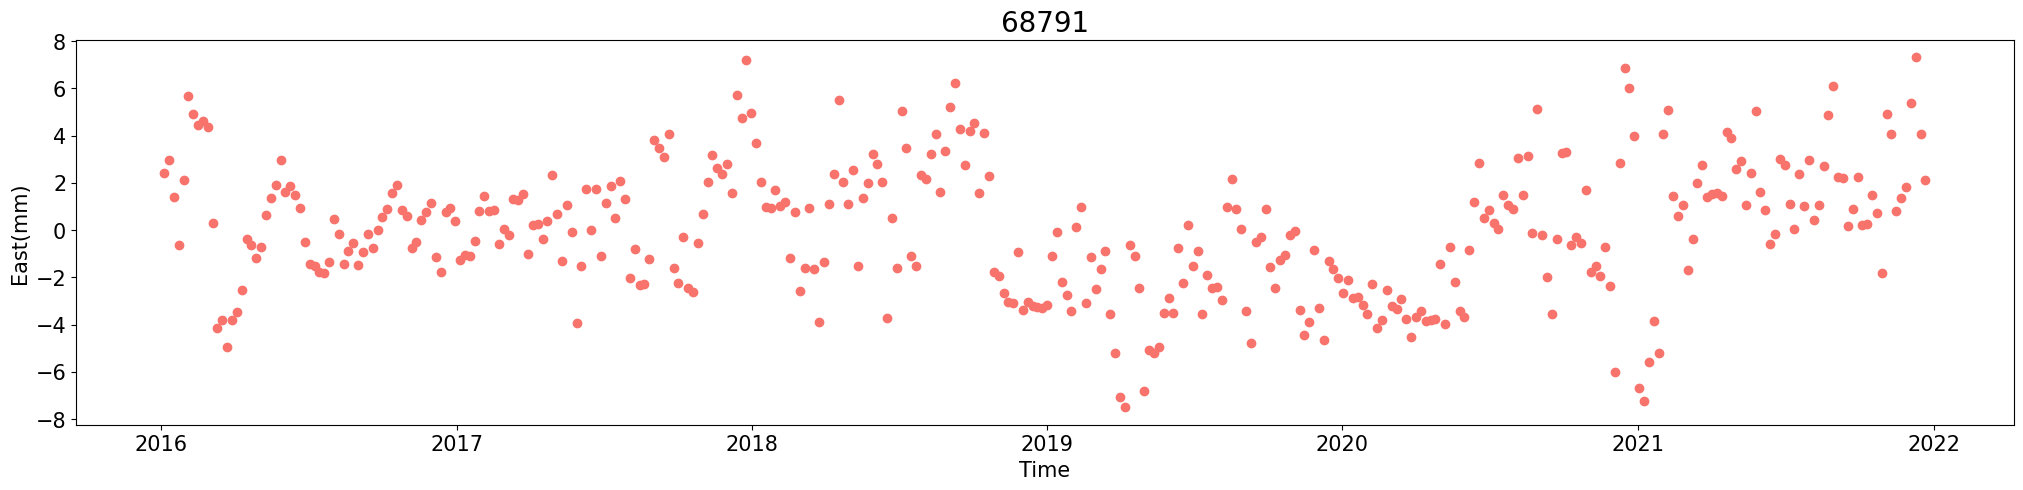

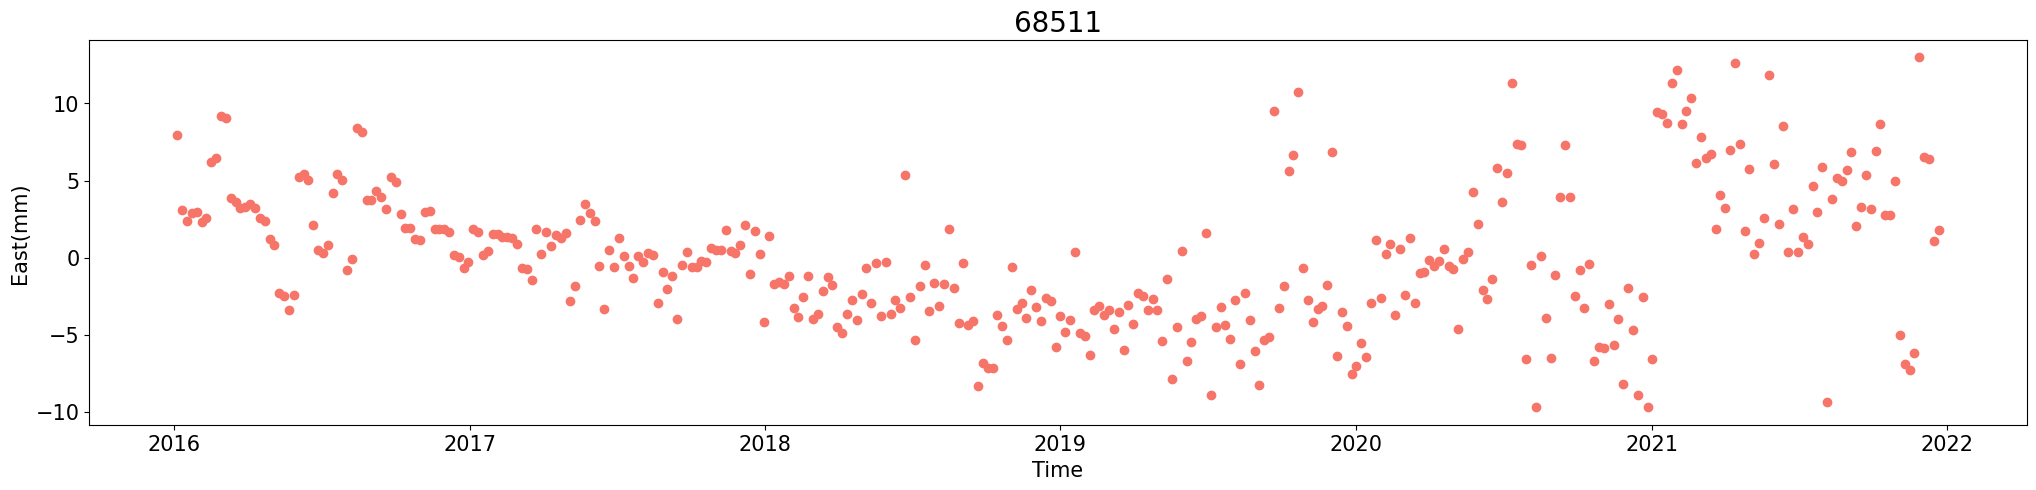

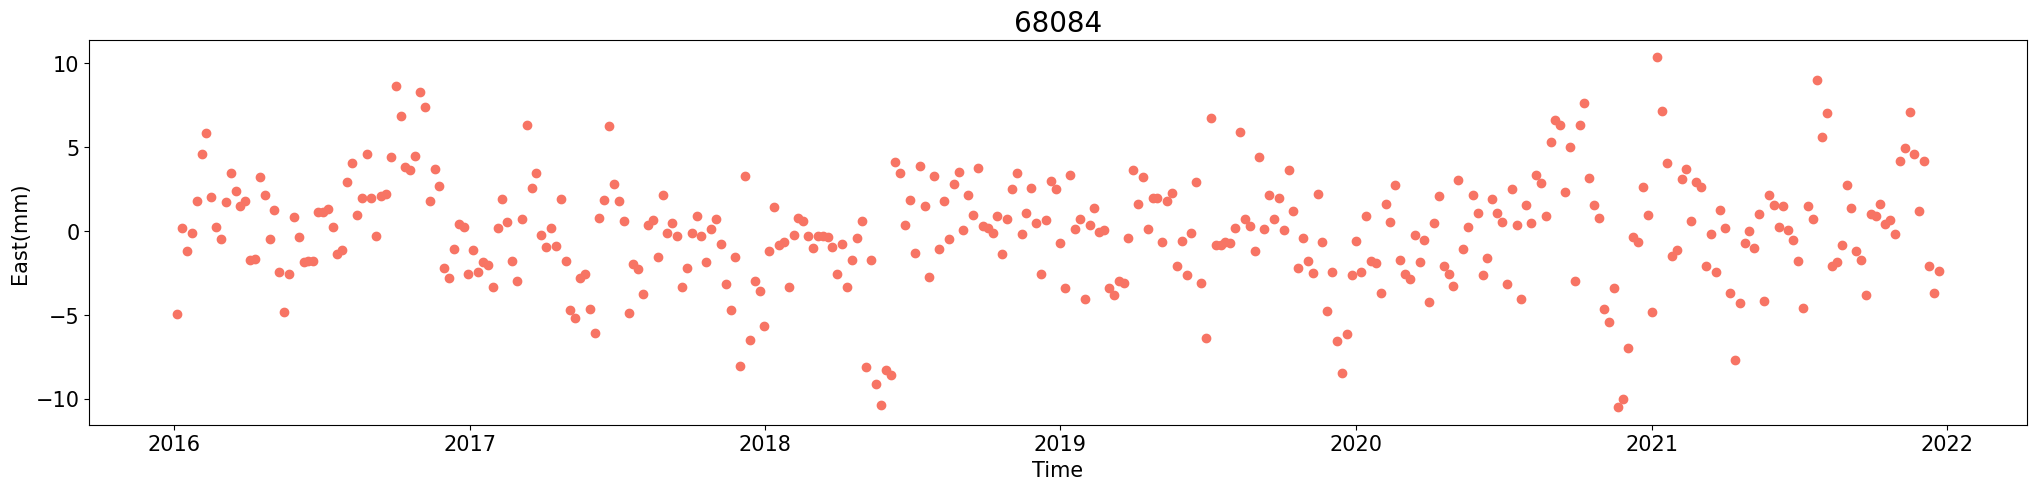

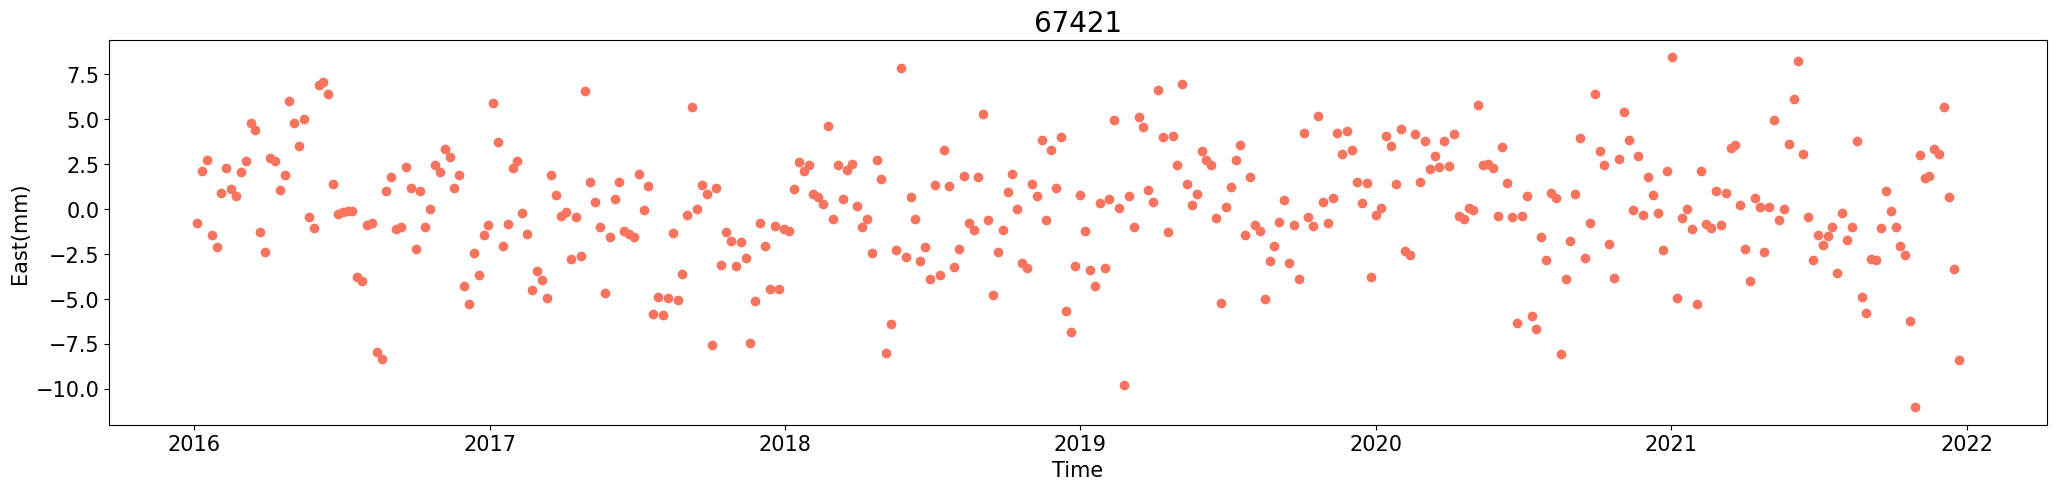

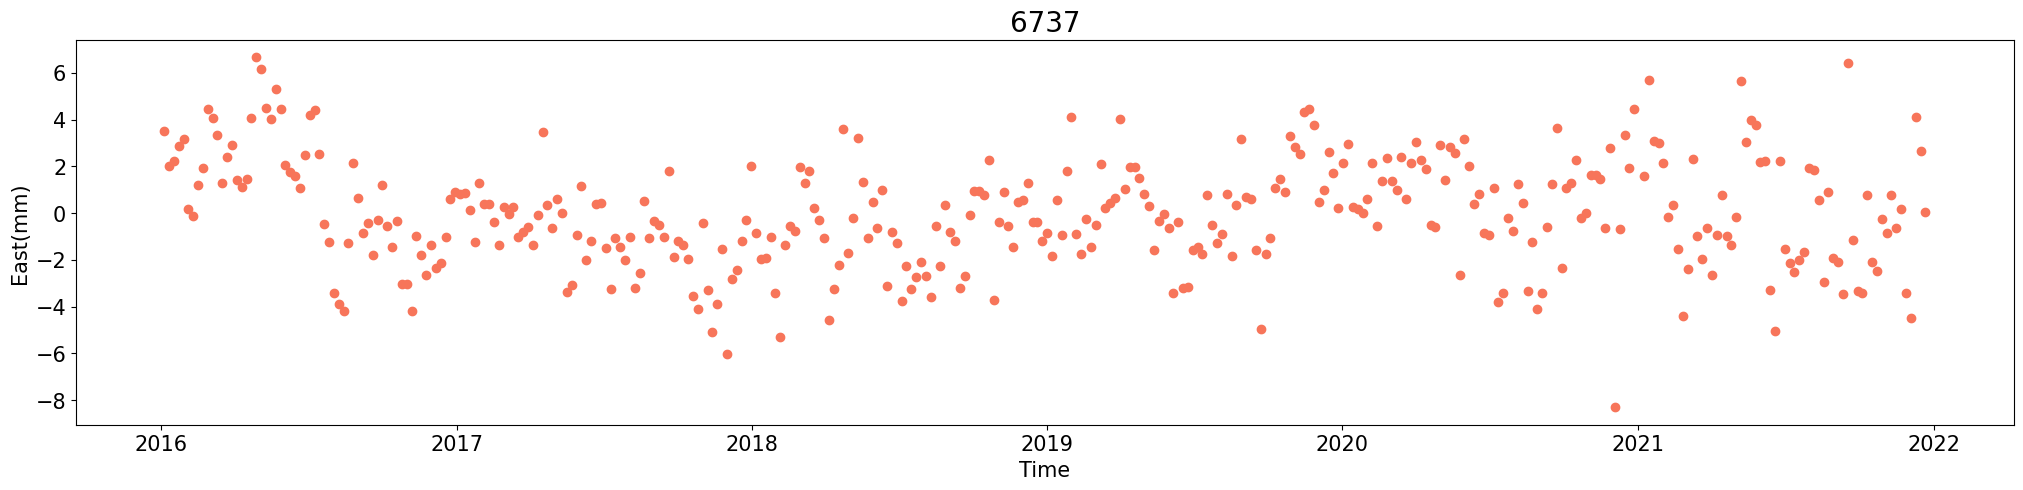

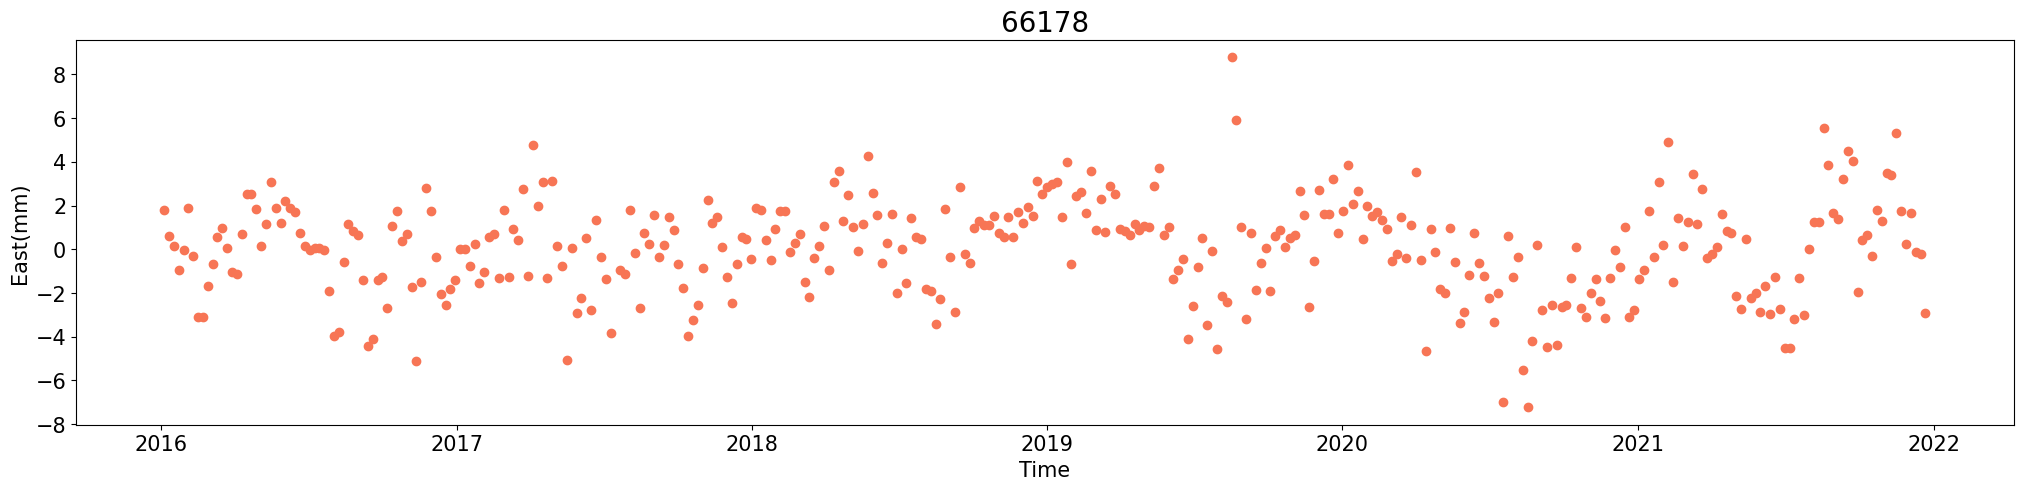

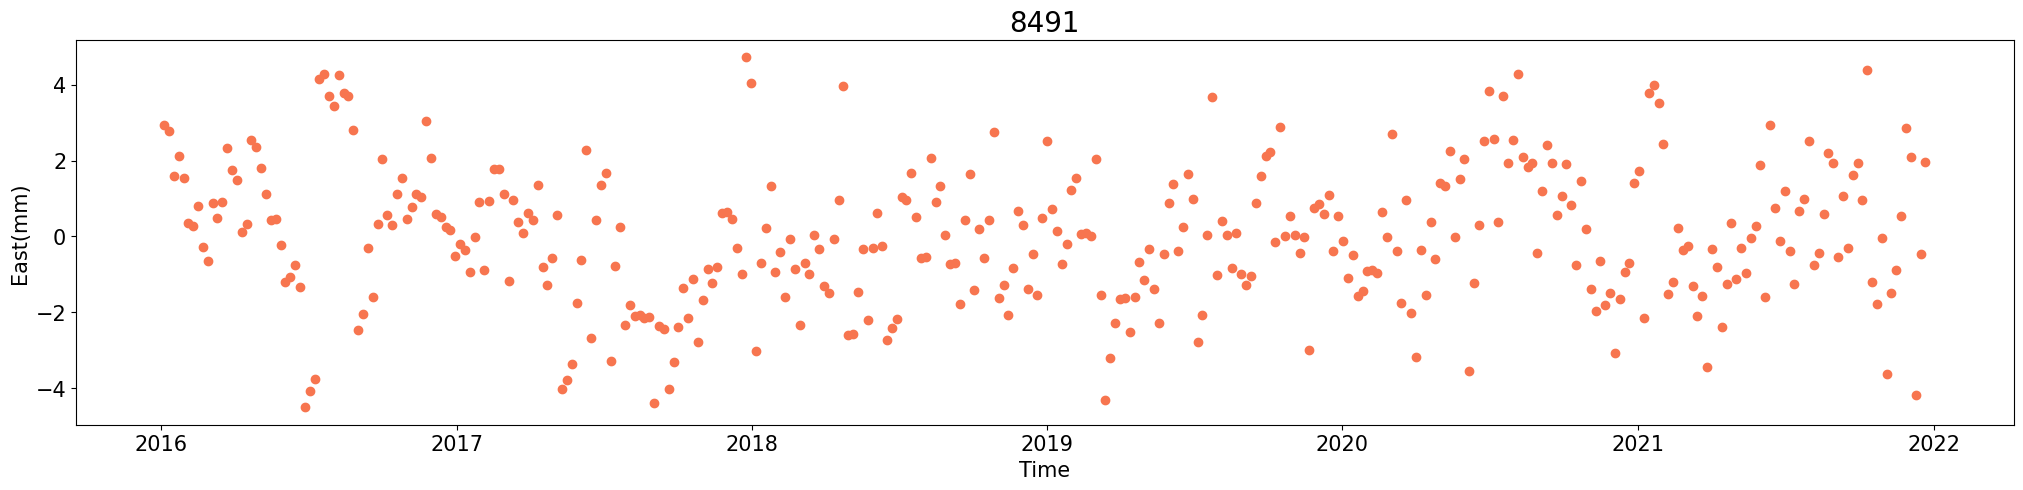

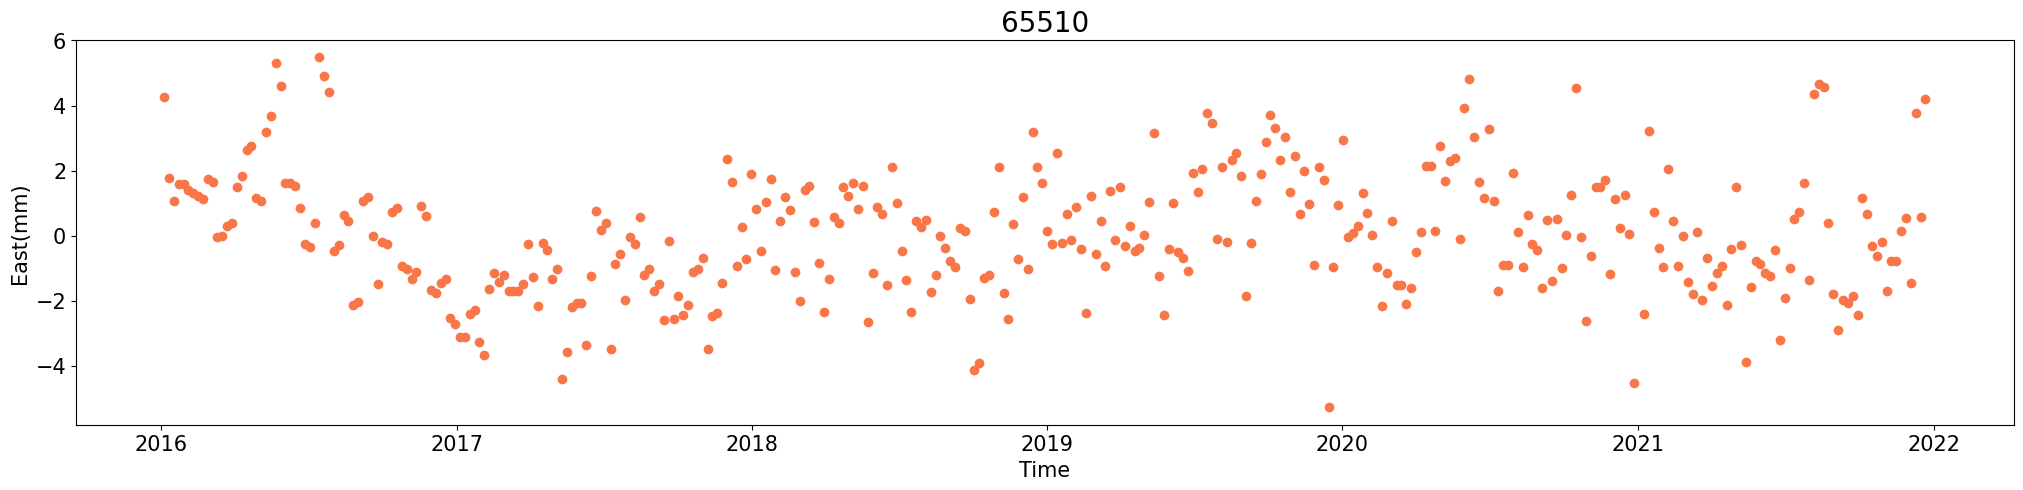

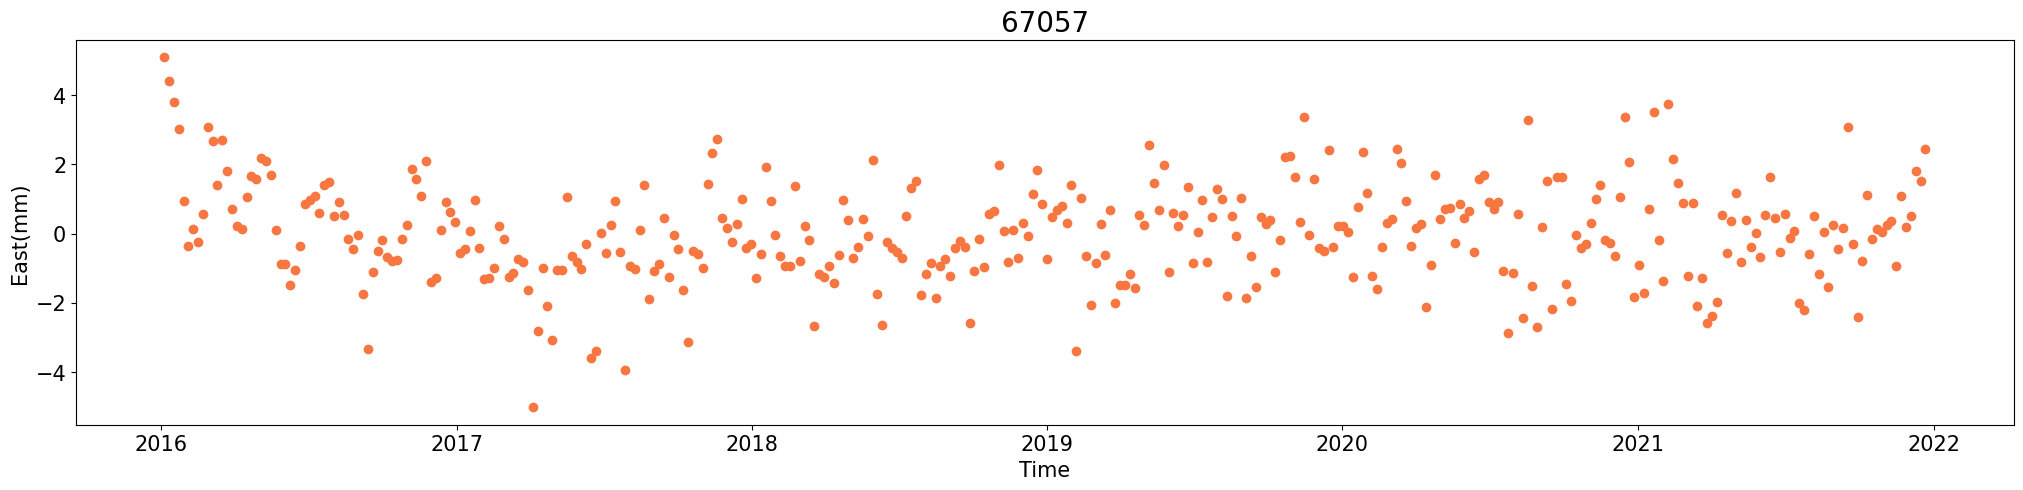

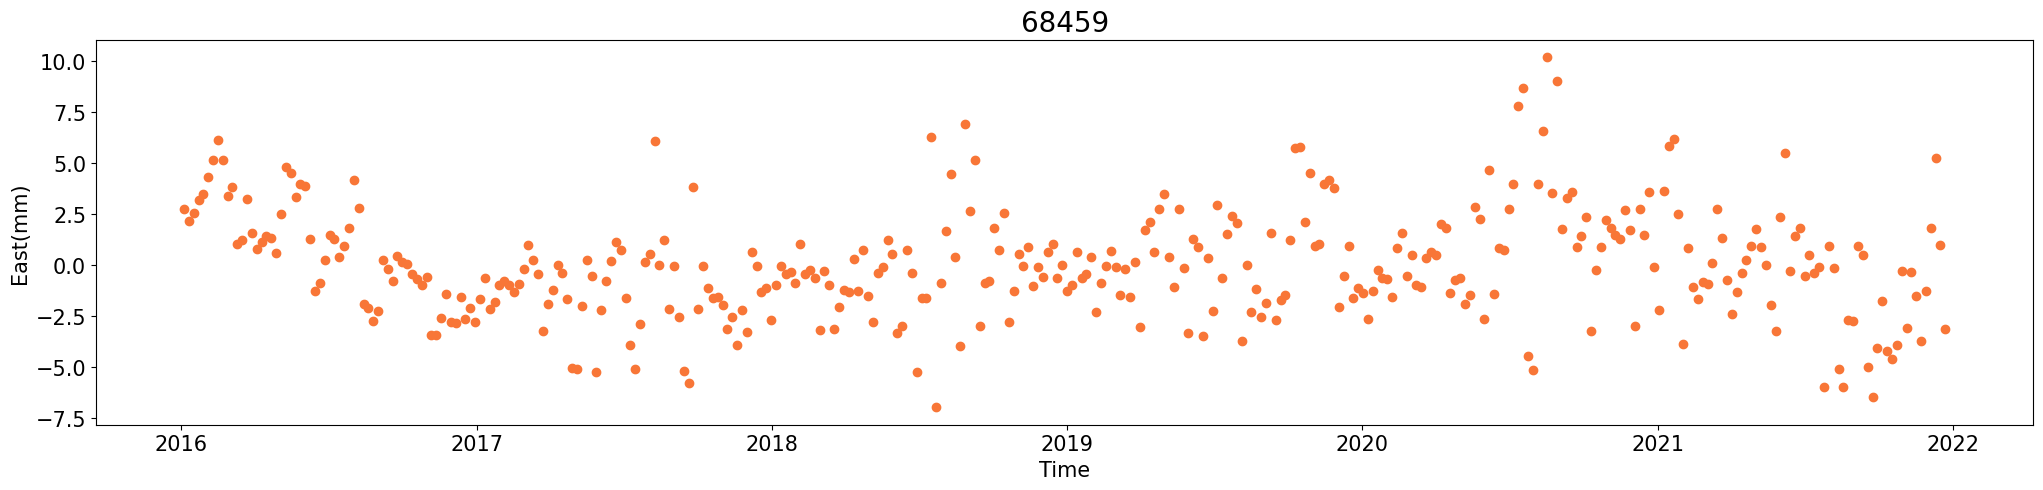

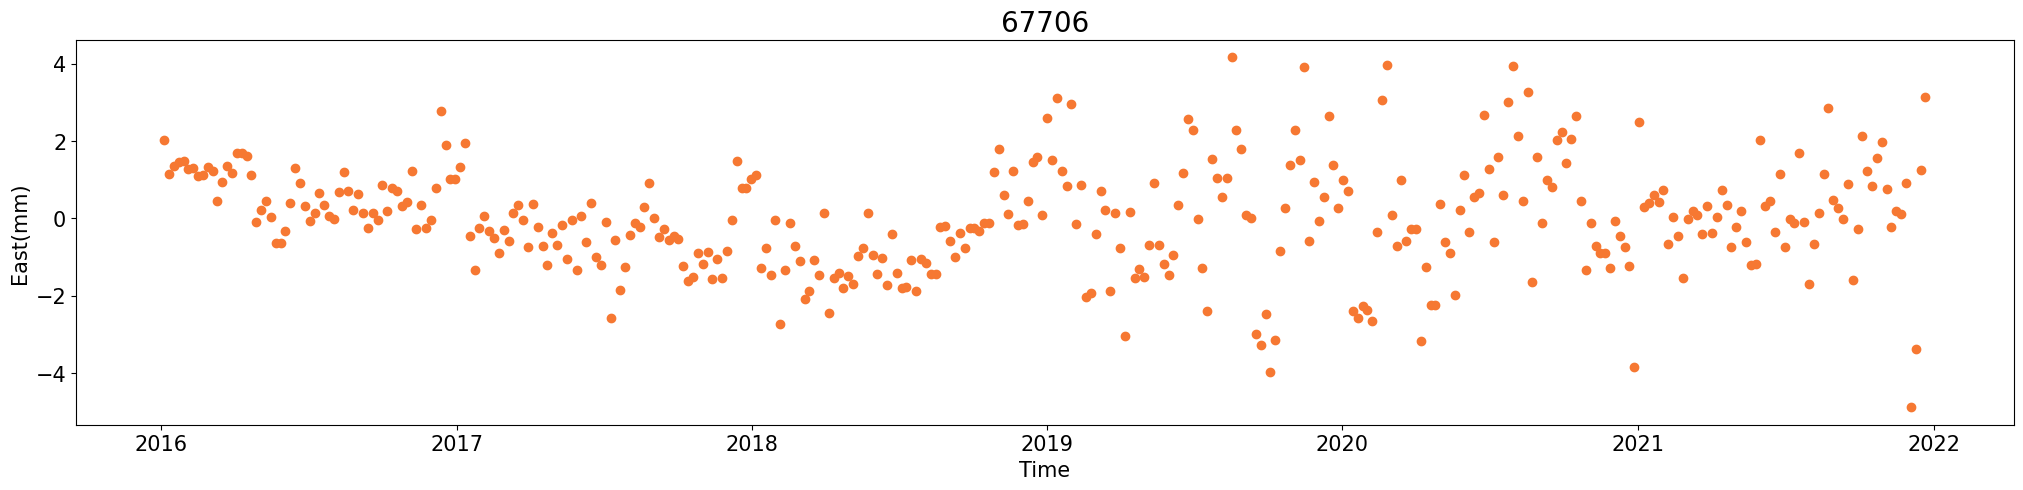

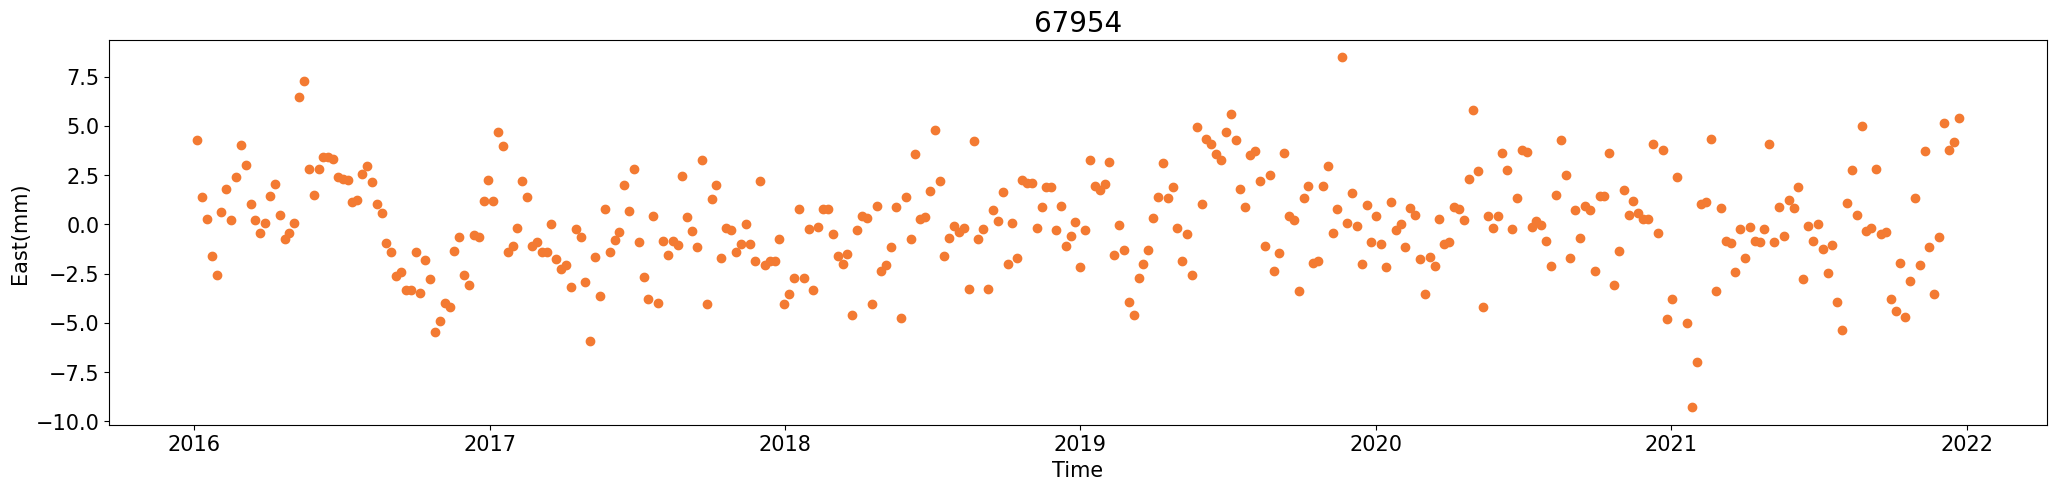

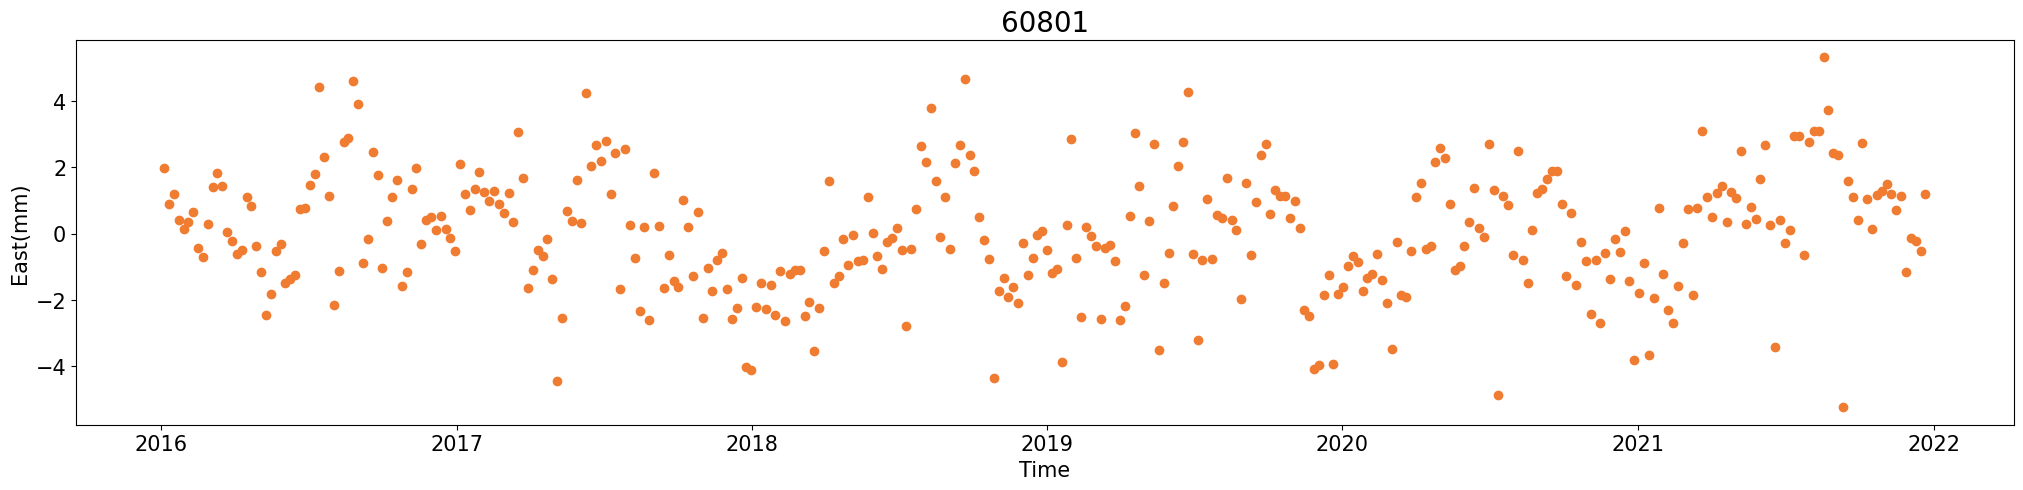

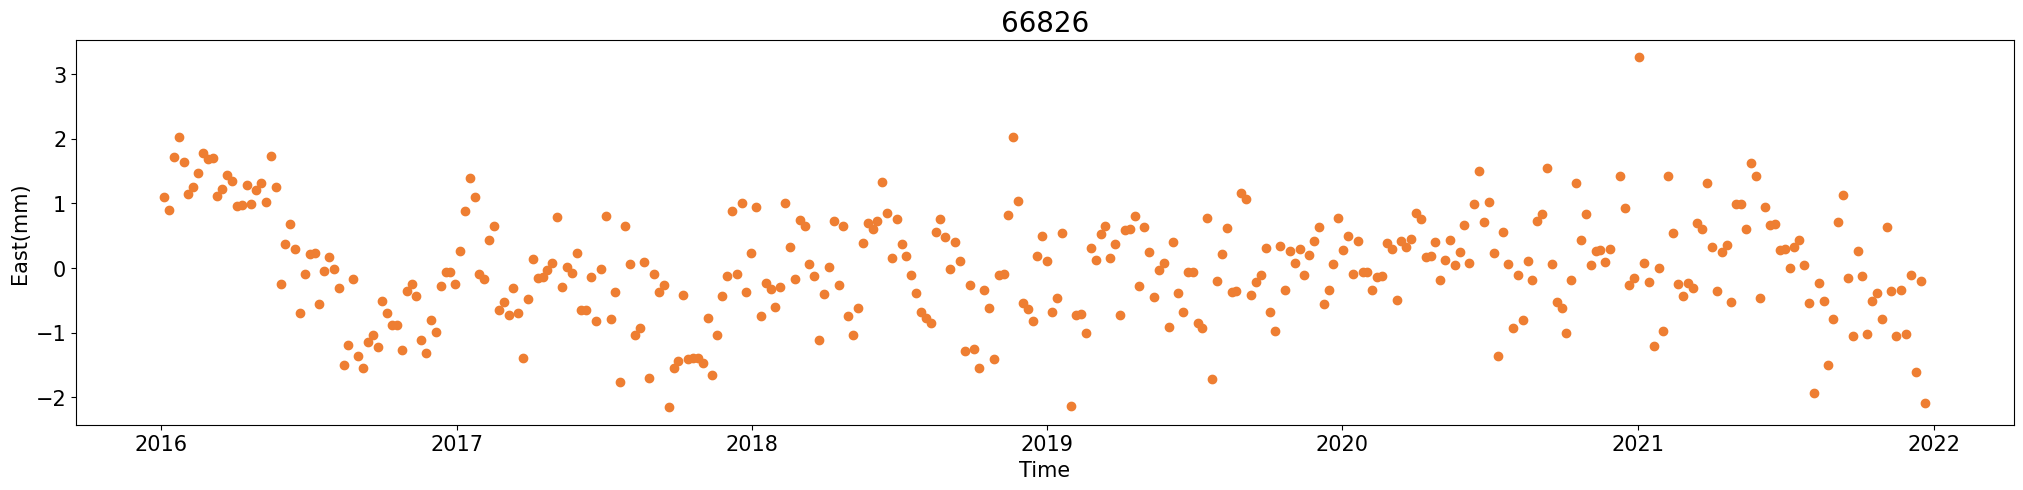

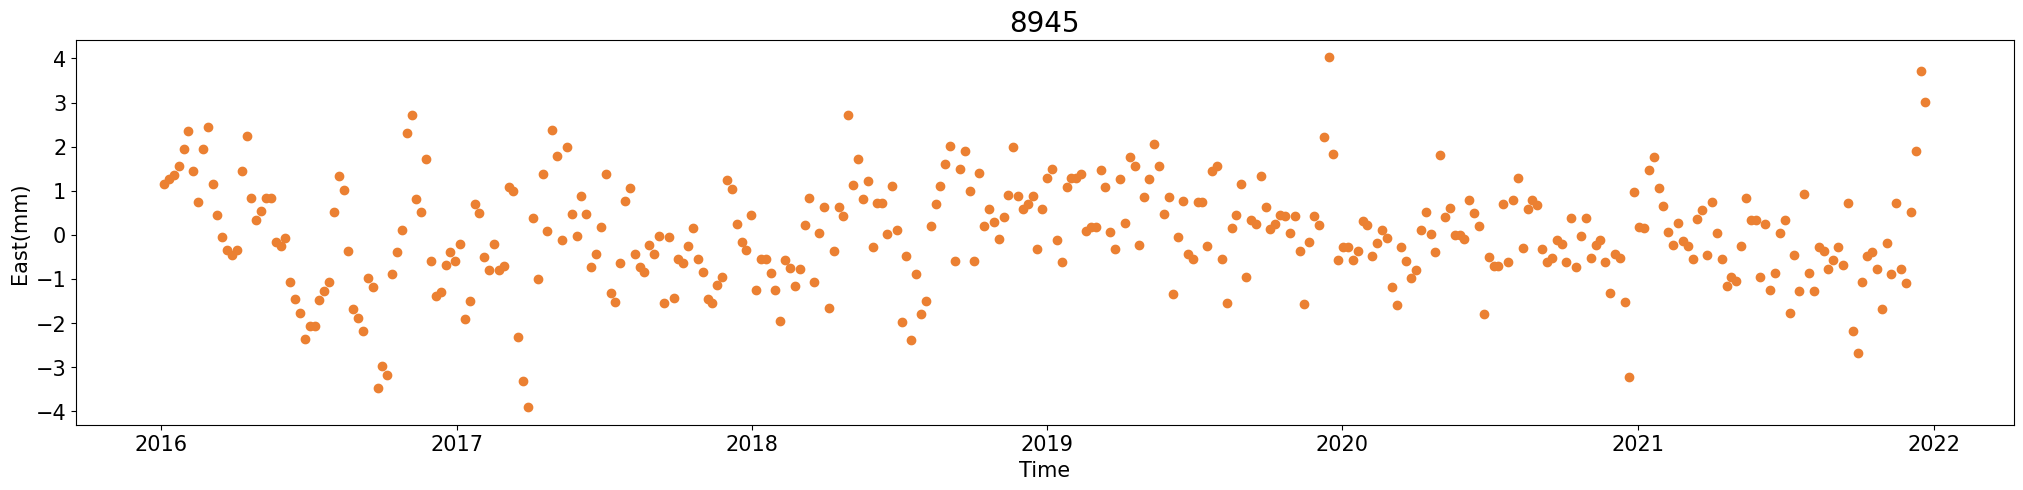

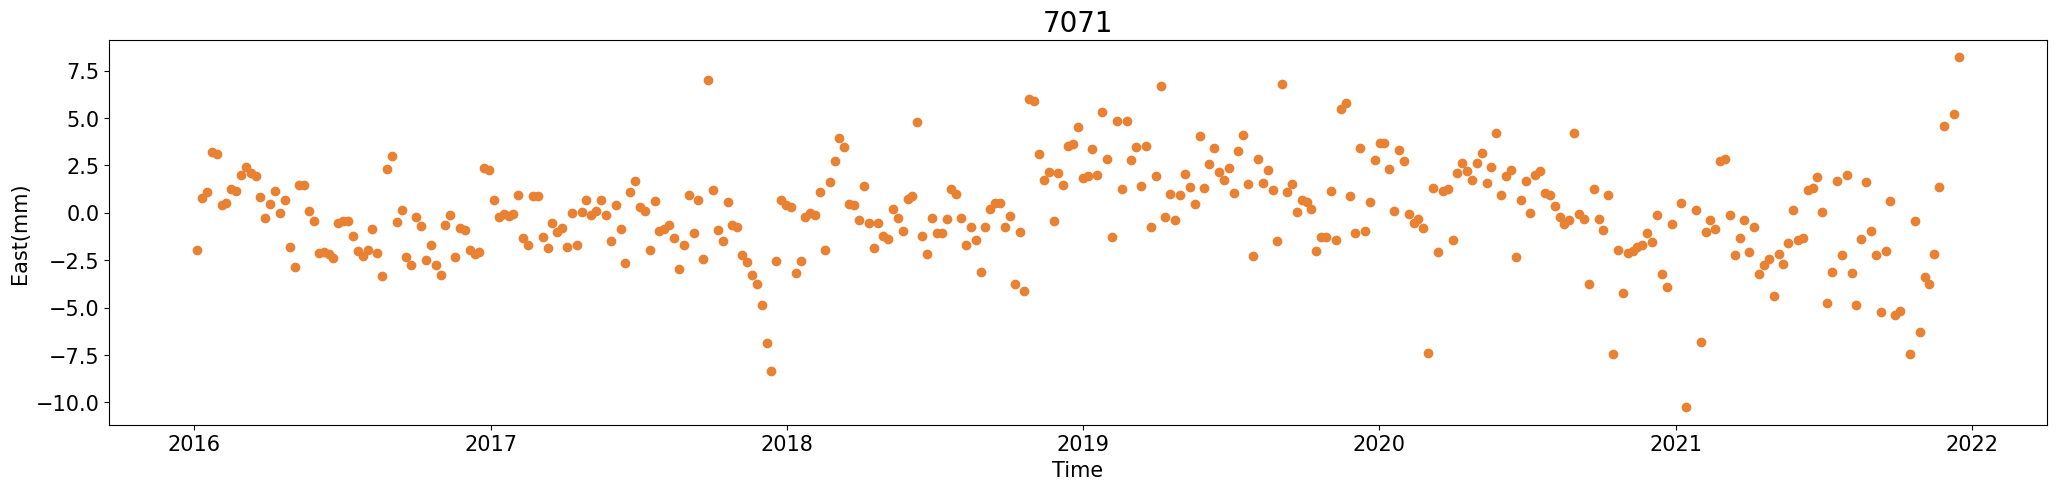

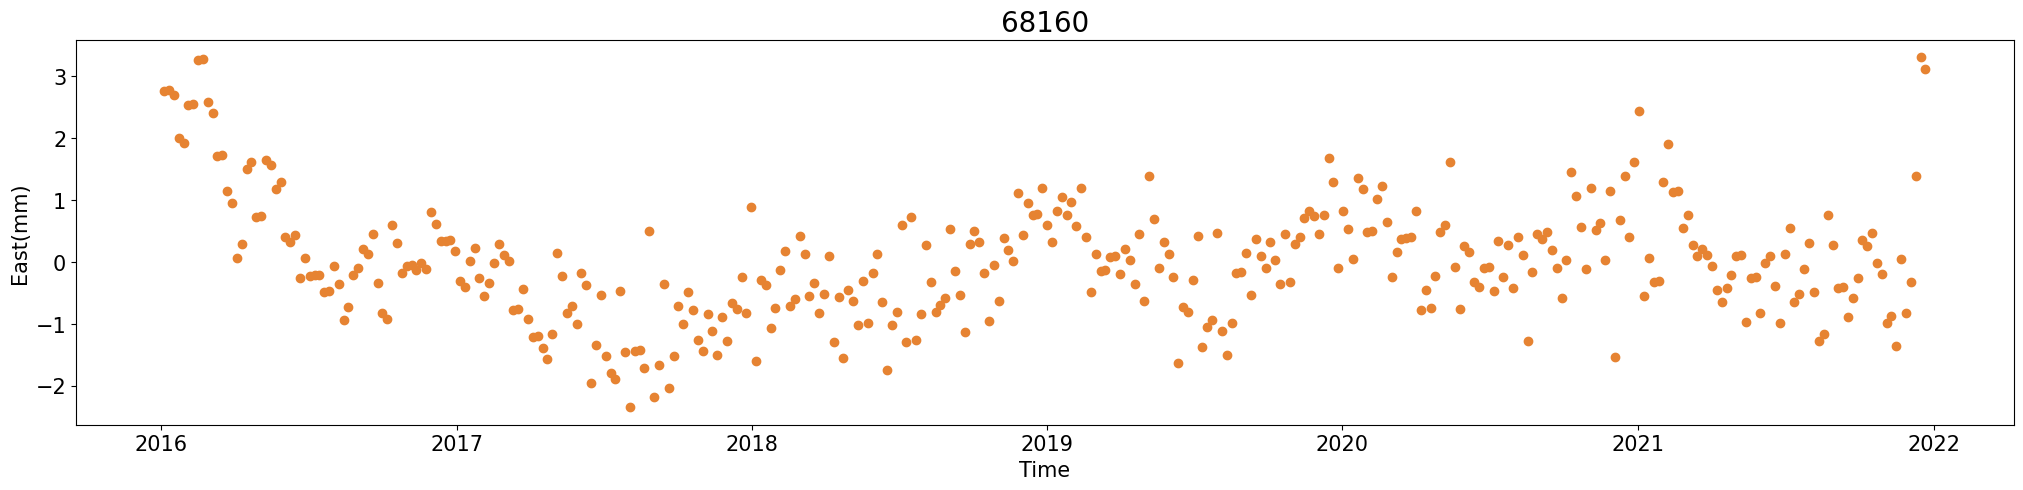

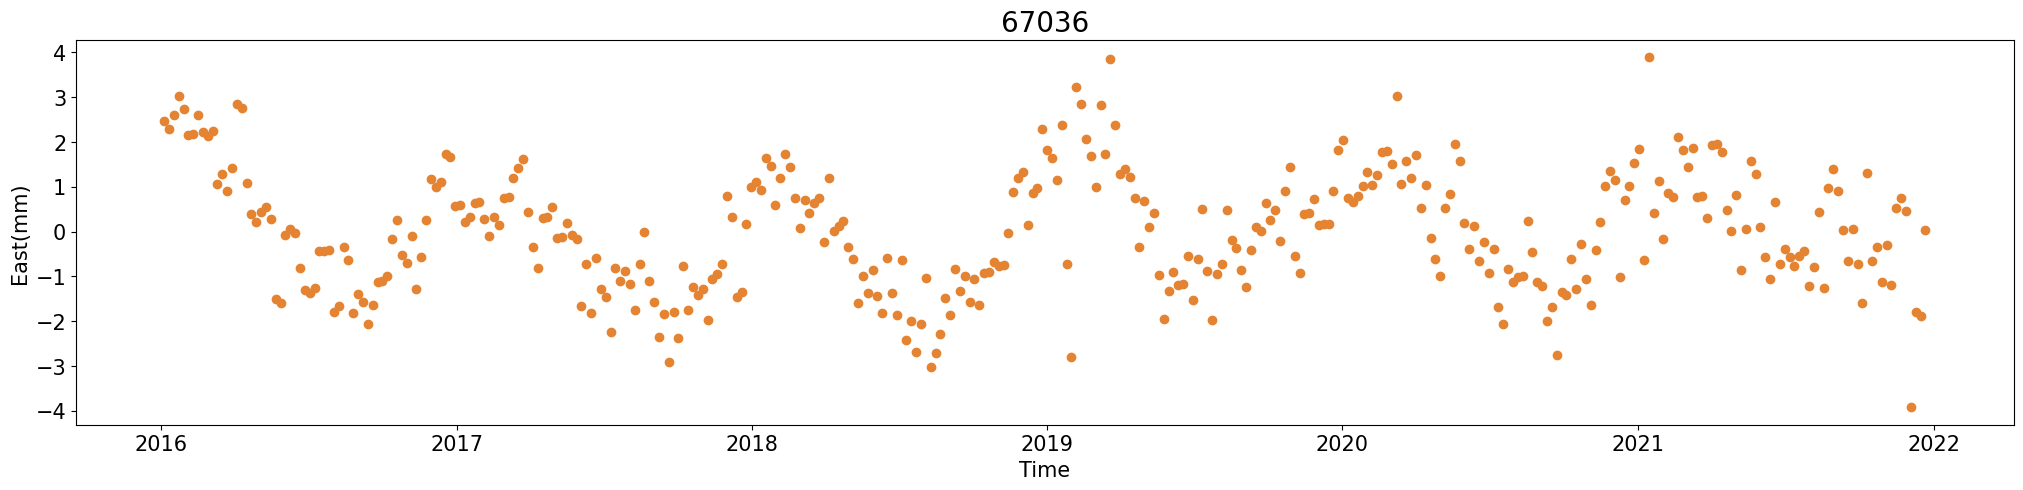

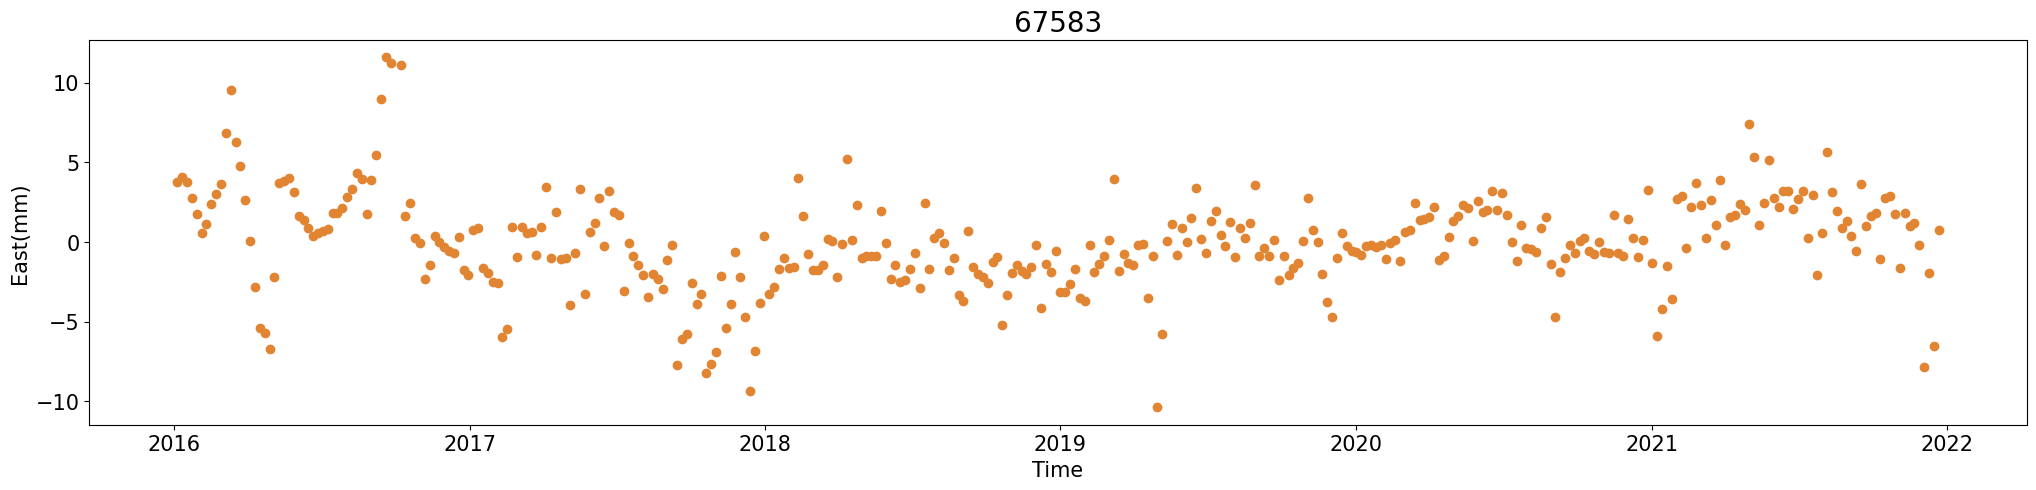

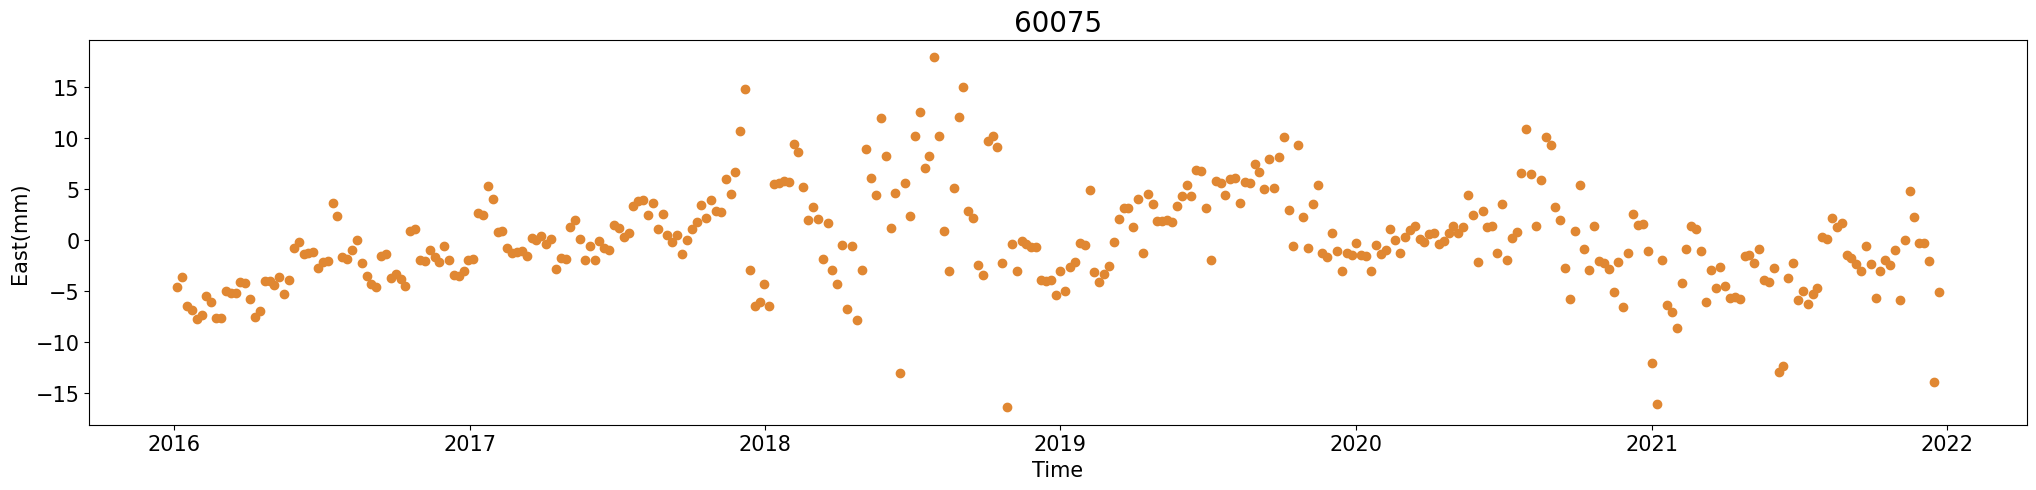

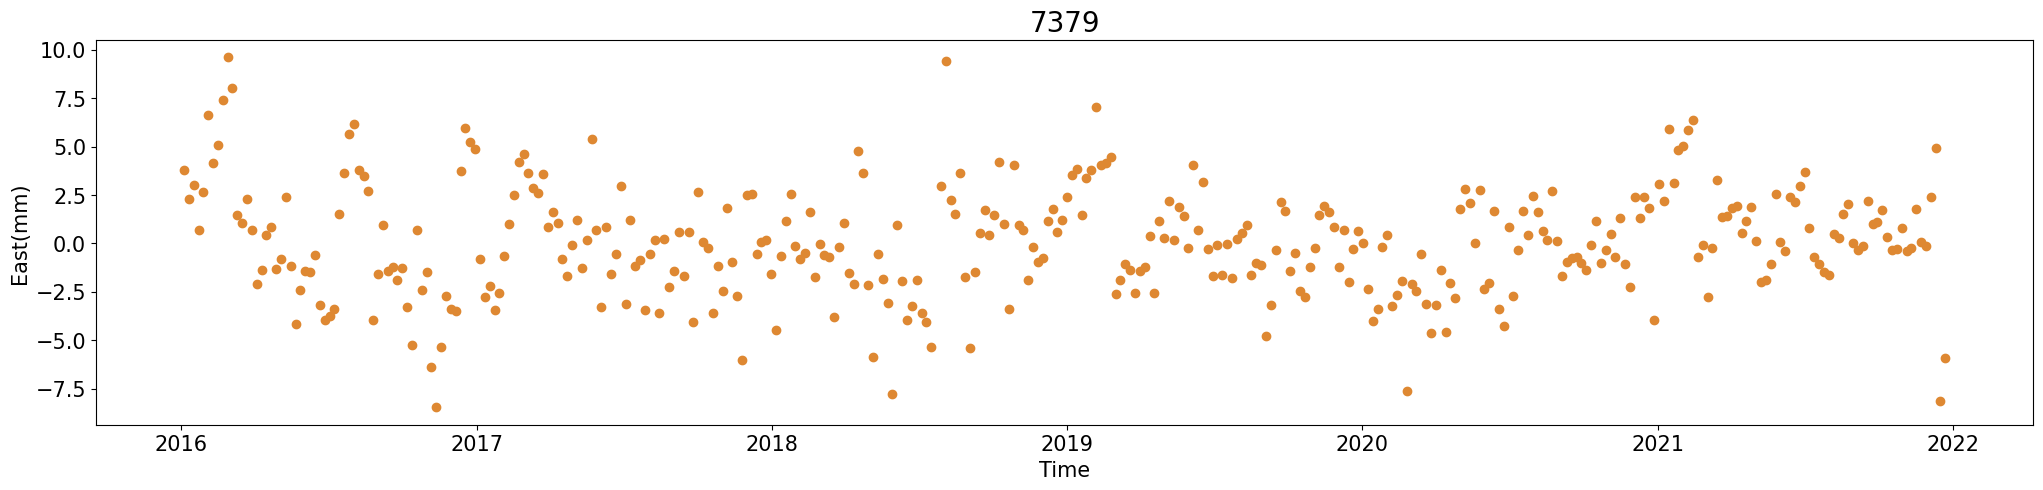

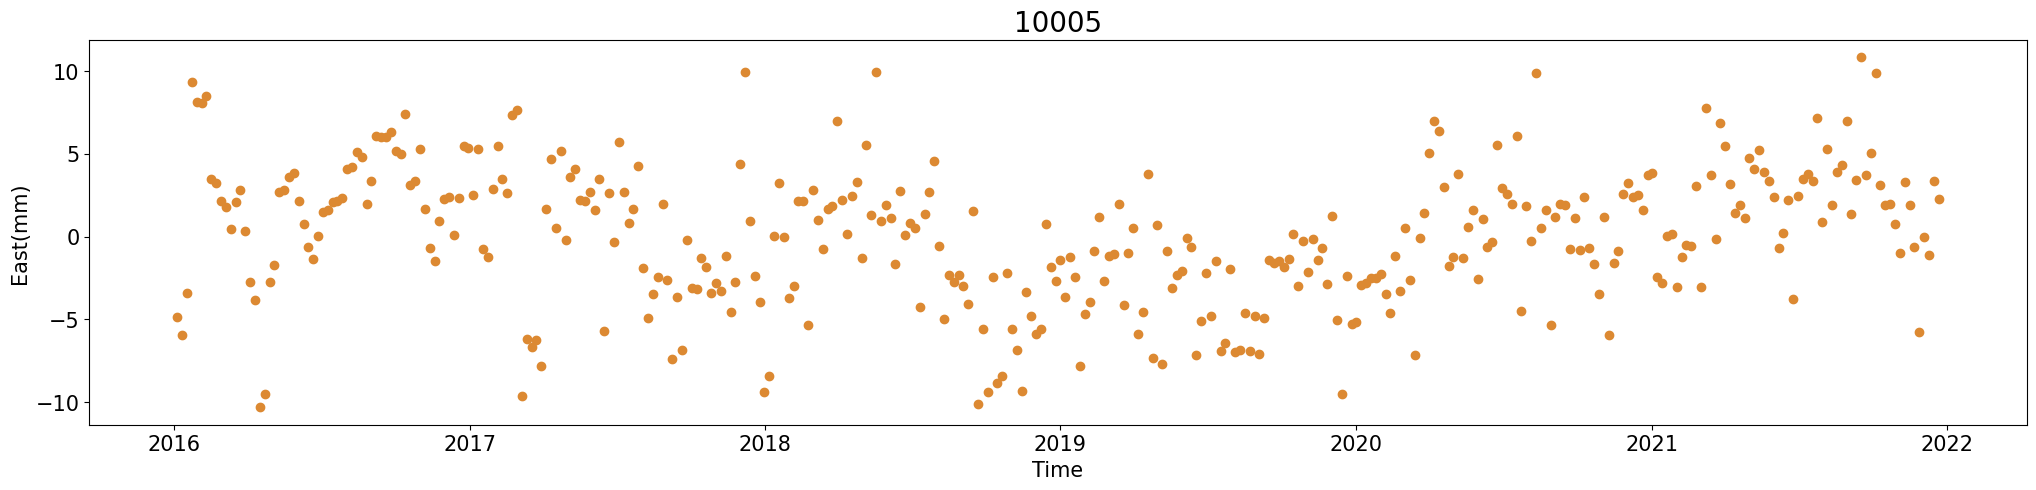

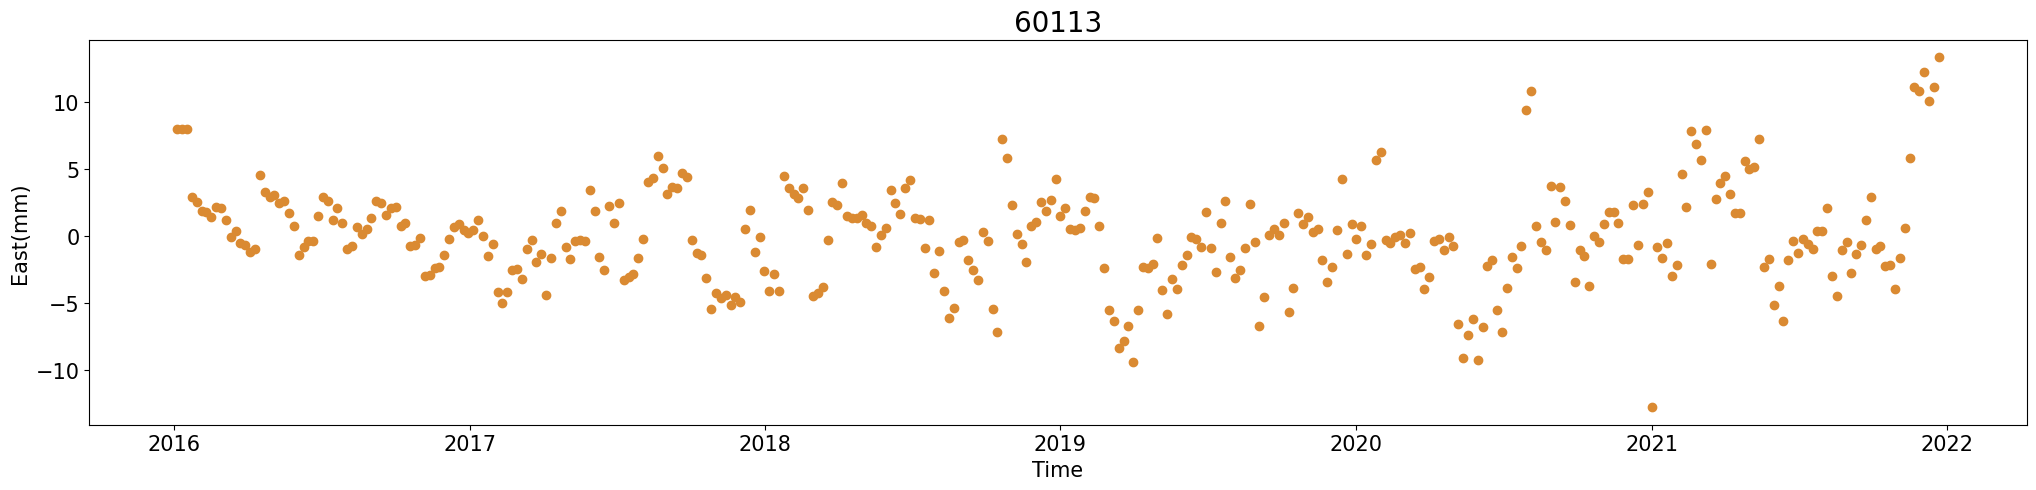

In [558]:
#checking the areas's plots - detrended

colors = sns.color_palette("husl", len(area_outliers_removed_dict))
#folder = ''

for i, (indice_number, indice_data) in enumerate(station_file_dict.items()):
    plt.figure(figsize=(25, 5))
    
    plt.plot(indice_data.index, indice_data, 'o', color = colors[i])
    plt.title(f'{indice_number}', fontsize = 20)
    plt.xlabel('Time', fontsize = 15)
    plt.xticks(fontsize=15)
    plt.ylabel('East(mm)', fontsize = 15)
    plt.yticks(fontsize=15)
    #plt.ylim(-0.008,0.008)
   
    #fl = os.path.join(folder, f'{indice_number}.svg')
    #f = io.BytesIO()
    #plt.savefig(fl, format="svg")

    plt.show()

In [559]:
def get_rolling_mean(indice_number, indice_data):
    
    area_rolling_mean = indice_data.rolling(2, min_periods=1).mean()
    
    areas_rolling_mean_dataframe = pd.DataFrame(area_rolling_mean, 
                                              index=indice_data.index)
    
    areas_rolling_mean_dataframe = areas_rolling_mean_dataframe.rename(
        columns={f'{indice_number}_east(mm)':f'{indice_number}_east(mm)_rm'})
    
    areas_rolling_mean_dataframe.dropna(inplace=True)
    
    return areas_rolling_mean_dataframe

#dictionaries to store the data
areas_rolling_mean_dict = {}

#calling the function
for indice_number, indice_data in station_file_dict.items():
    areas_rolling_mean_dataframe = get_rolling_mean(indice_number, indice_data)
    areas_rolling_mean_dict[indice_number] = areas_rolling_mean_dataframe

#printing dataframe
#stations detrended
for indice_number, indice_data in areas_rolling_mean_dict.items():
    print(f'{indice_number}: \n{indice_data}\n')

61315: 
               61315
2016-01-05  3.170688
2016-01-11  3.275011
2016-01-17  3.183656
2016-01-23  2.742302
2016-01-29  2.100947
...              ...
2021-11-22  0.461432
2021-11-28  0.820078
2021-12-04  1.578723
2021-12-16  3.141692
2021-12-22  4.704660

[363 rows x 1 columns]

9815: 
                9815
2016-01-05  5.968054
2016-01-11  6.131036
2016-01-17  5.756999
2016-01-23  4.632963
2016-01-29  4.058927
...              ...
2021-11-28 -2.873902
2021-12-04  0.952062
2021-12-10  2.578026
2021-12-16  7.153990
2021-12-22  7.429953

[364 rows x 1 columns]

7862: 
                7862
2016-01-05  4.792291
2016-01-11  4.349828
2016-01-17  3.614900
2016-01-23  3.829973
2016-01-29  3.745046
...              ...
2021-11-16  2.015779
2021-11-22  1.880852
2021-11-28  2.795925
2021-12-04  3.910998
2021-12-10 -1.123929

[361 rows x 1 columns]

59366: 
               59366
2016-01-05 -0.475168
2016-01-11  0.127201
2016-01-17  0.781940
2016-01-23  1.336679
2016-01-29  1.941417
...          

In [62]:
#outliers_removed_df, df_rolling_mean = outliers_removed_df.align(df_rolling_mean, join='inner')

#point_mse = mean_squared_error(outliers_removed_df, df_rolling_mean)
#print(point_mse)

#point_r2 = r2_score(outliers_removed_df,df_rolling_mean)
#print(point_r2)

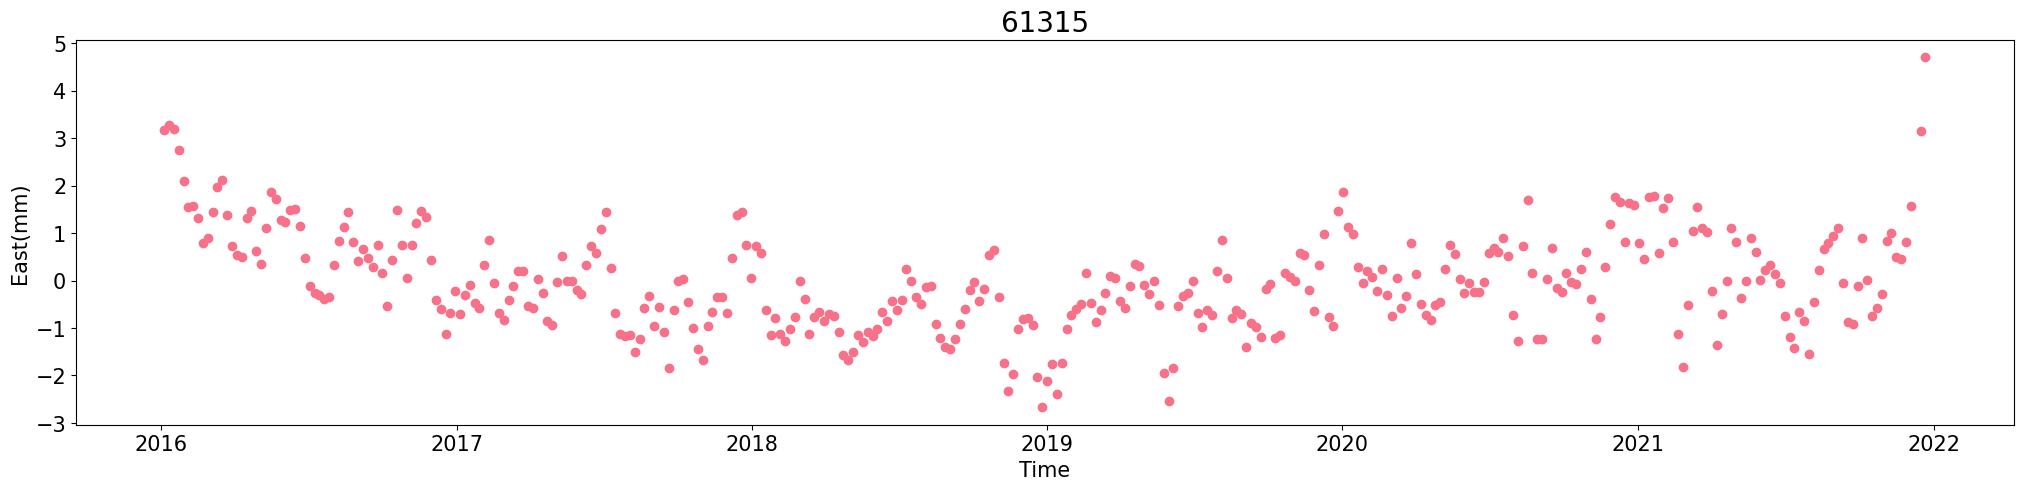

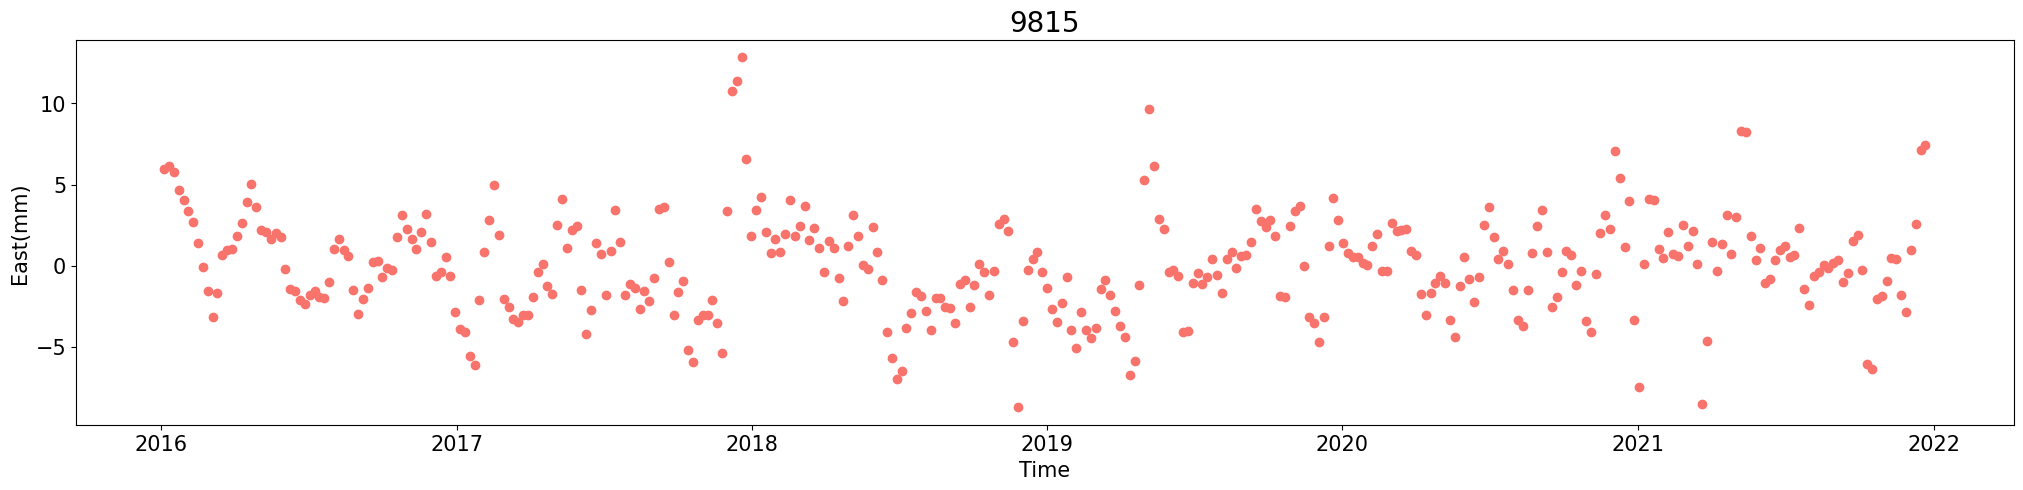

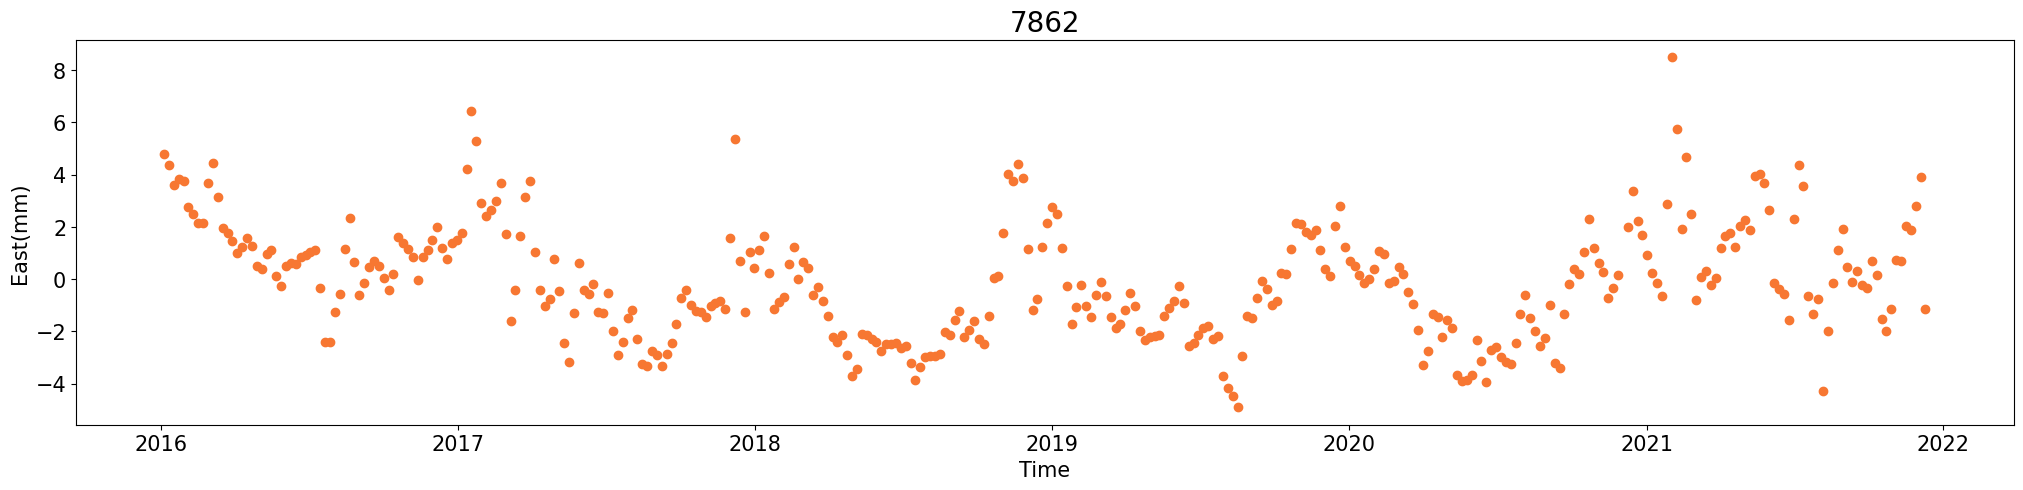

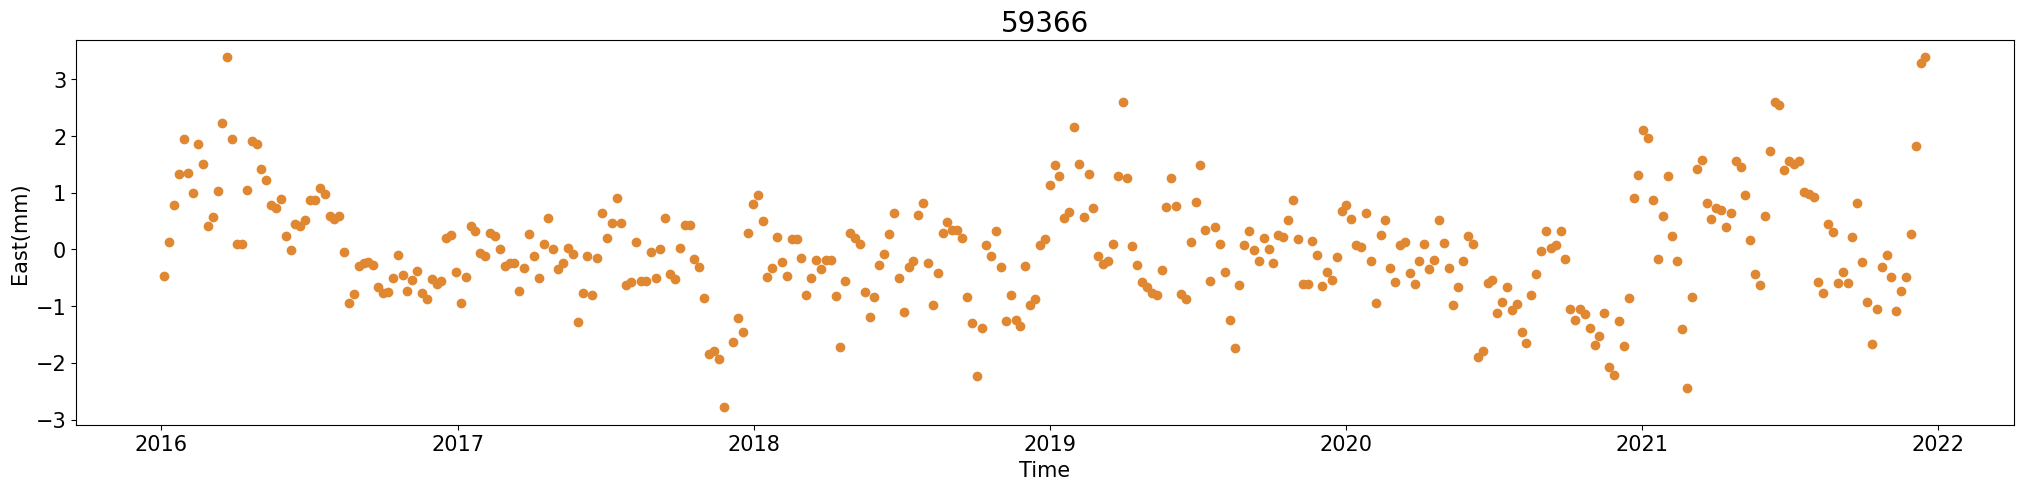

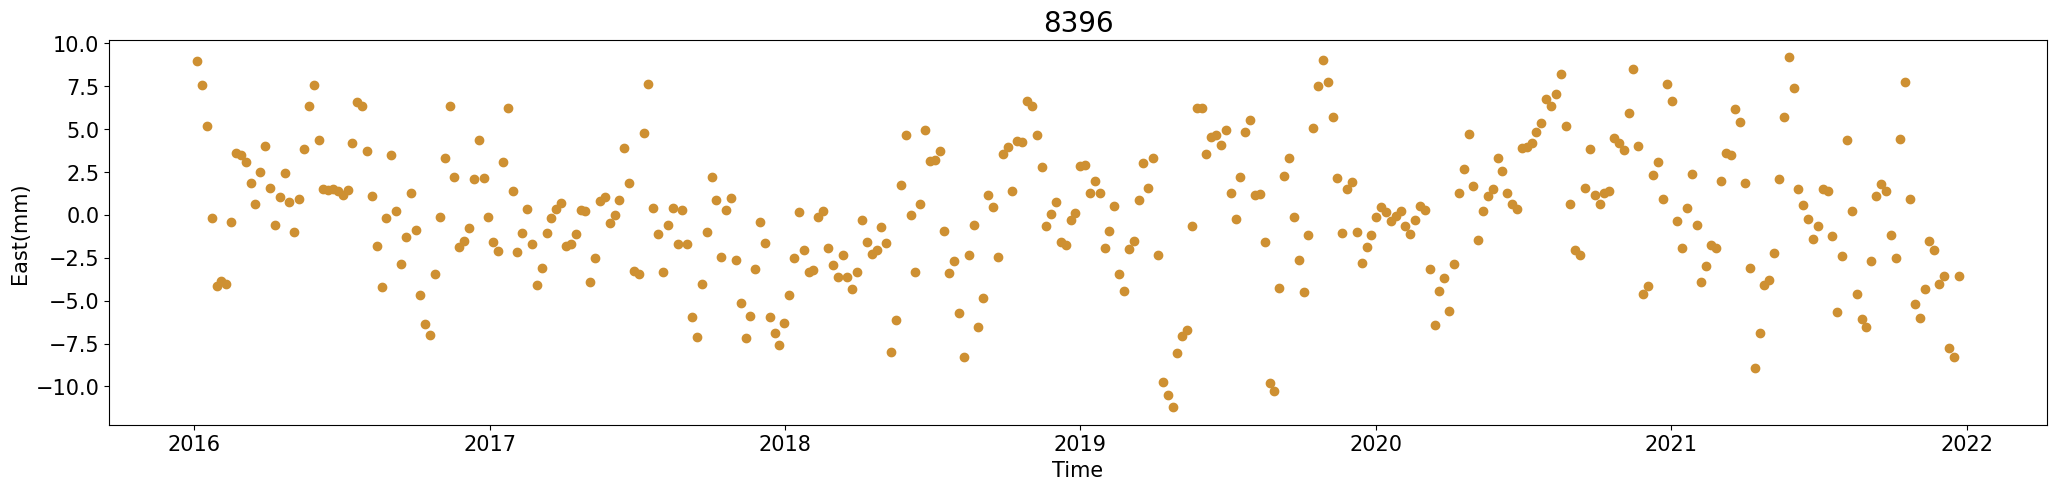

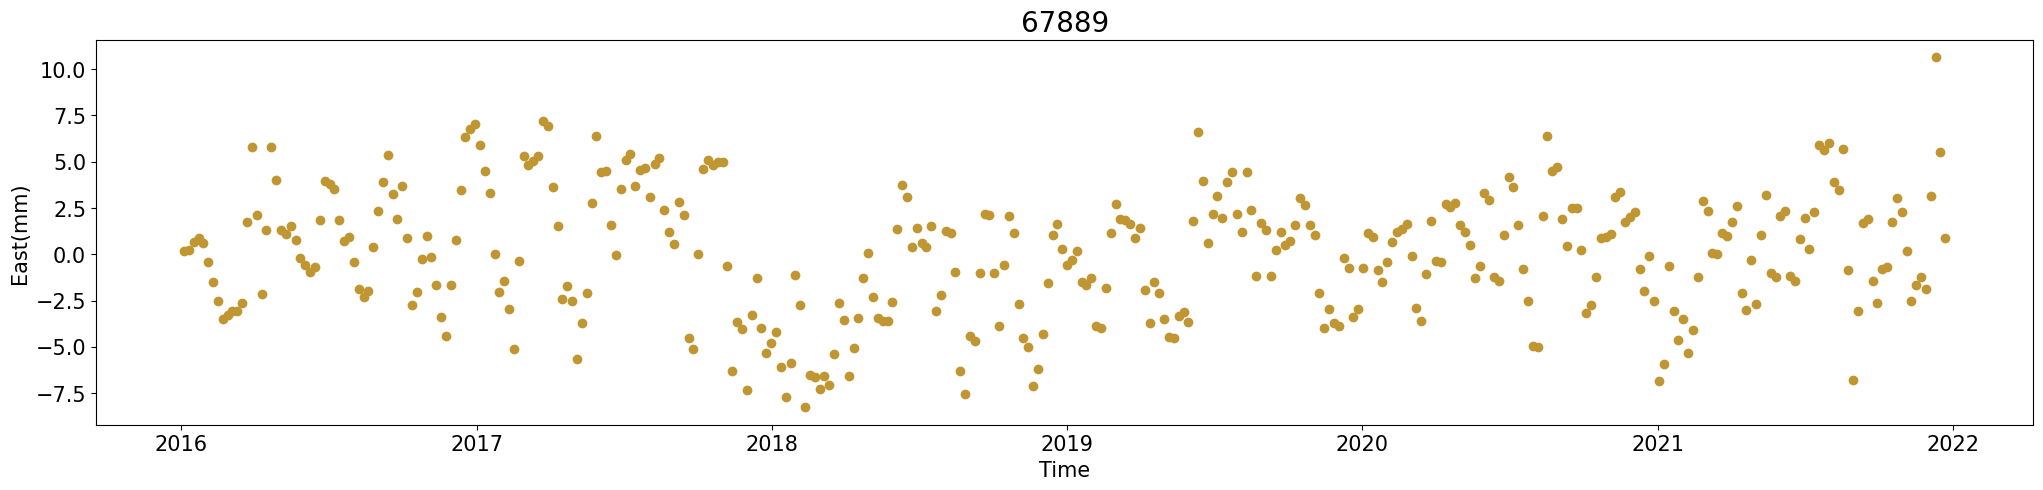

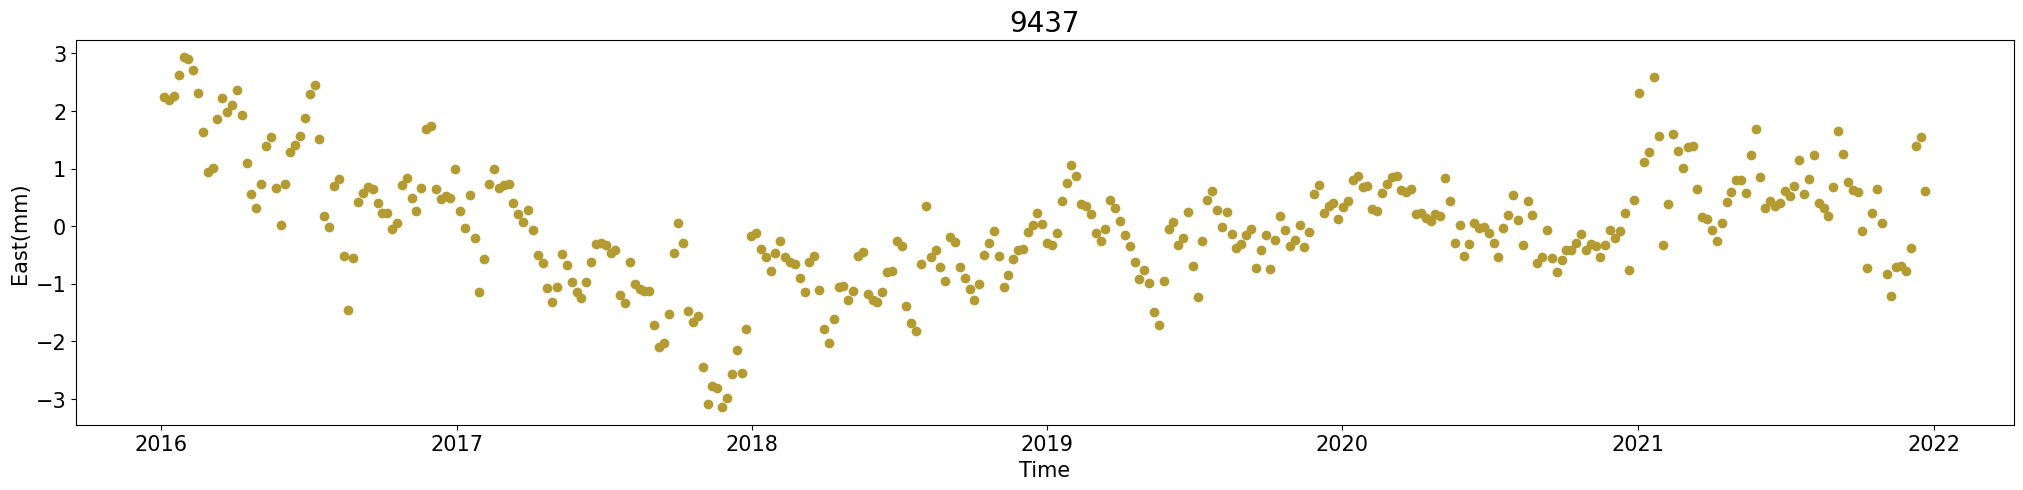

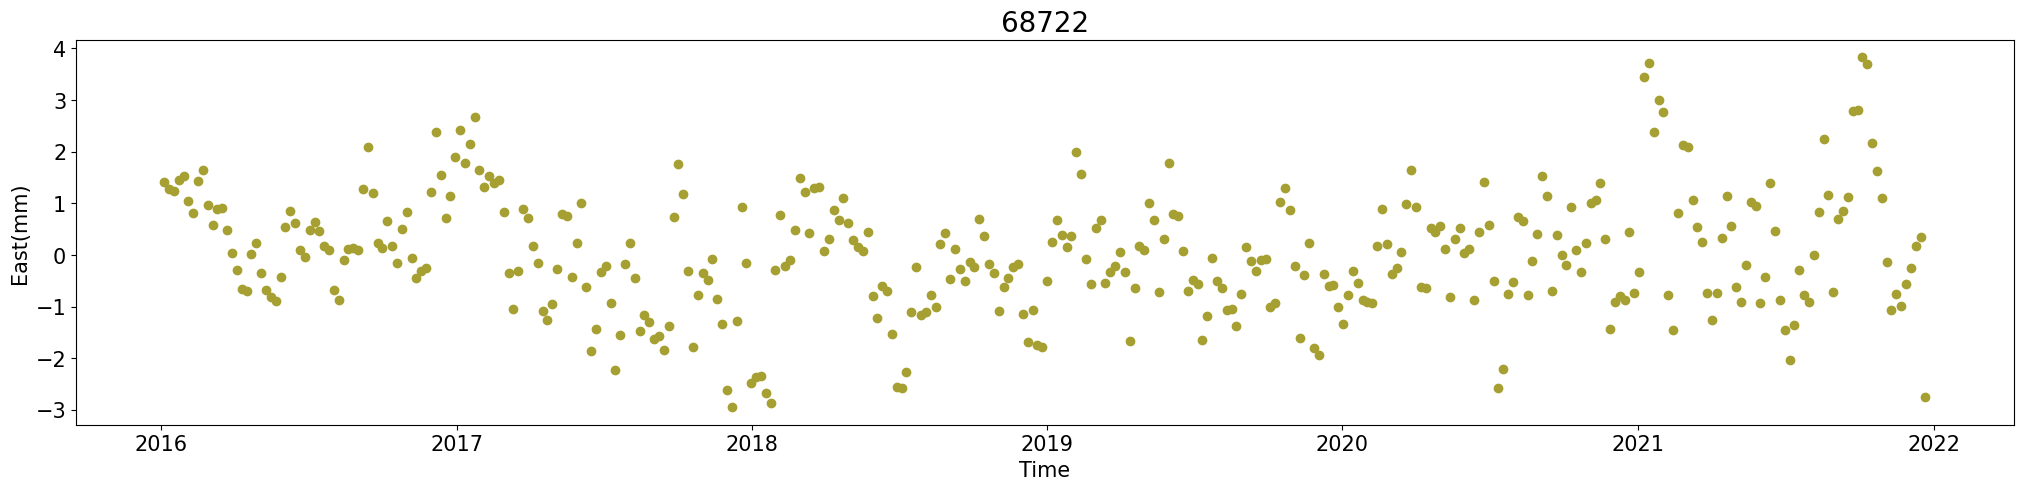

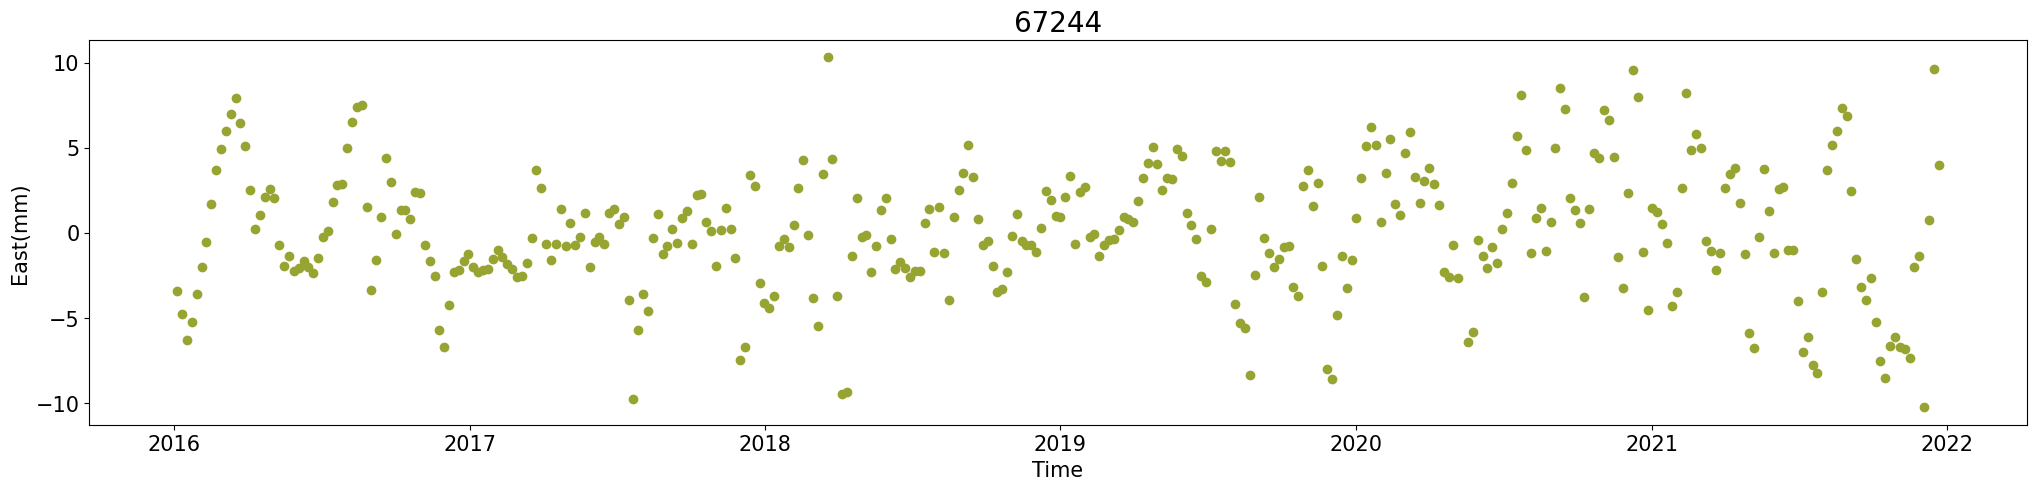

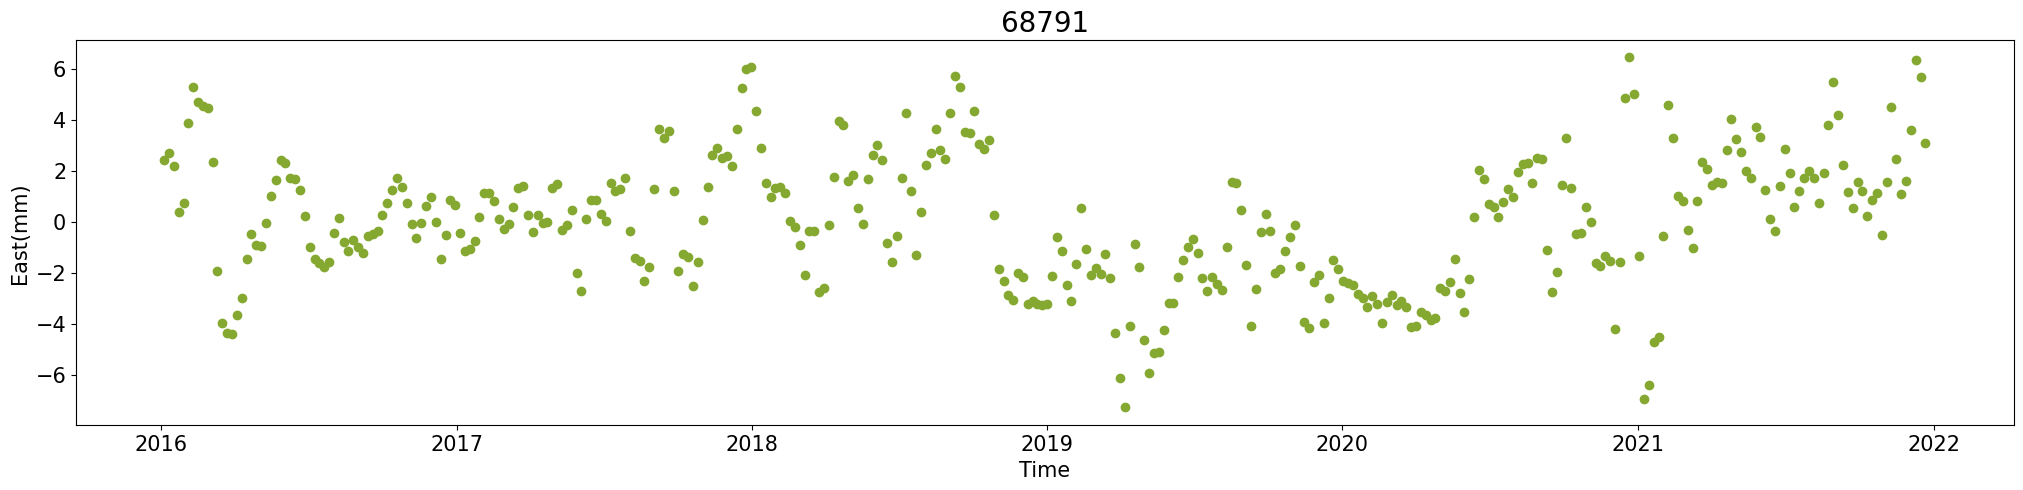

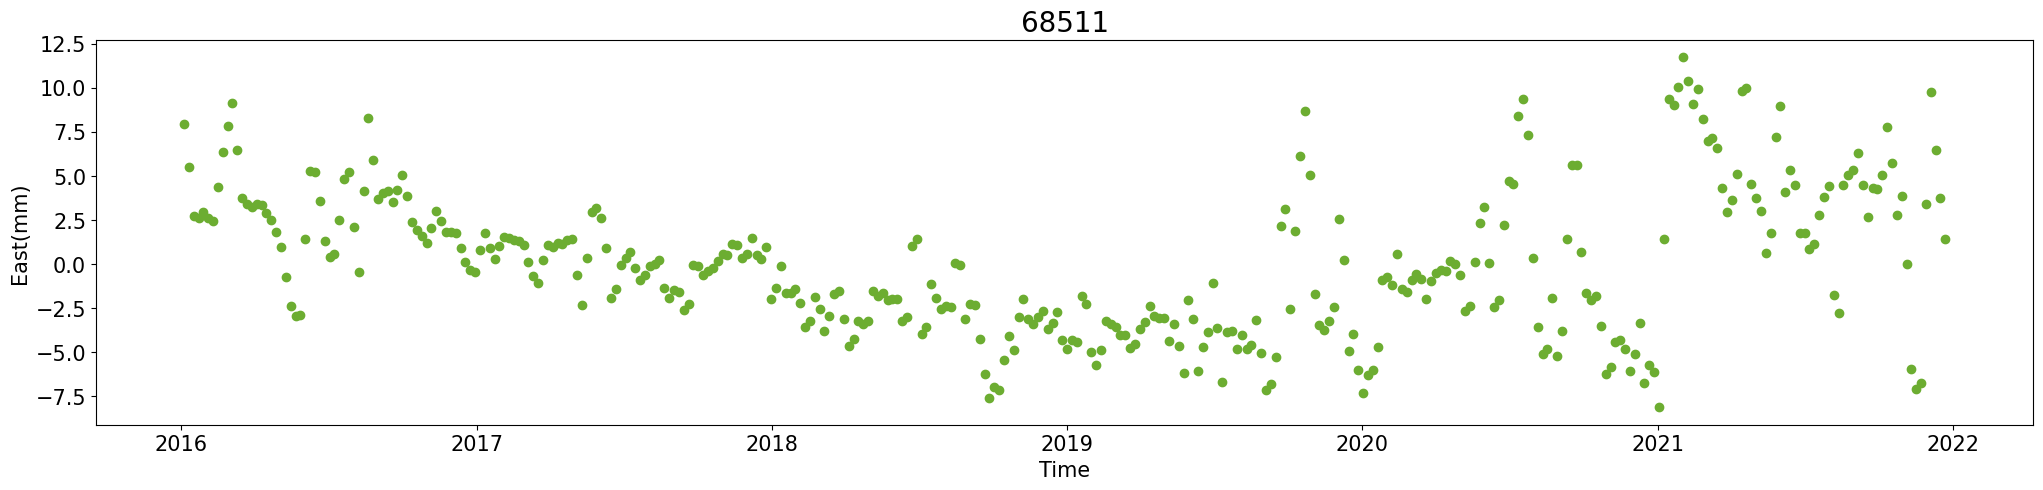

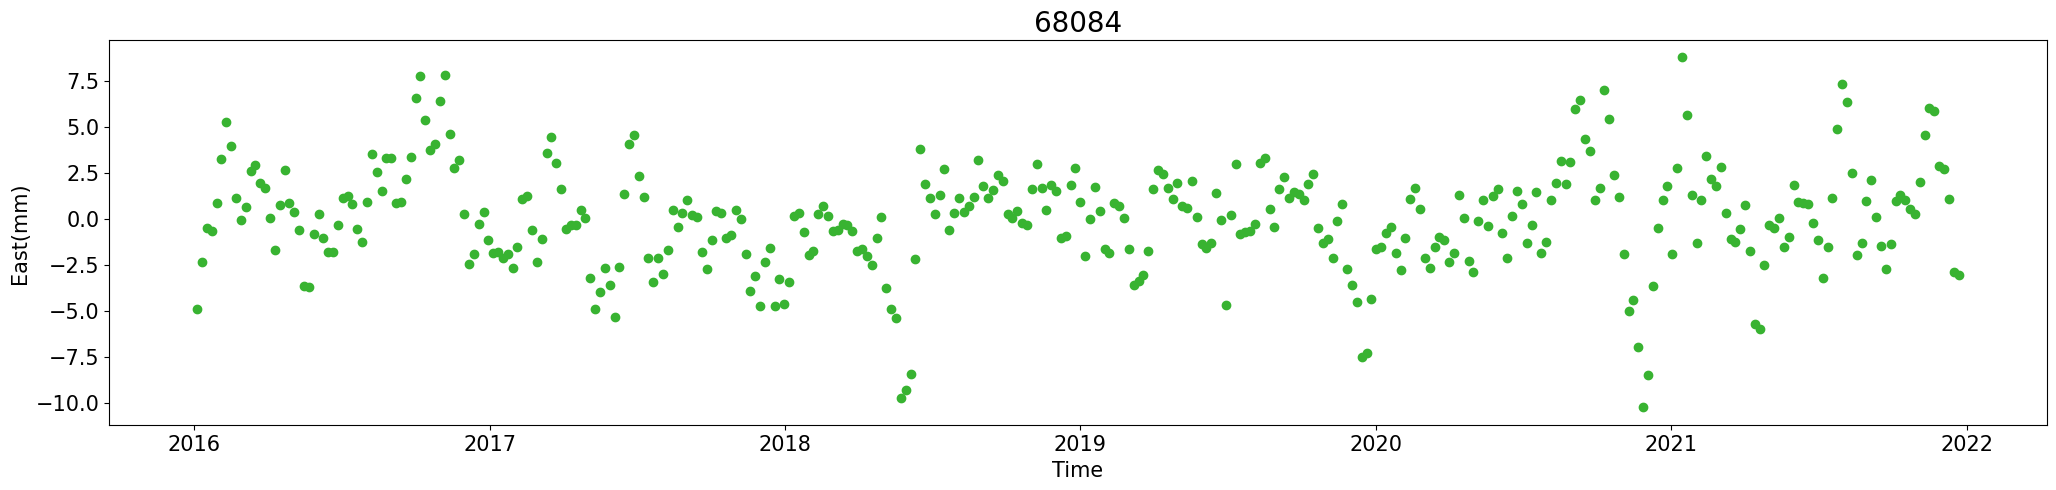

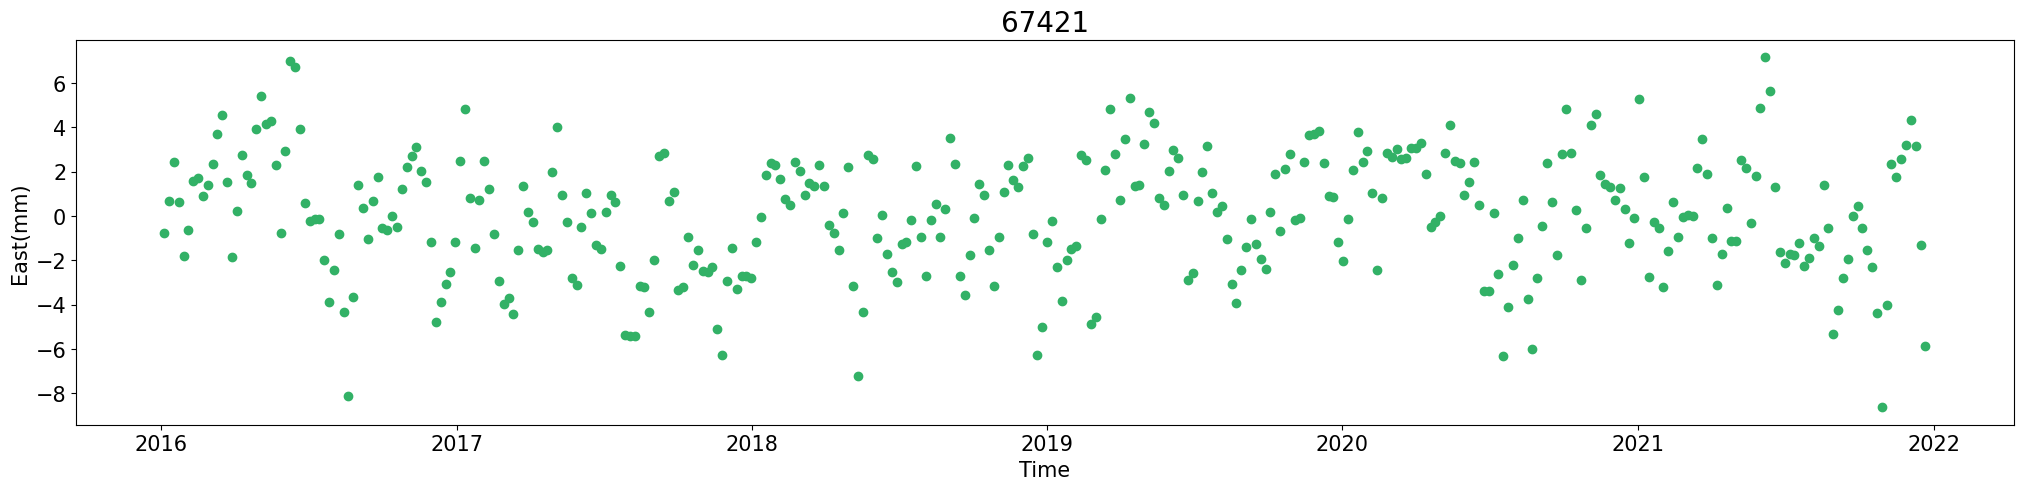

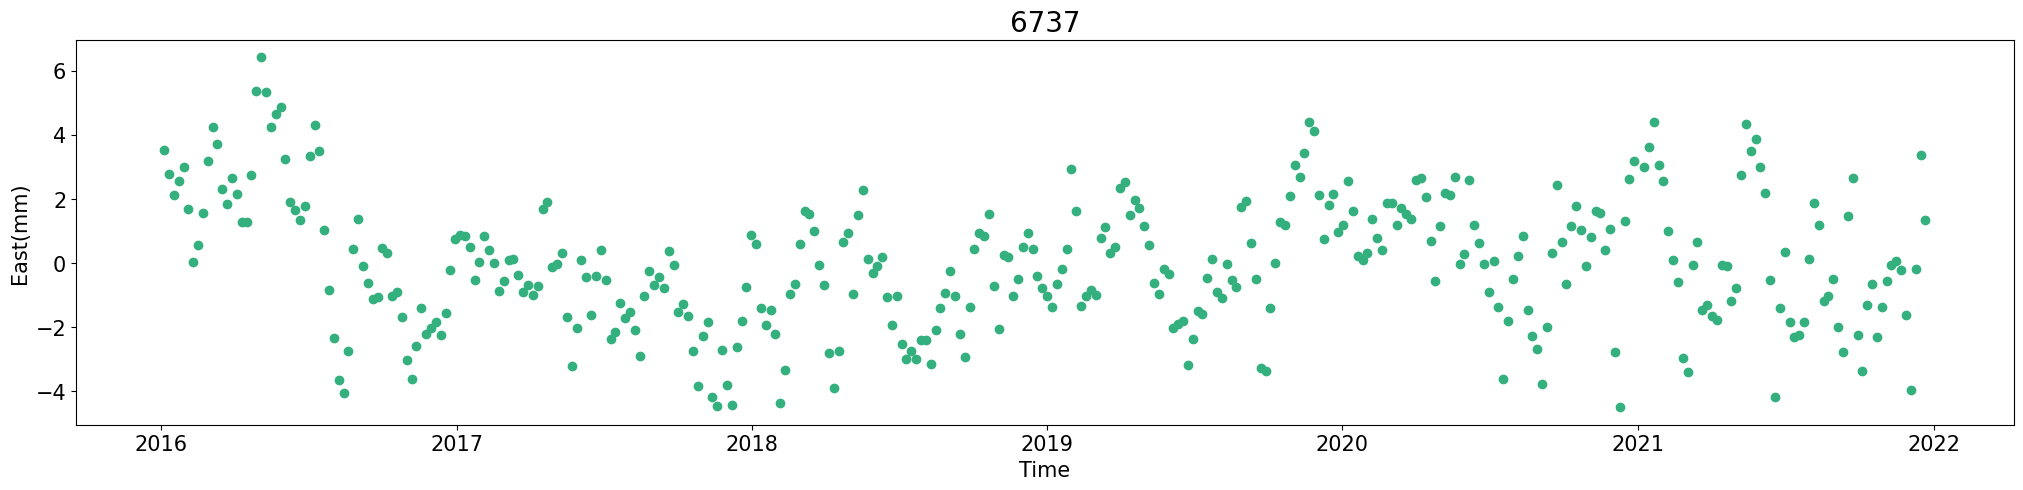

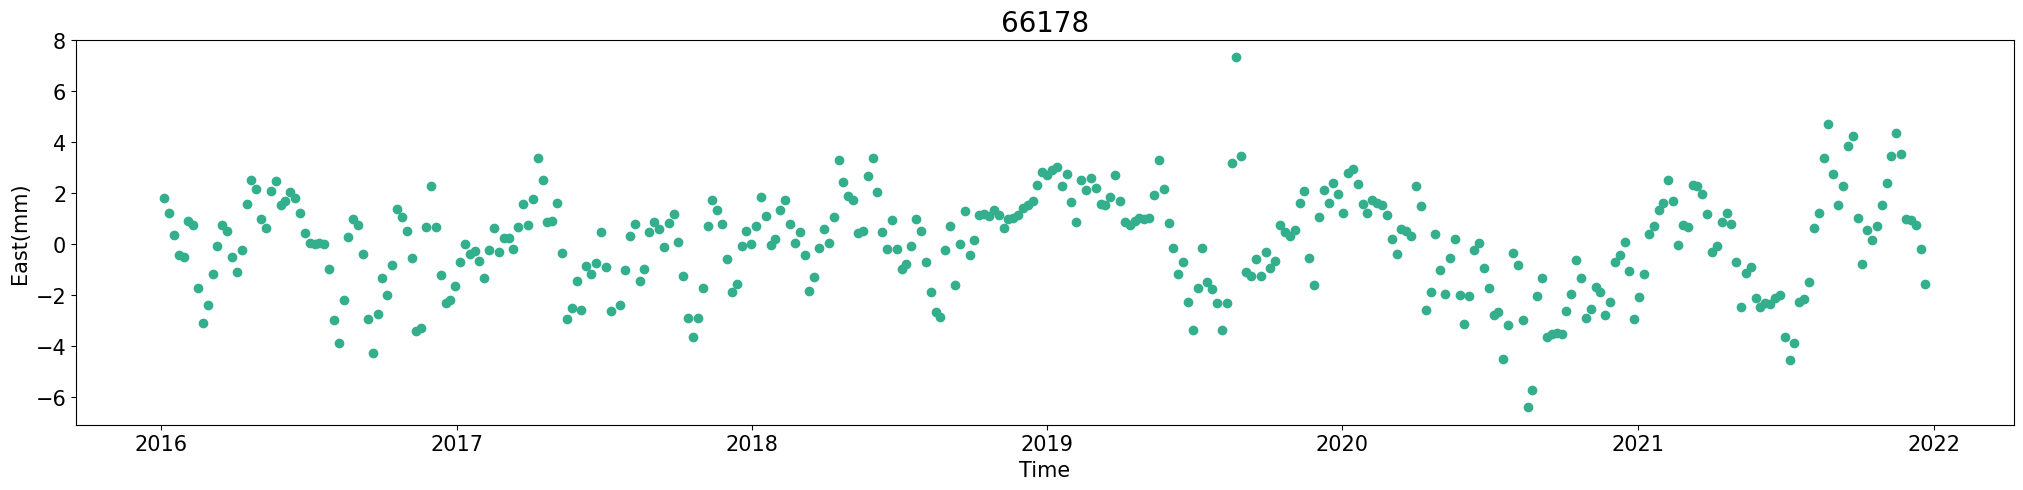

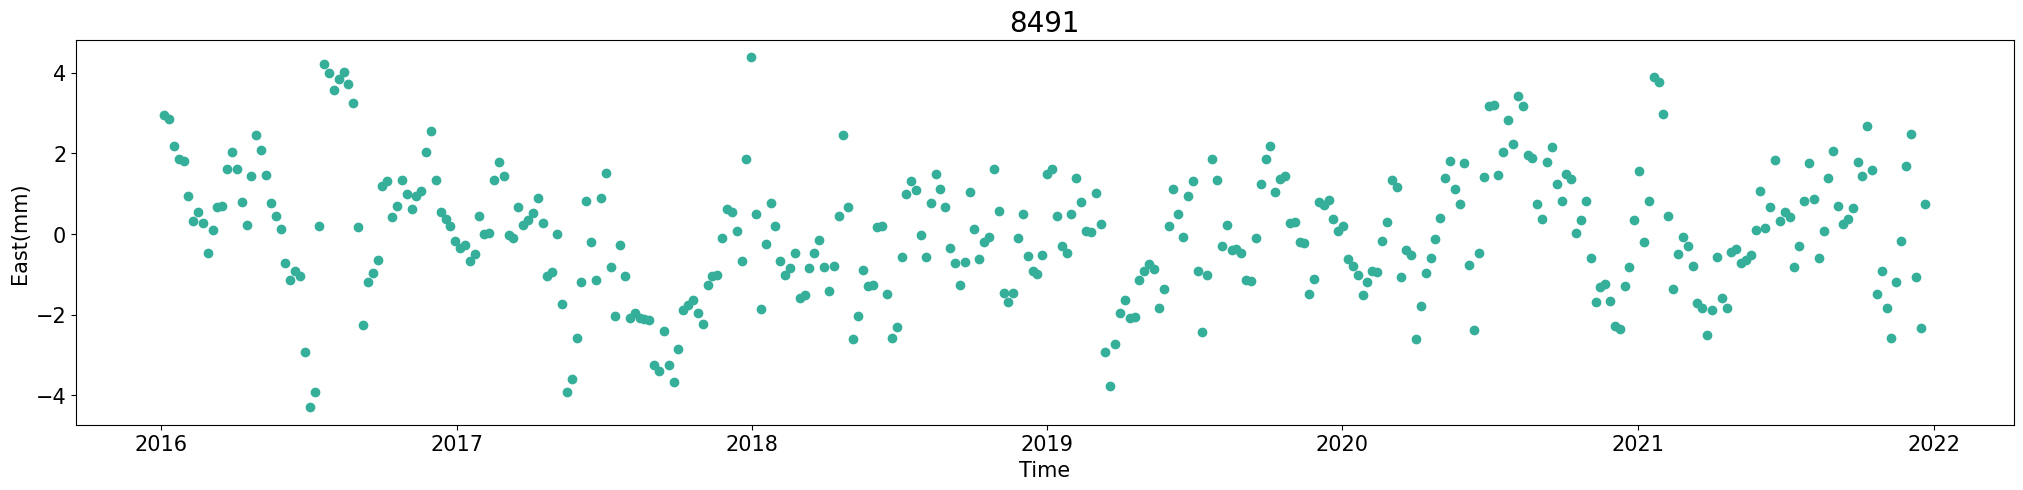

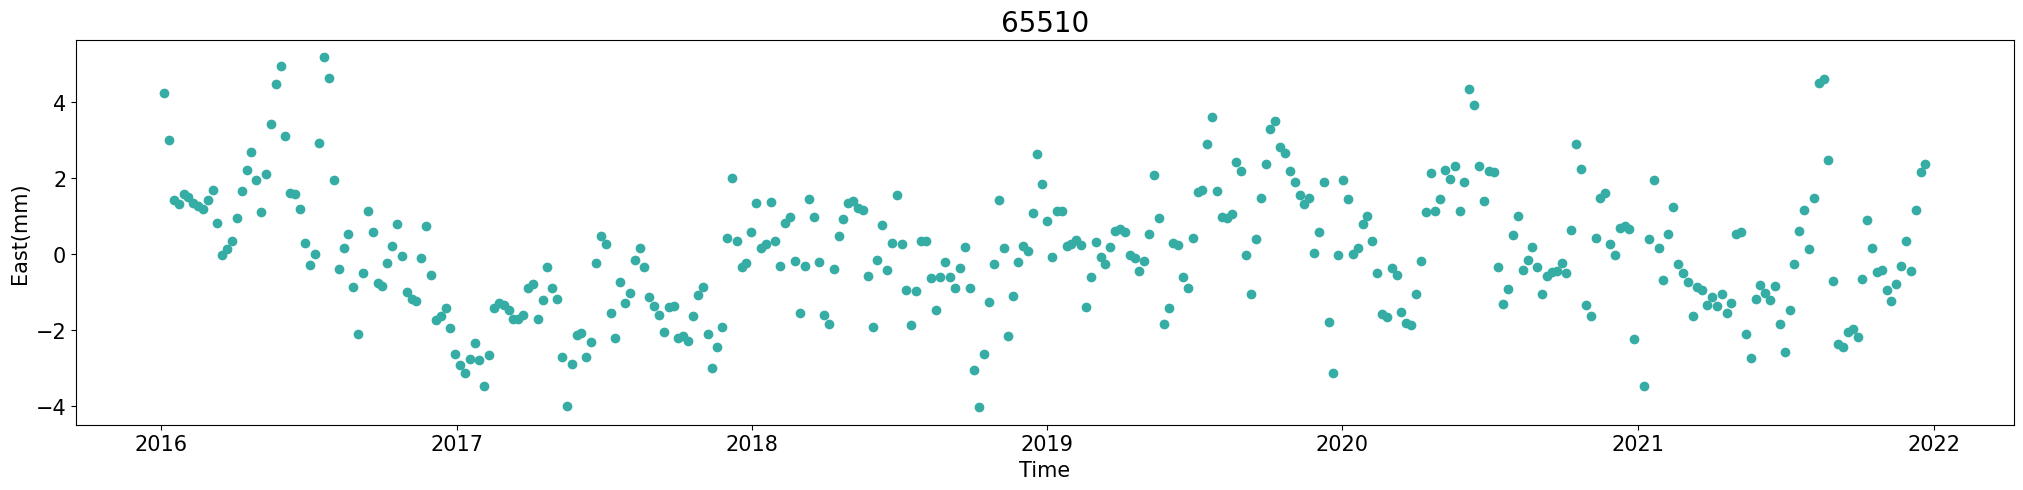

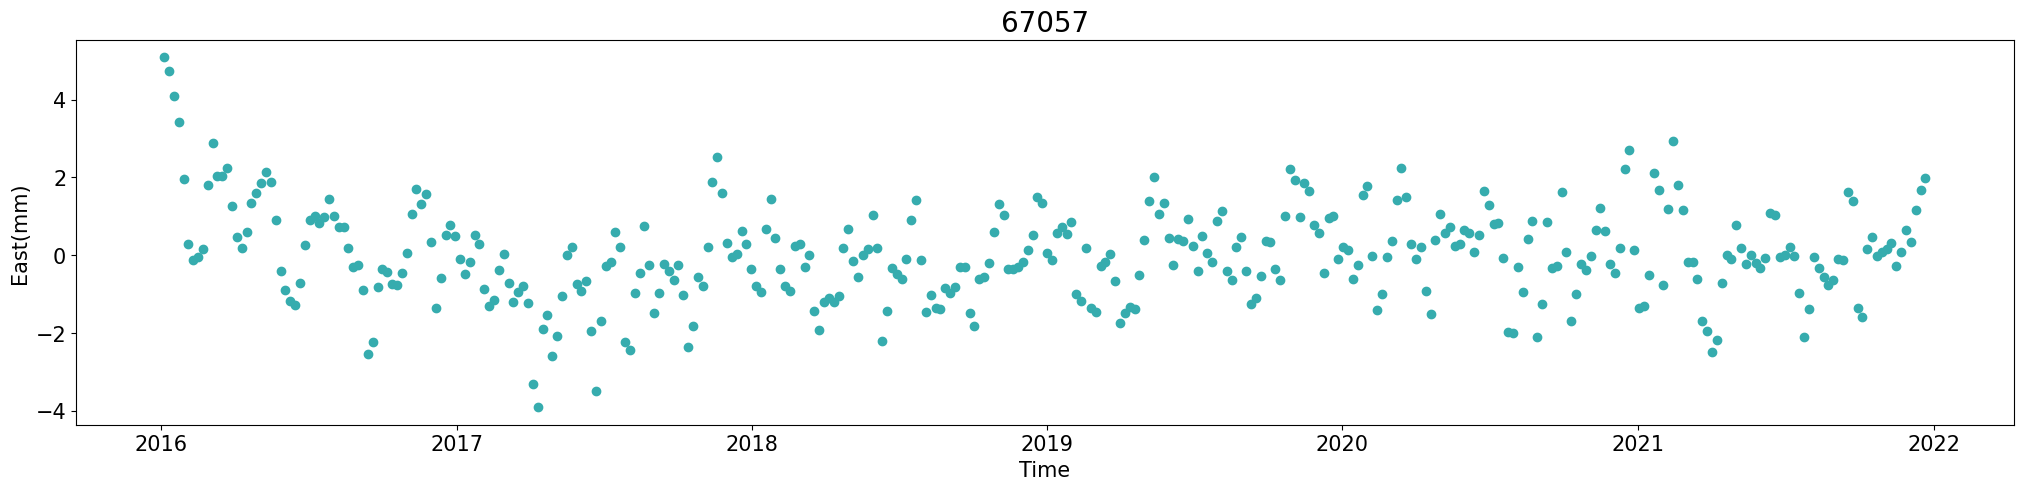

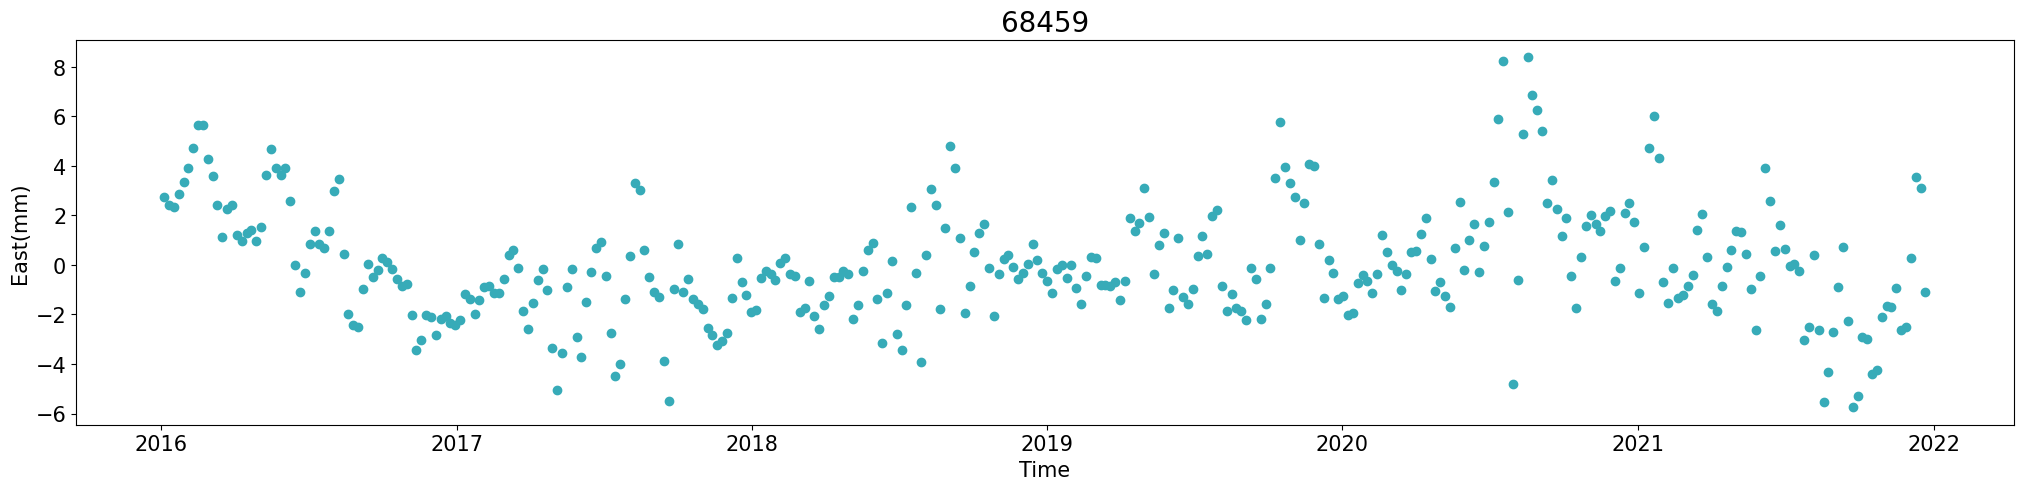

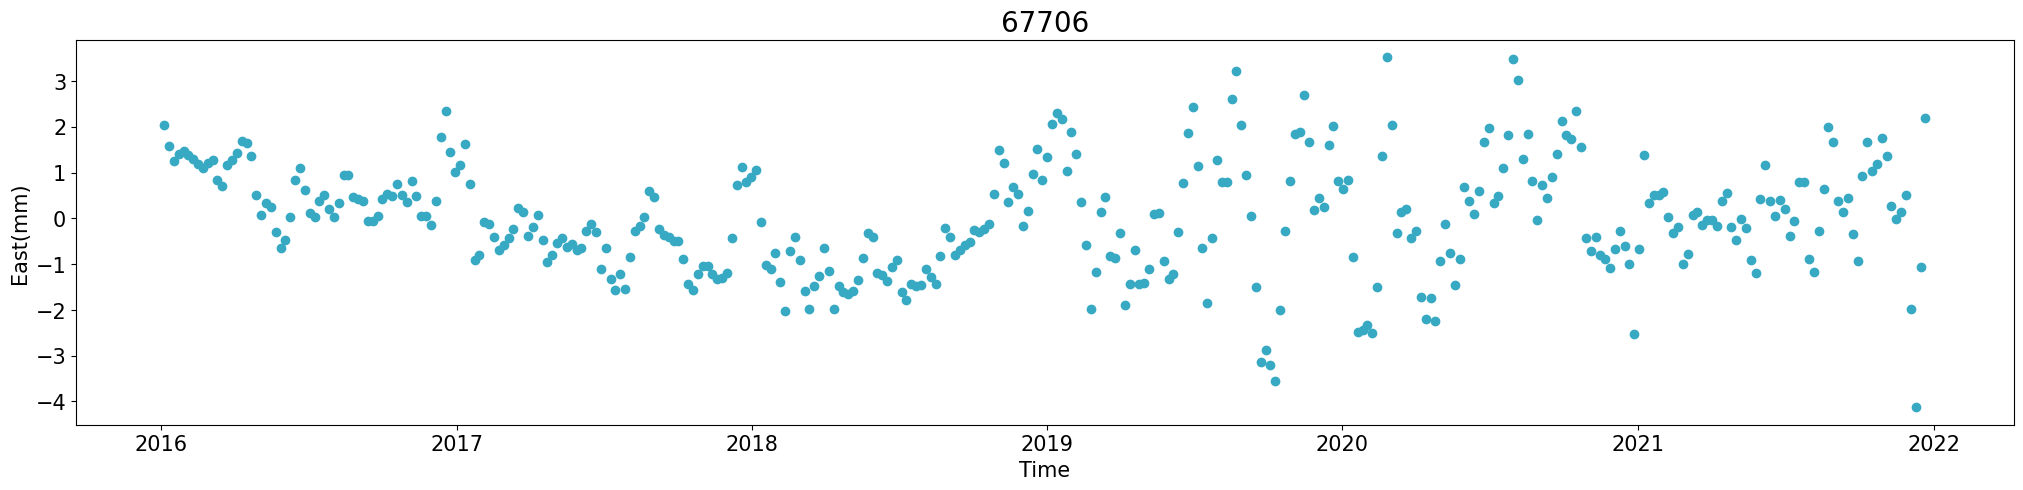

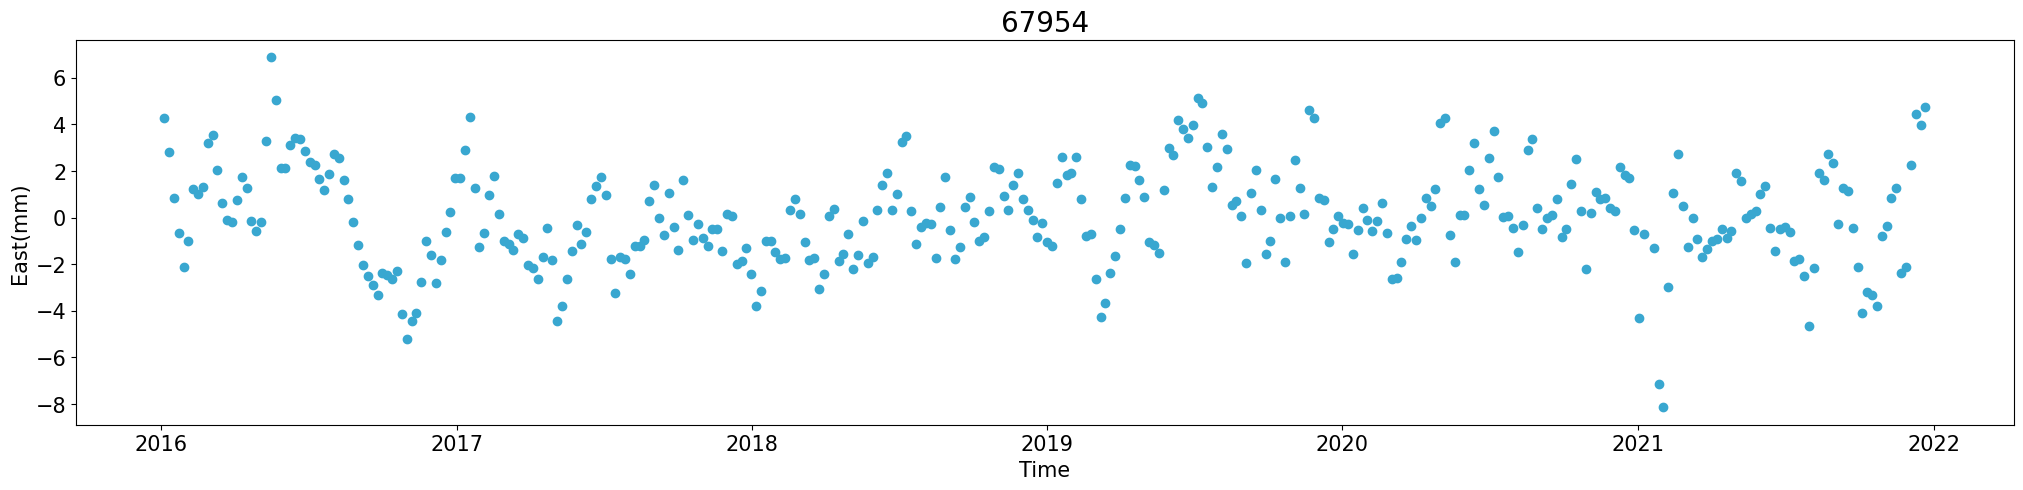

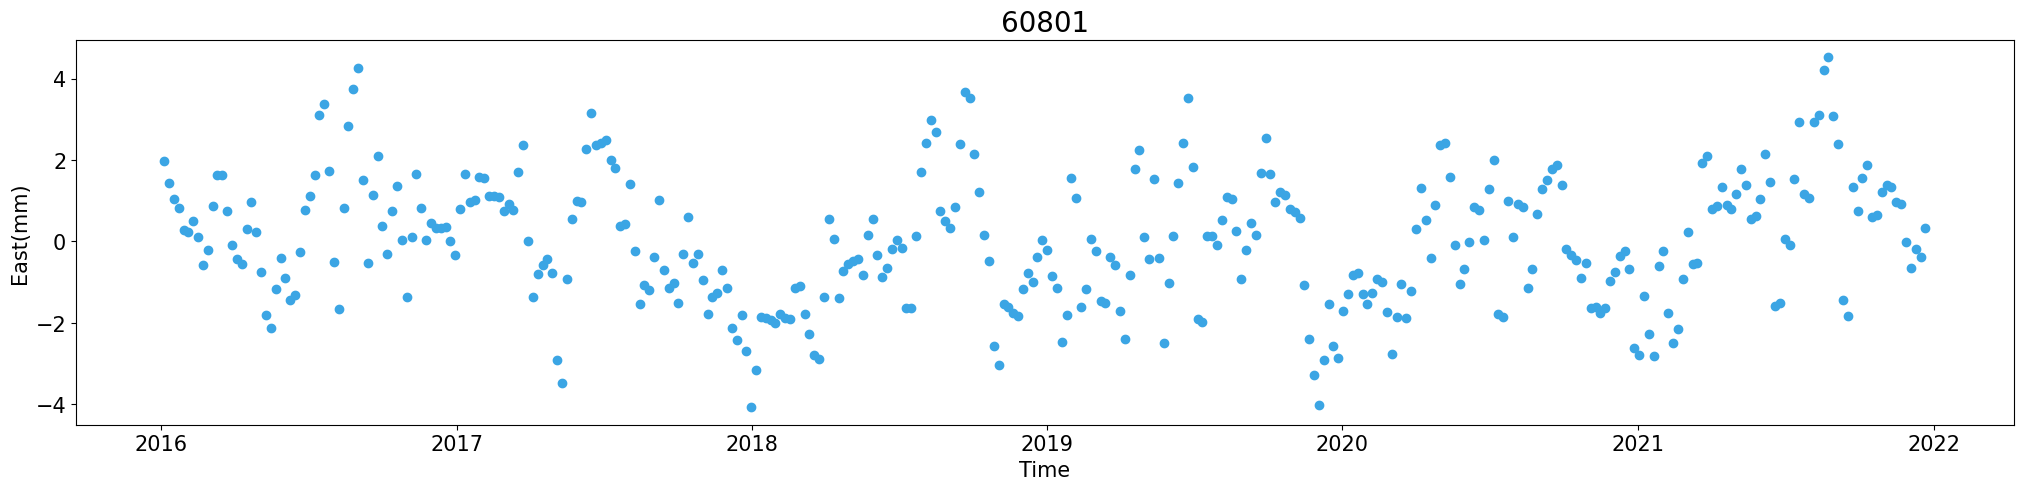

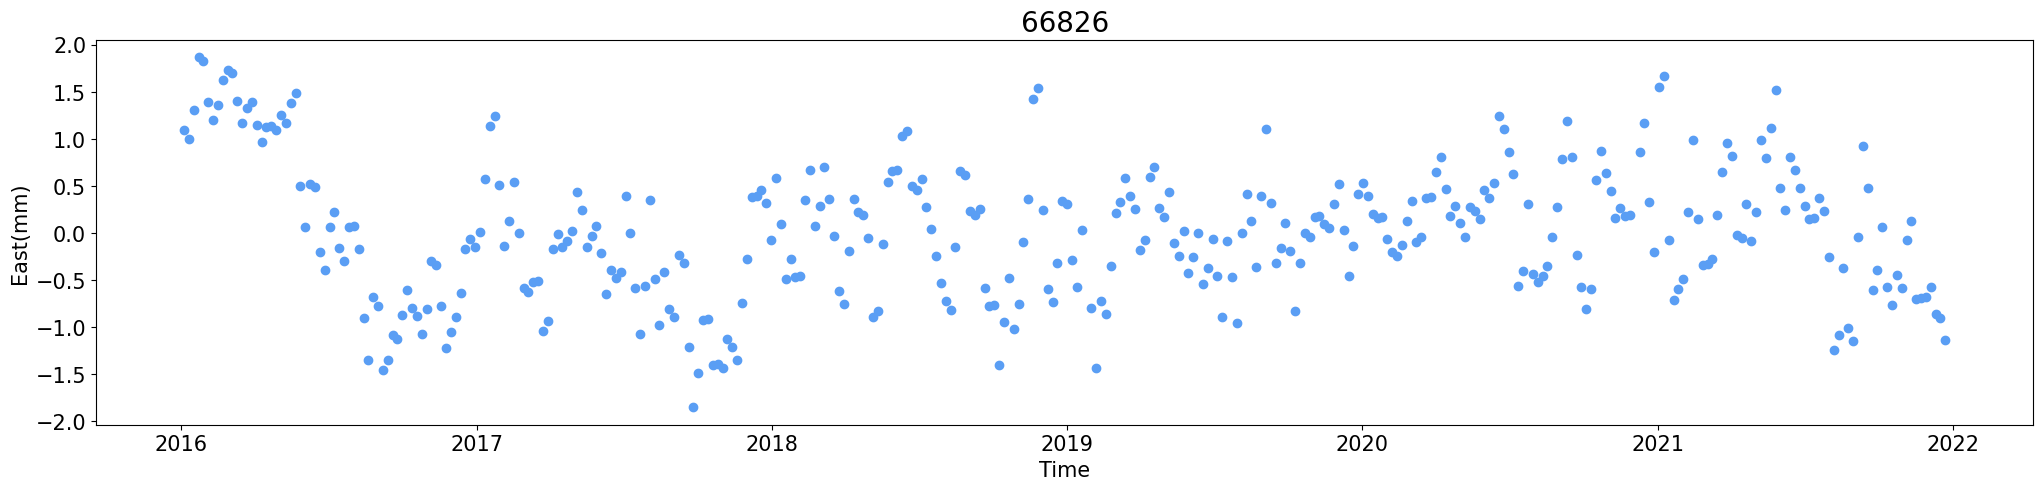

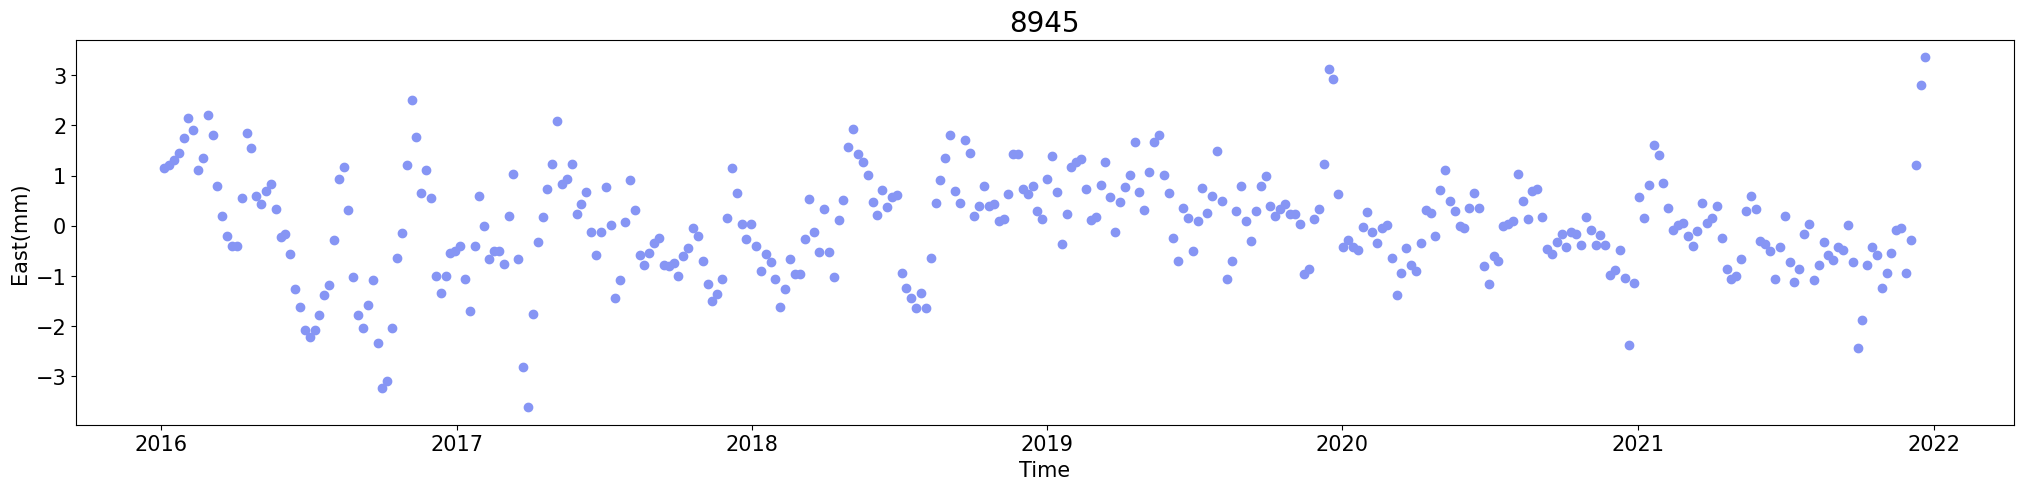

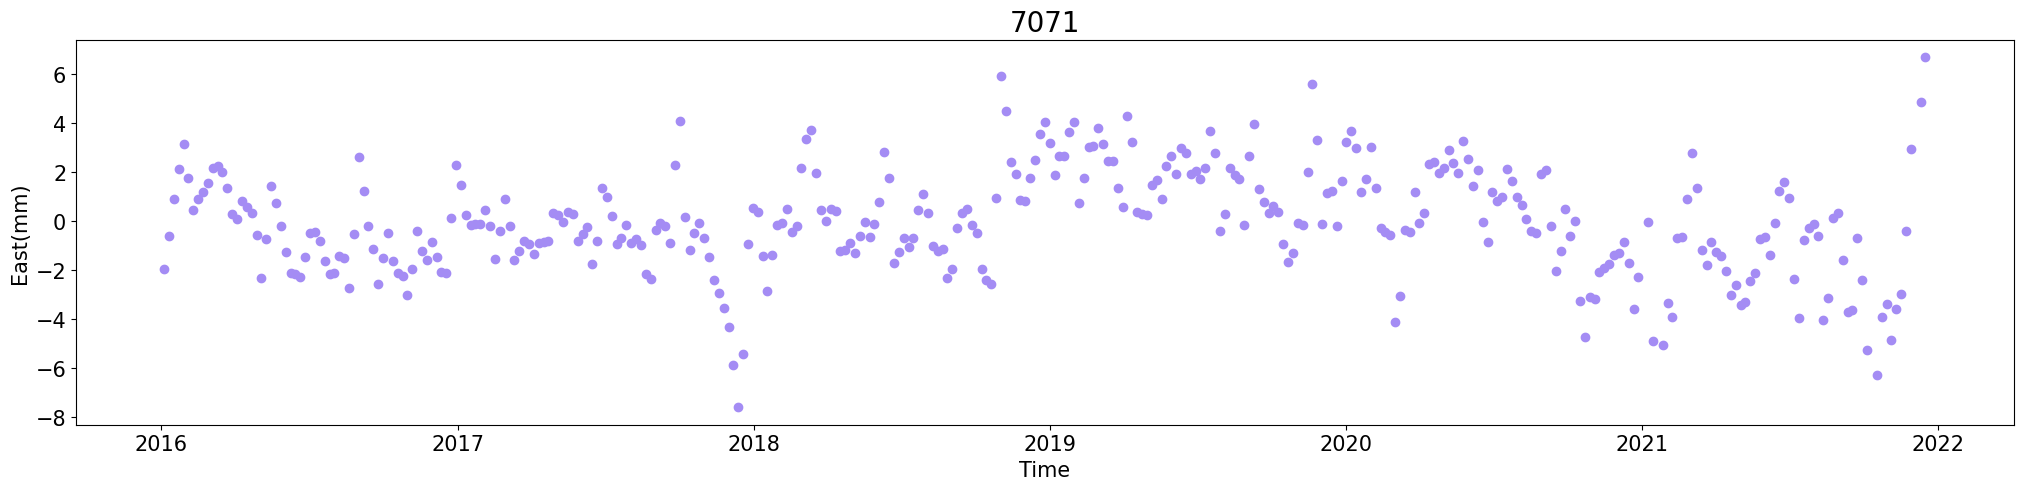

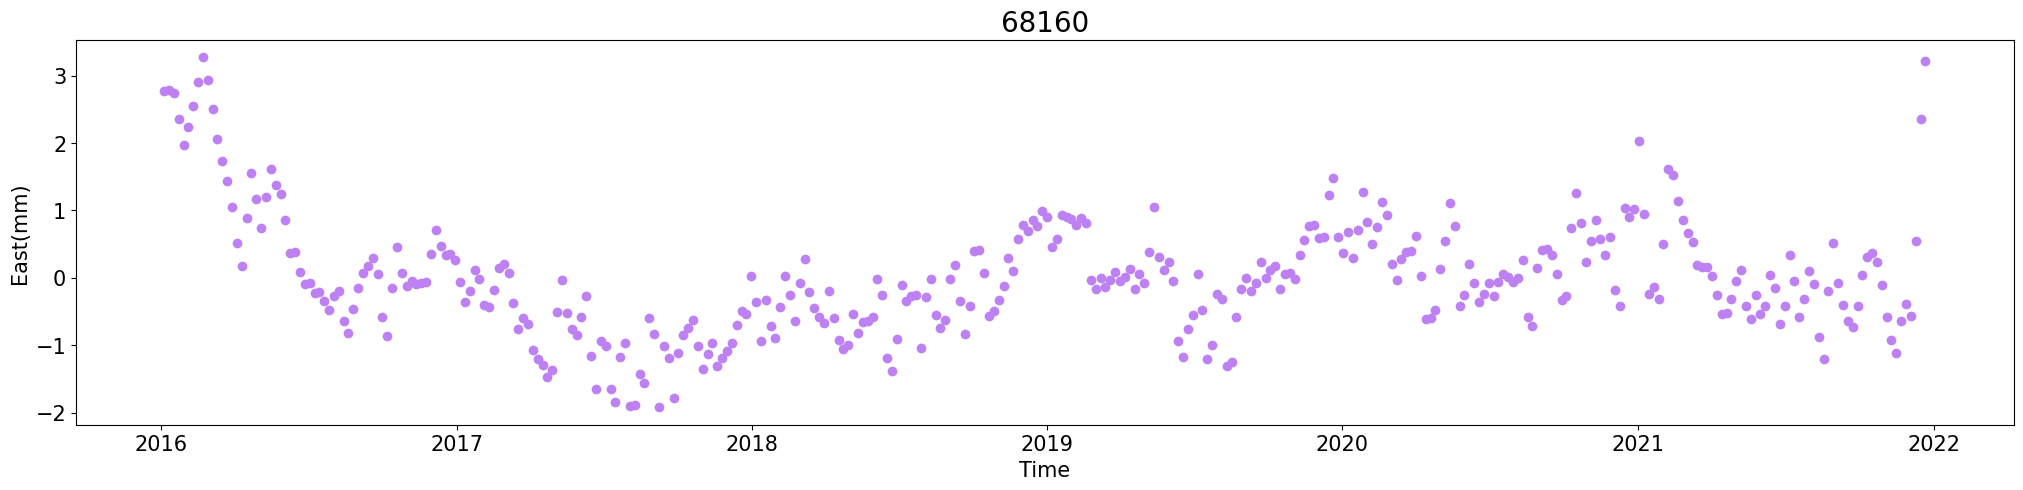

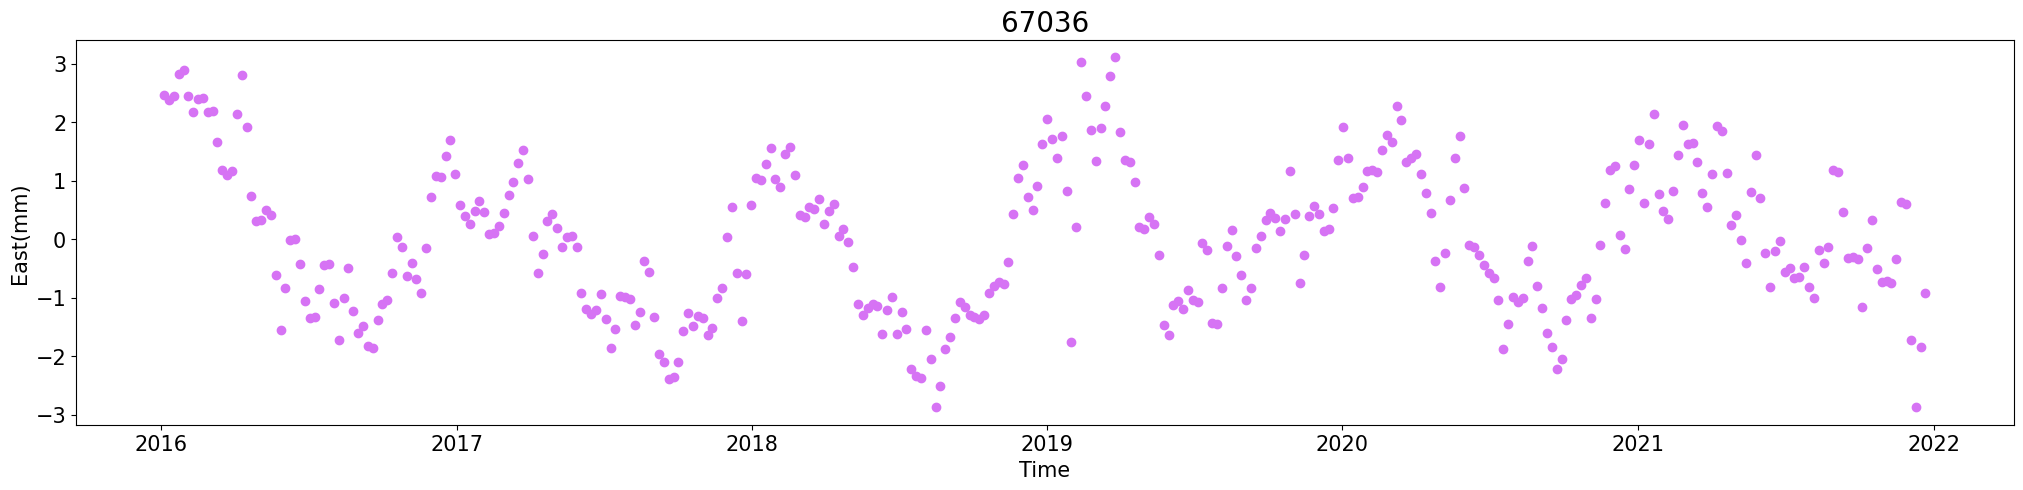

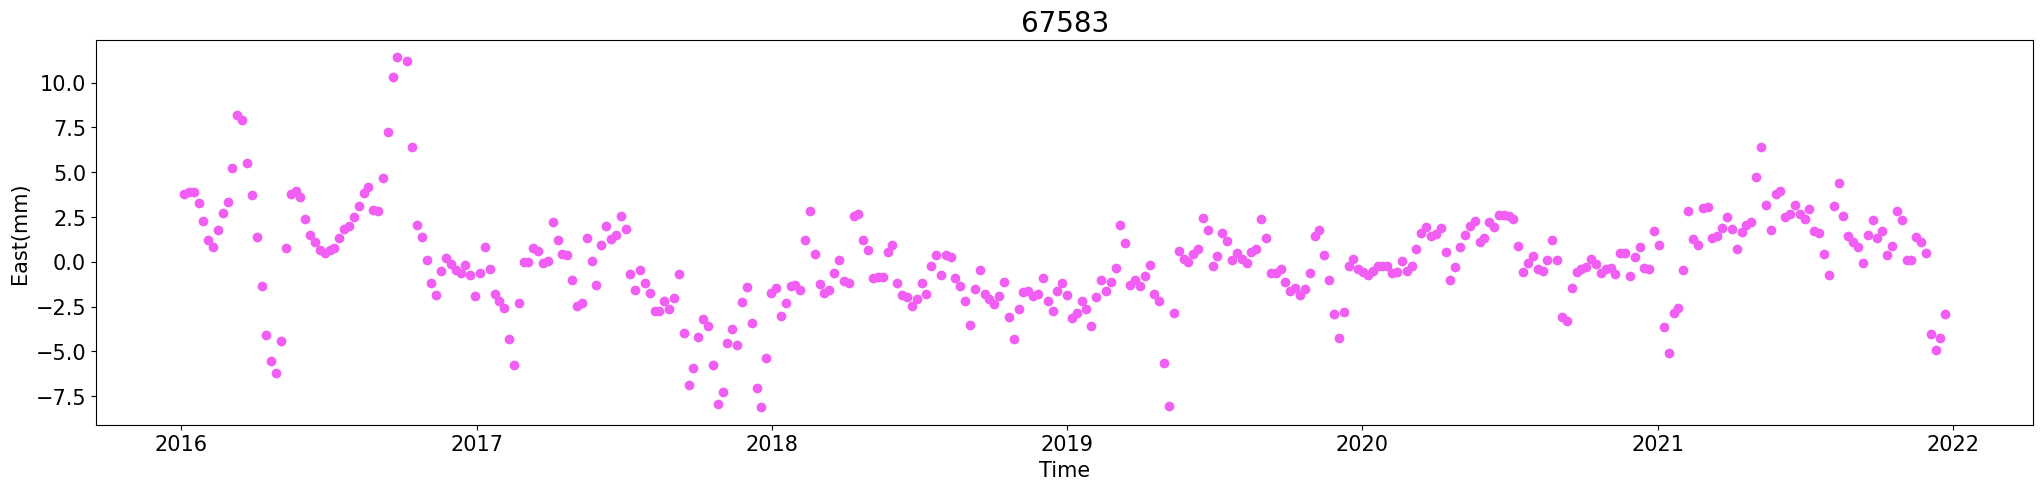

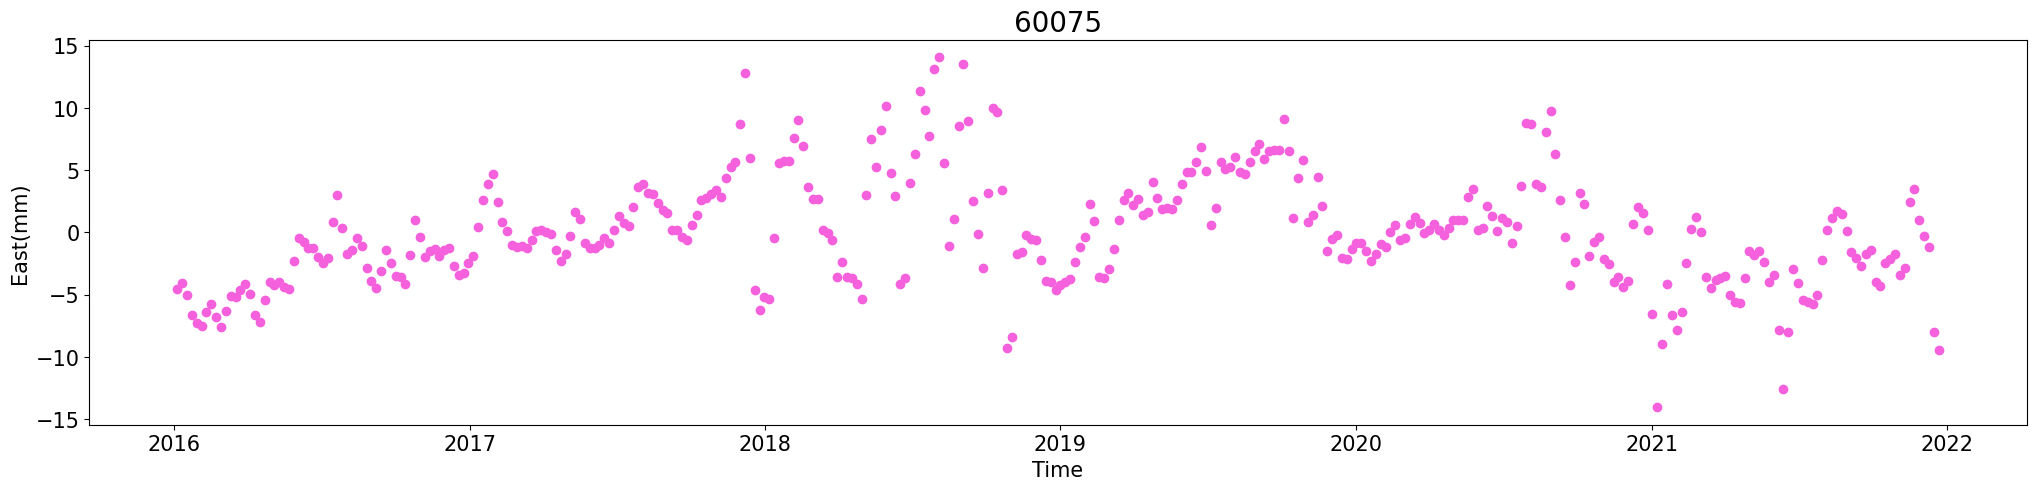

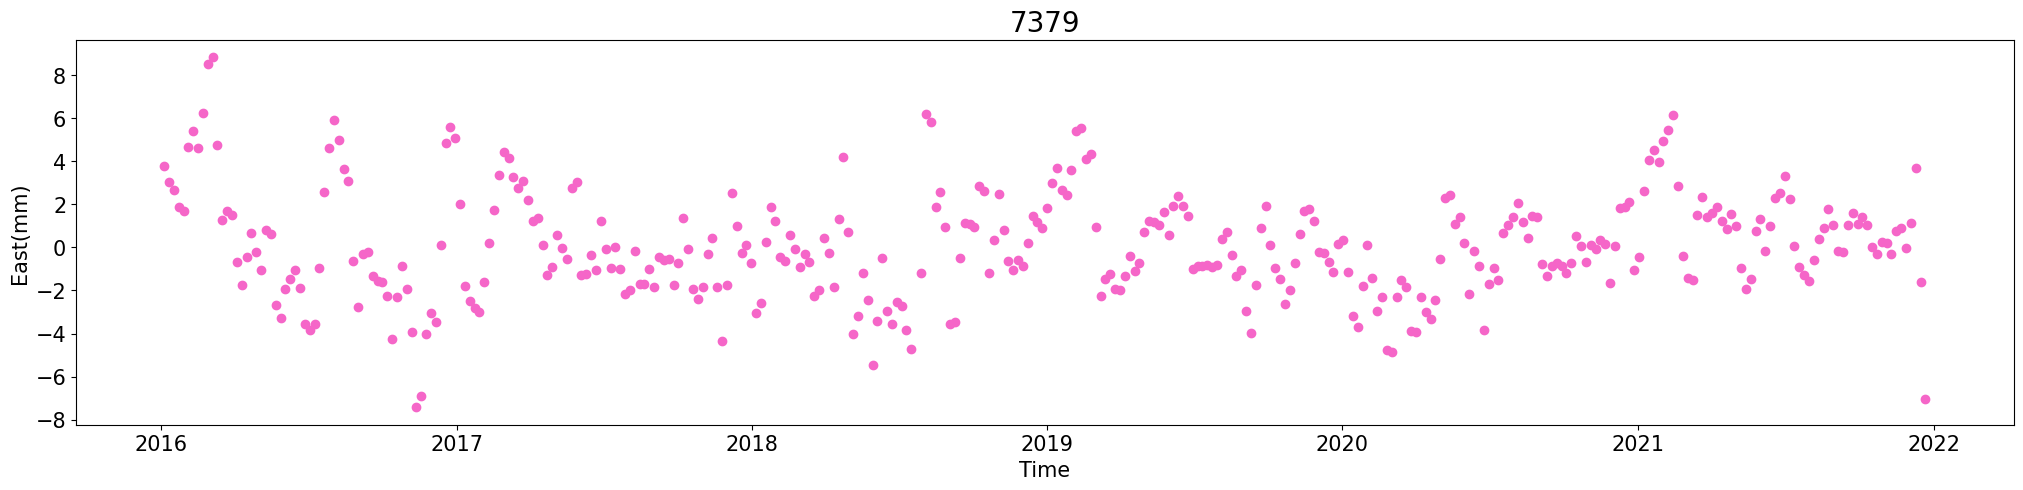

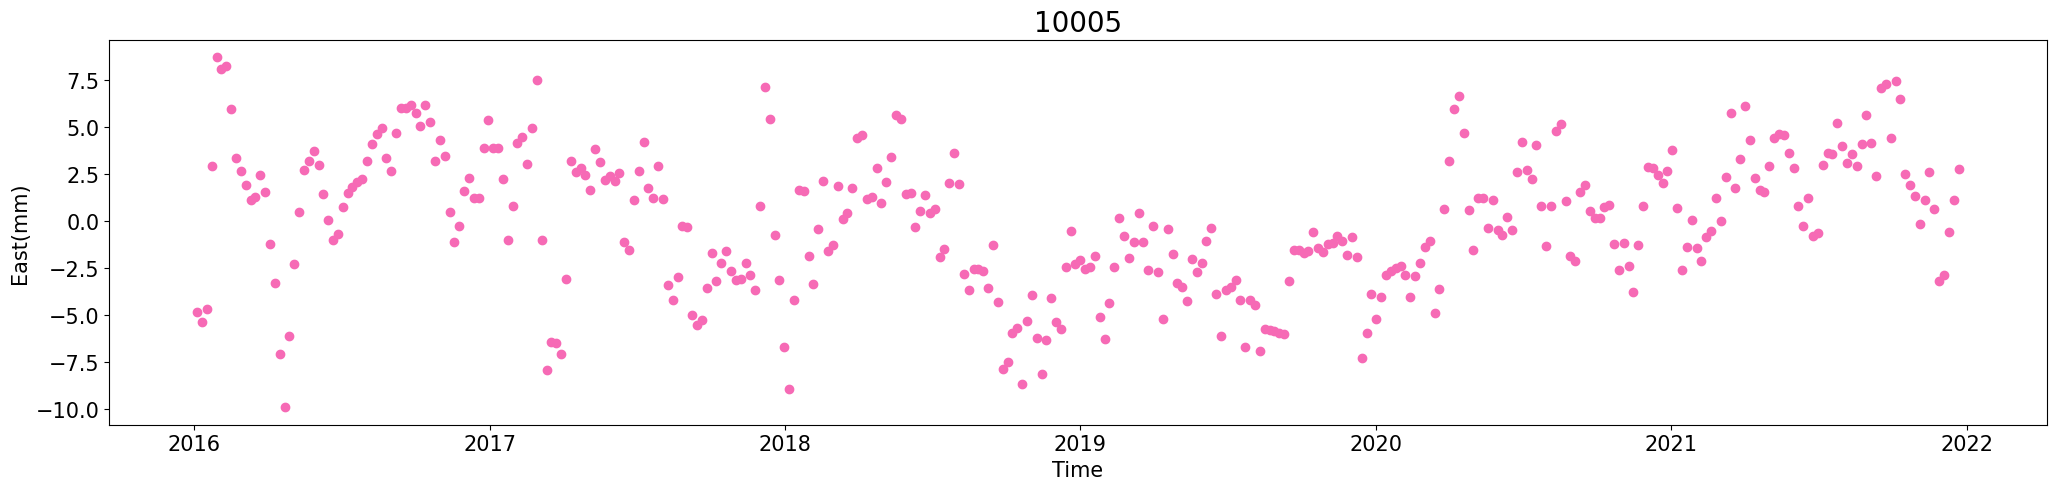

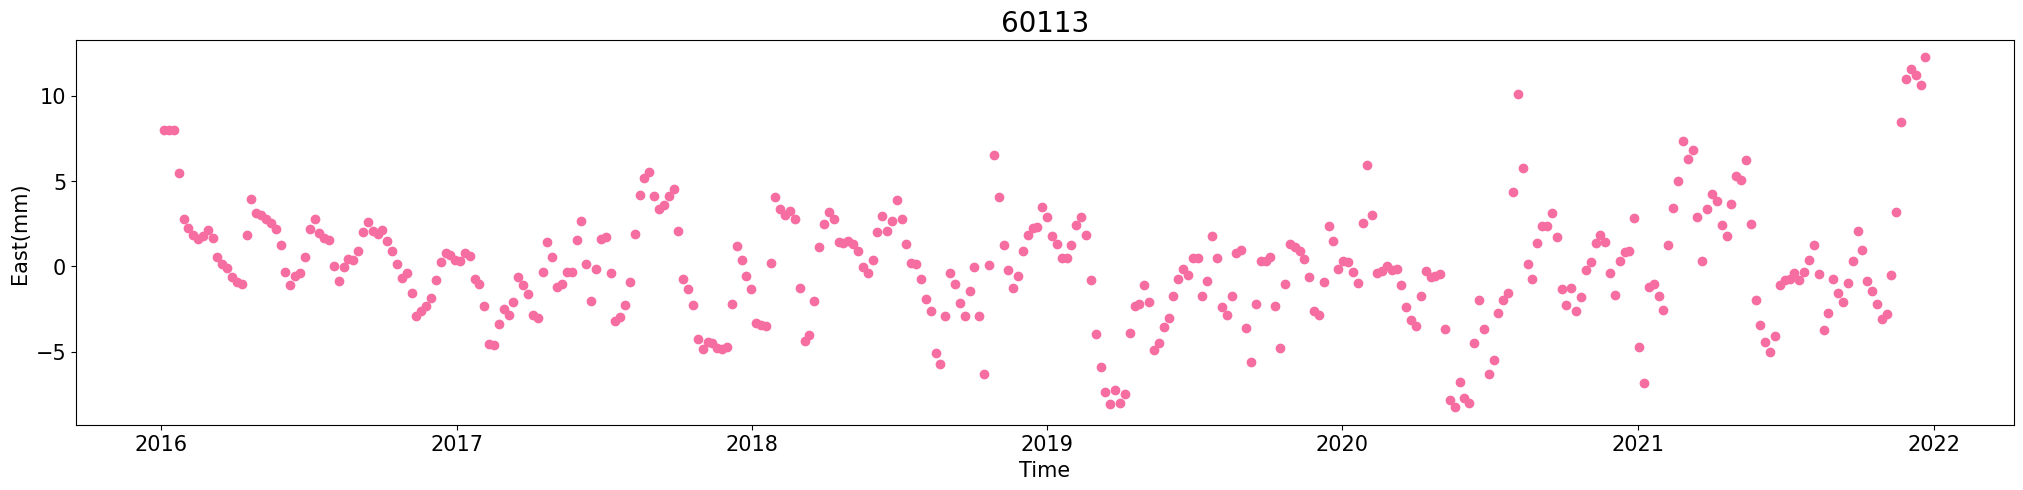

In [560]:
#checking the areas's plots - rolling mean

colors = sns.color_palette("husl", len(areas_rolling_mean_dict))
folder = '/home/rafaela/internship/time_series/TimeSeries-insar/egm_files/insar_ts_plots/east/points_rolling_mean'

for i, (indice_number, indice_data) in enumerate(areas_rolling_mean_dict.items()):
    plt.figure(figsize=(25, 5))
    
    plt.plot(indice_data.index, indice_data, 'o', color = colors[i])
    plt.title(f'{indice_number}', fontsize = 20)
    plt.xlabel('Time', fontsize = 15)
    plt.xticks(fontsize=15)
    plt.ylabel('East(mm)', fontsize = 15)
    plt.yticks(fontsize=15)
    #plt.ylim(-0.008,0.008)
   
    fl = os.path.join(folder, f'{indice_number}.svg')
    f = io.BytesIO()
    plt.savefig(fl, format="svg")

    plt.show()

In [123]:
#checking all point together:

#colors = sns.color_palette("husl", len(areas_rolling_mean_dict))
#folder = ''

#plt.figure(figsize=(40, 15))

#for i, (indice_number, indice_data) in enumerate(areas_rolling_mean_dict.items()):
    #plt.plot(indice_data.index, indice_data, label = f'{indice_number}', color=colors[i], lw=1.5)

#plt.title('Rolling Mean - All Points', fontsize=30)
#plt.xlabel('Time', fontsize=20)
#plt.xticks(fontsize=20)
#plt.ylabel('East(mm)', fontsize=20)
#plt.yticks(fontsize=20)
#plt.xlim(pd.Timestamp('2011-01-15'), pd.Timestamp('2018-10-15'))
#plt.legend()

#fl = os.path.join(folder, 'rm_all_points_EAST.svg')
#plt.savefig(fl, format="svg")

#plt.show()

In [561]:
#getting the average for all points rolling mean
all_rm_data = pd.DataFrame()

for indice_number, indice_data in areas_rolling_mean_dict.items():
    all_rm_data[indice_number] = indice_data.squeeze()

avg_rm = all_rm_data.mean(axis=1).rolling(2, min_periods=1).mean()
avg_rm_df = pd.DataFrame(avg_rm)
avg_rm_df.columns = ['avg_east(mm)']

print(avg_rm_df)

            avg_east(mm)
2016-01-05      2.121113
2016-01-11      2.030377
2016-01-17      1.790979
2016-01-23      1.536626
2016-01-29      1.379929
...                  ...
2021-11-22      0.161531
2021-11-28      0.321240
2021-12-04      0.497997
2021-12-16      1.032583
2021-12-22      1.039372

[363 rows x 1 columns]


In [562]:
#removing the average rolling mean from each point
points_avgrm_reduced = pd.DataFrame()

for indice_number, indice_data in areas_rolling_mean_dict.items():
    points_avgrm_reduced[indice_number] = indice_data[indice_number] - avg_rm
    
points_avgrm_reduced = points_avgrm_reduced.dropna(axis=0)

print(points_avgrm_reduced)

               61315     9815      7862      59366     8396      67889  \
2016-01-05  1.049575  3.846940  2.671178 -2.596281  6.870294 -1.938419   
2016-01-11  1.244634  4.100659  2.319451 -1.903175  5.516139 -1.793729   
2016-01-17  1.392677  3.966021  1.823922 -1.009039  3.365753 -1.146426   
2016-01-23  1.205676  3.096338  2.293348 -0.199947 -1.719678 -0.684167   
2016-01-29  0.721018  2.678998  2.365118  0.561489 -5.552765 -0.769564   
...              ...       ...       ...       ...       ...       ...   
2021-11-04  1.635124 -0.128129  1.535261  0.304298 -5.237406  0.984900   
2021-11-10  1.681717  1.135782  1.388281 -0.403016 -3.639243 -1.819248   
2021-11-16  0.735340  0.656724  2.248332 -0.503300 -1.284049 -1.416364   
2021-11-22  0.299902 -1.961397  1.719321 -0.642645 -2.217917 -1.402542   
2021-11-28  0.498838 -3.195142  2.474685 -0.047616 -4.367411 -2.204346   

               9437      68722     67244     68791  ...     66826     8945   \
2016-01-05  0.120917 -0.711487 -

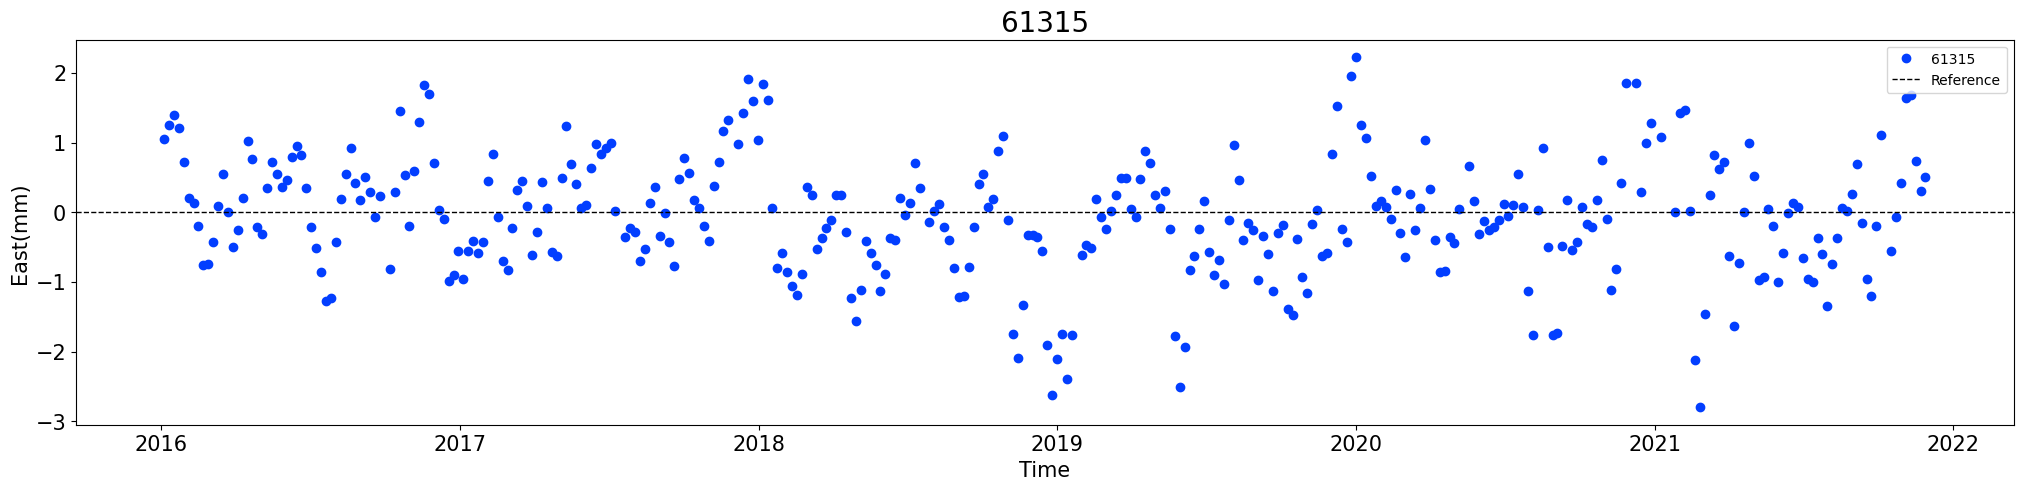

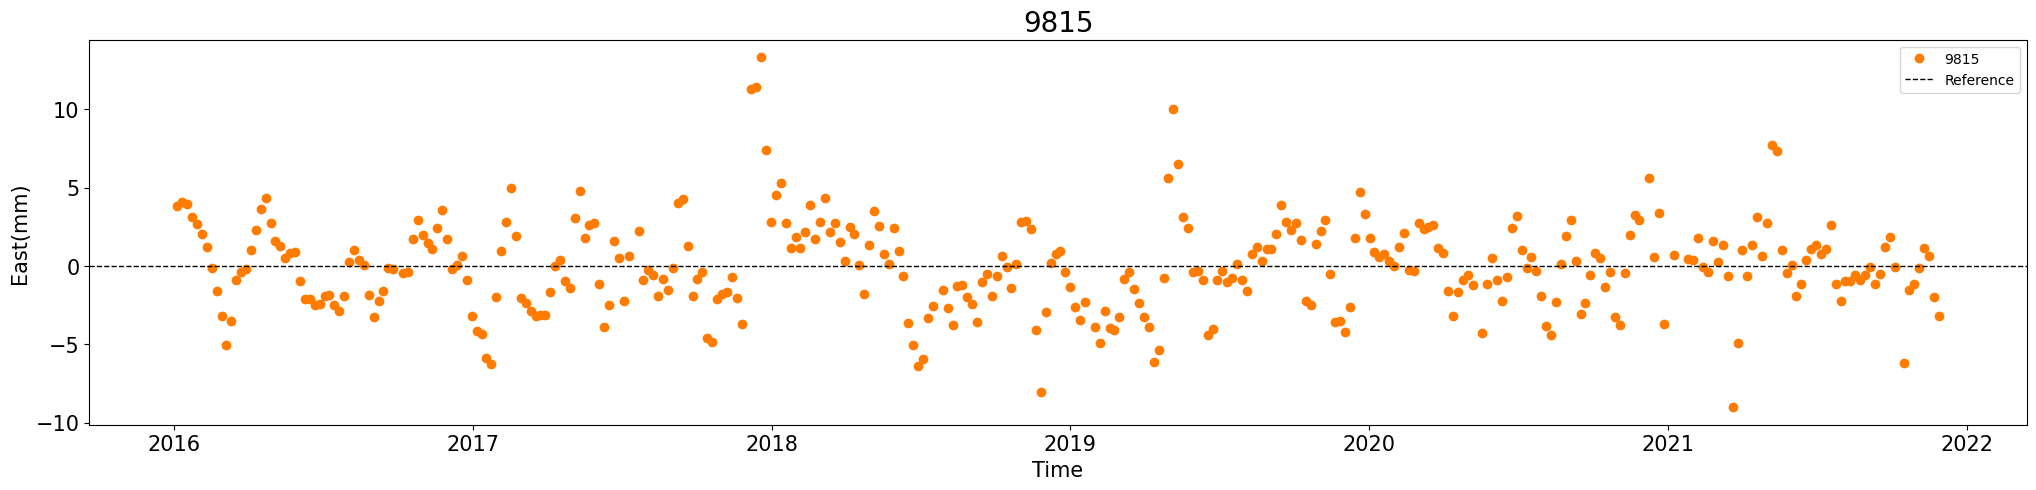

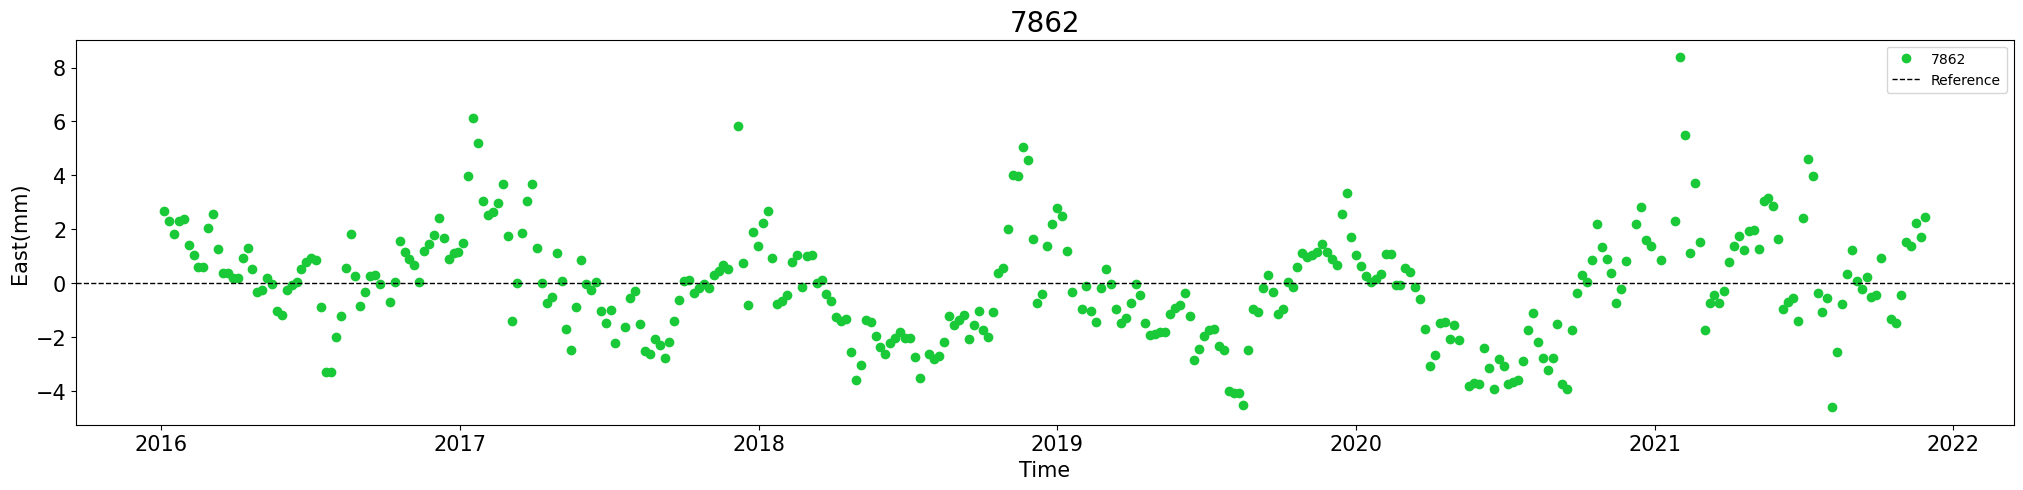

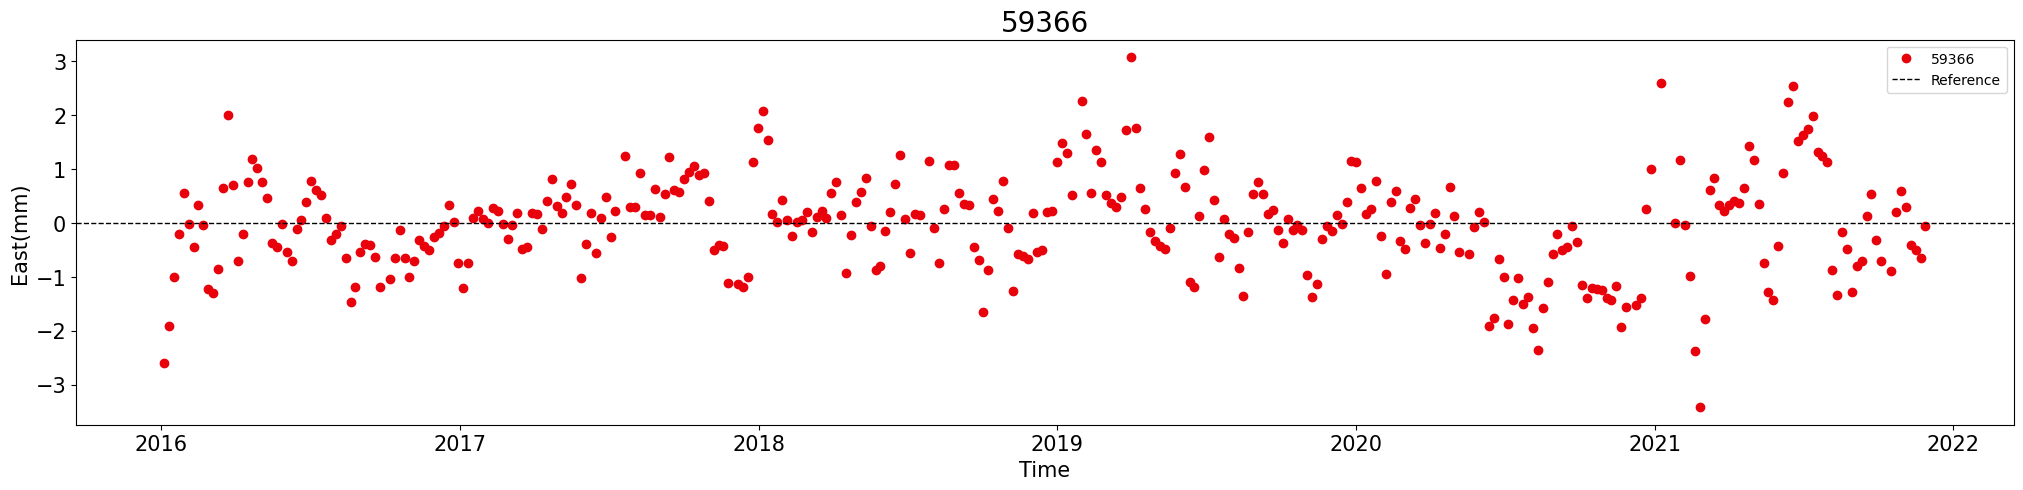

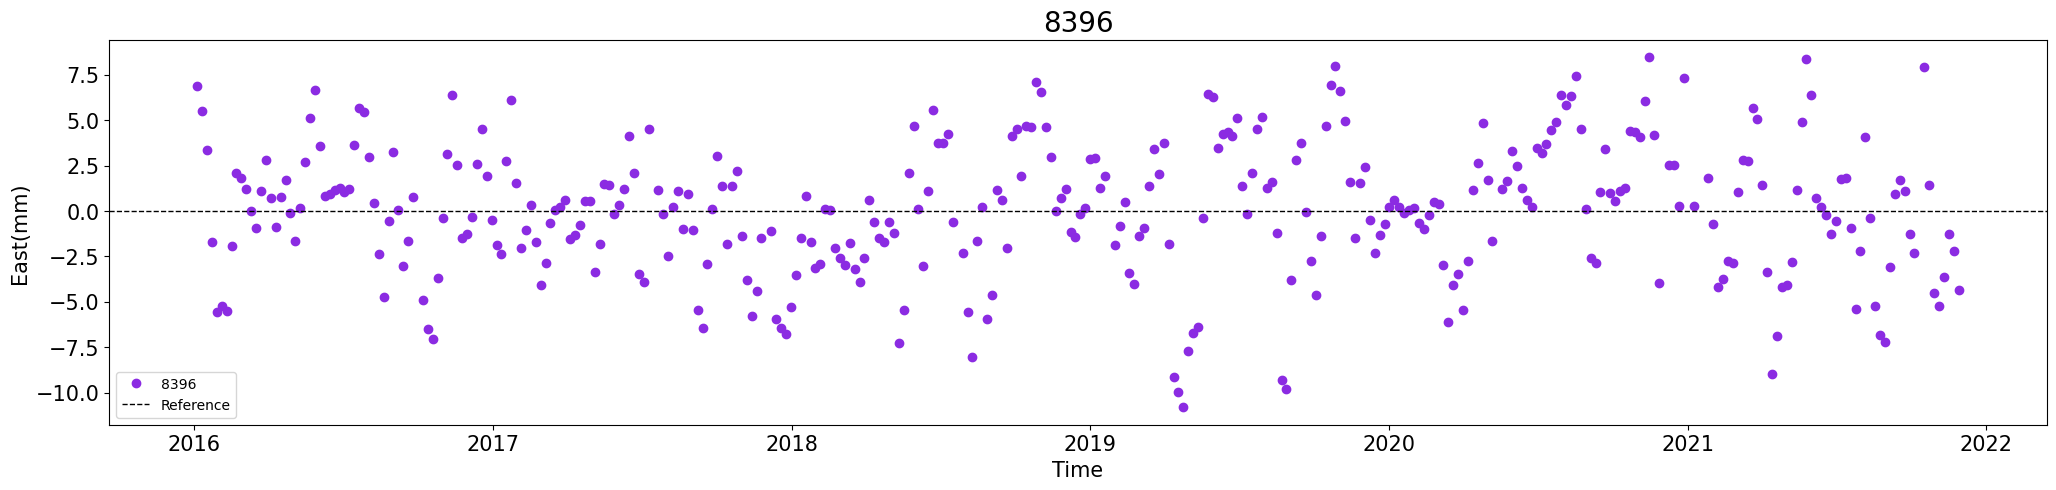

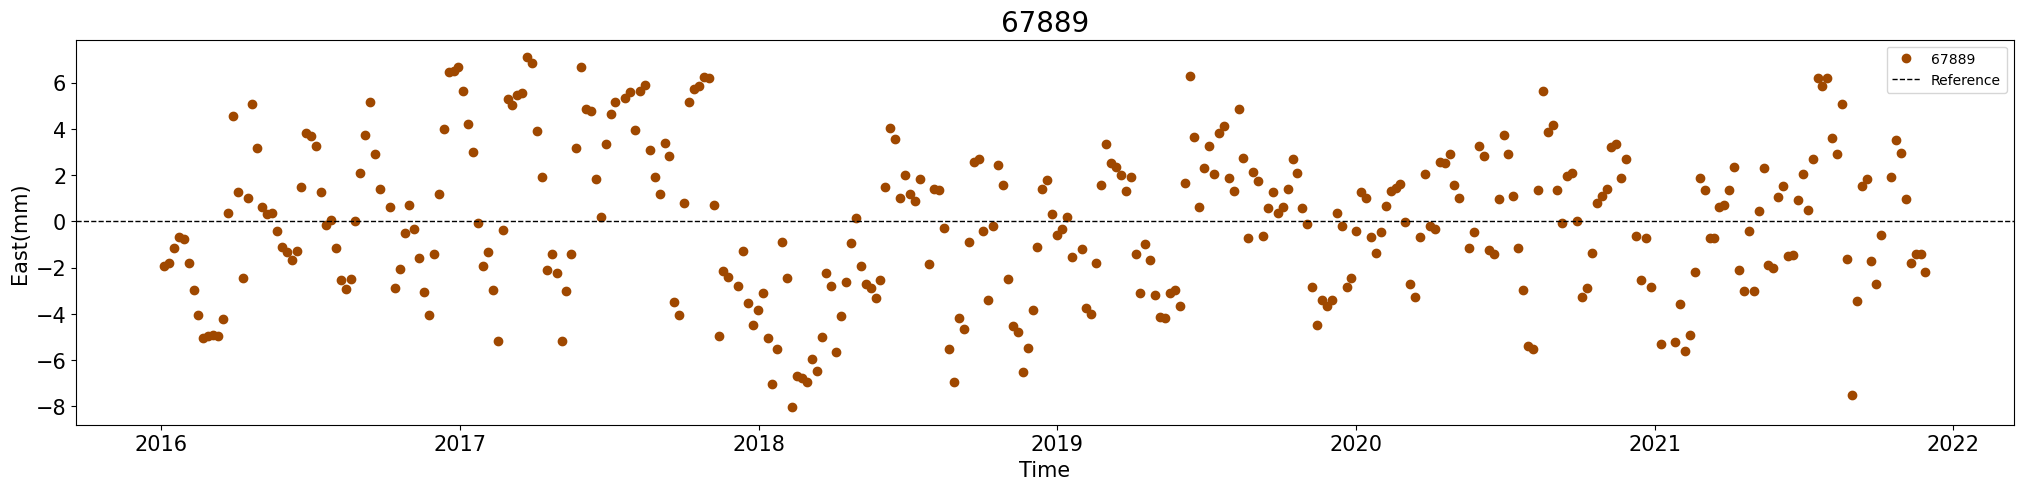

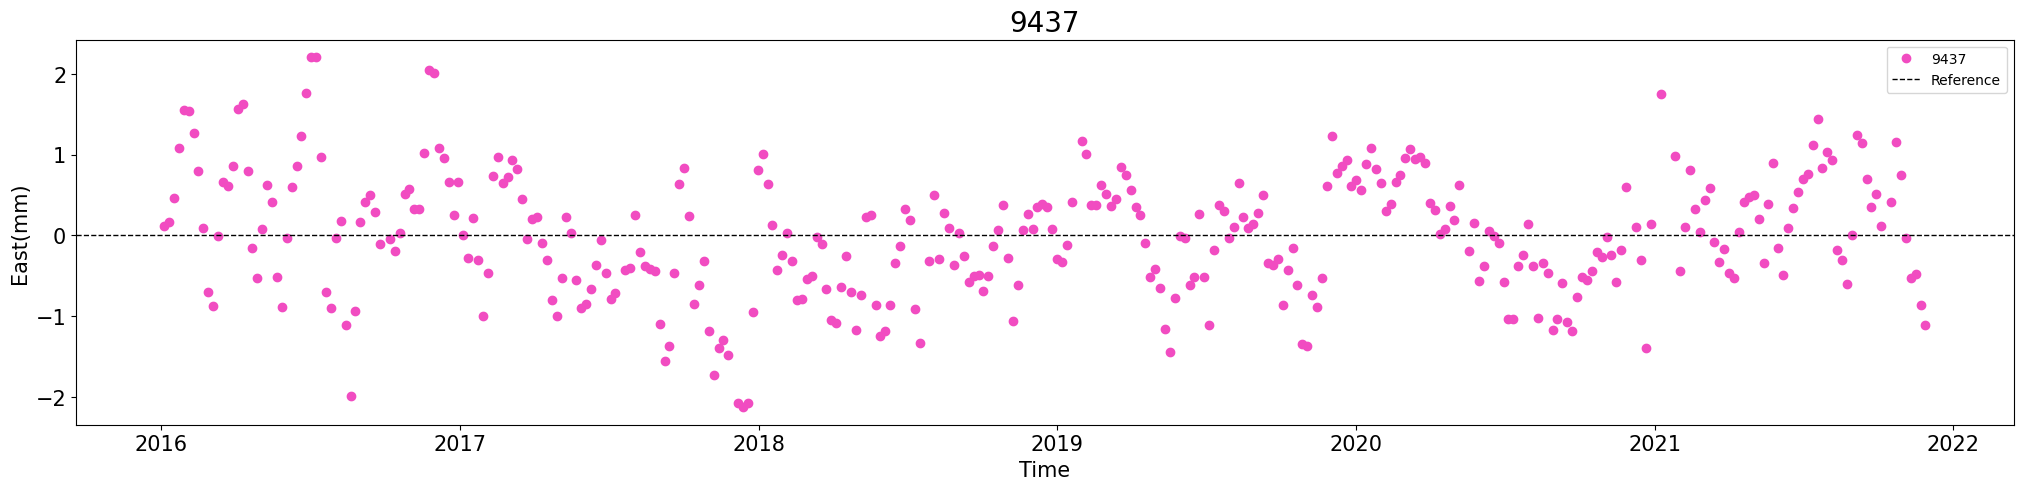

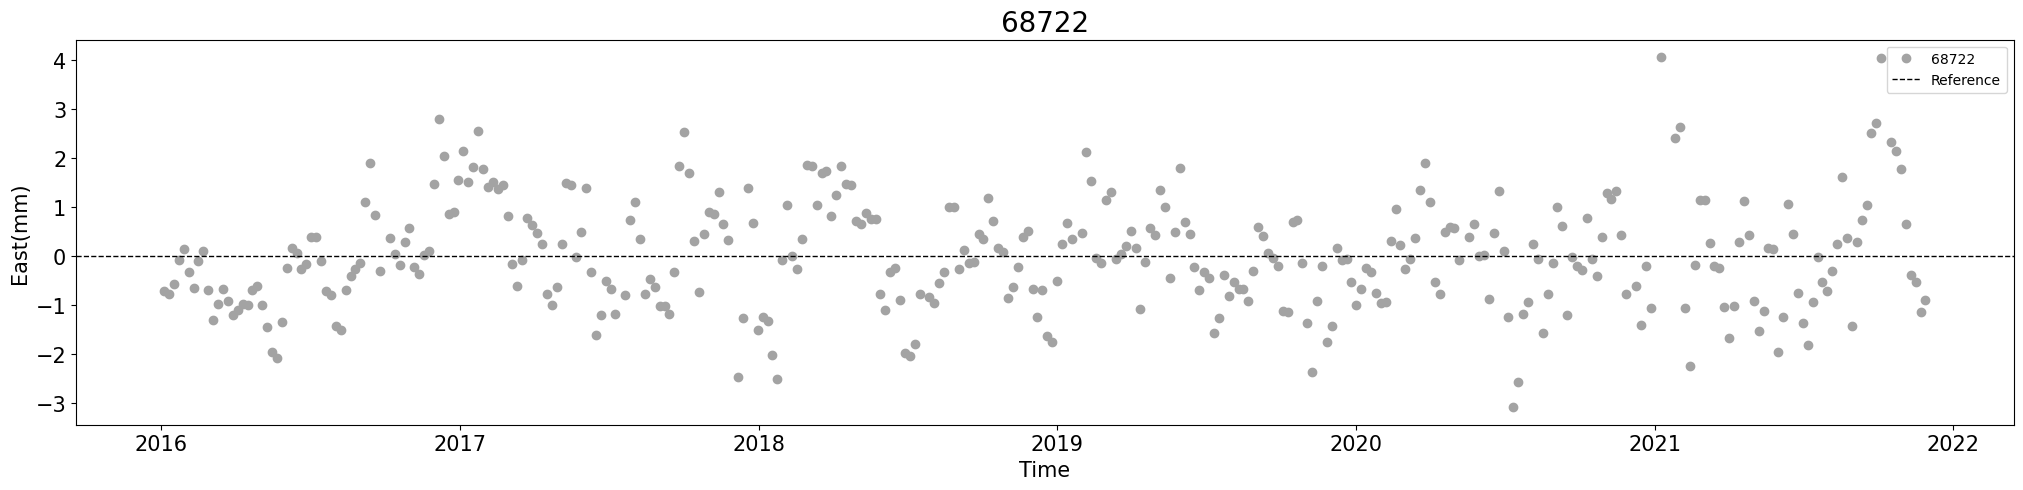

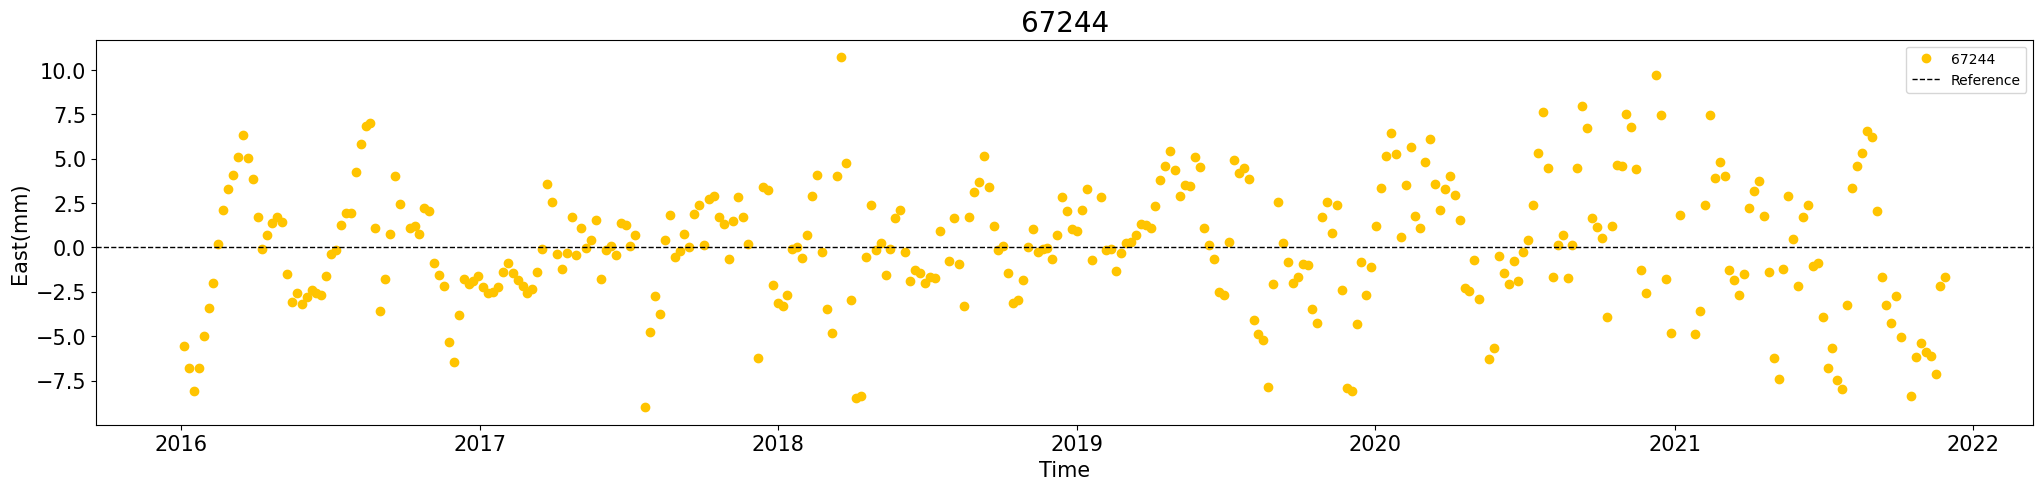

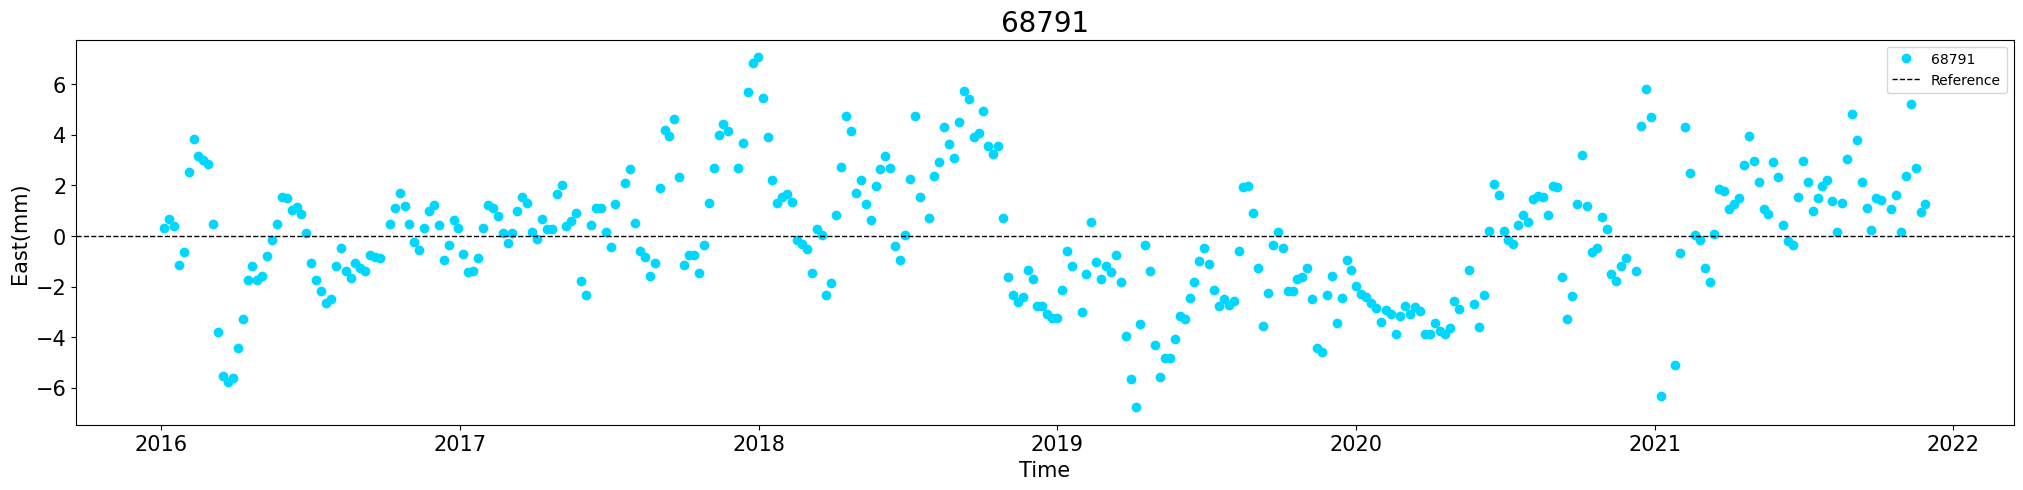

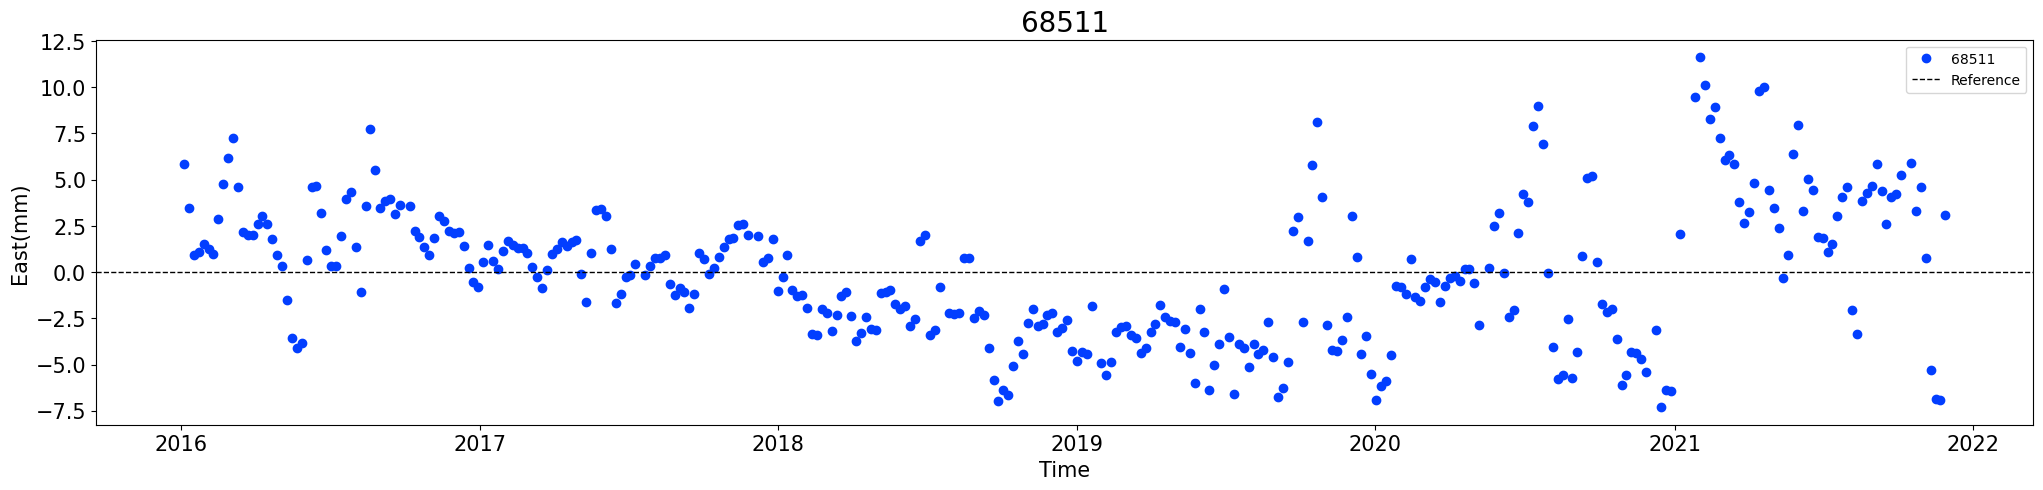

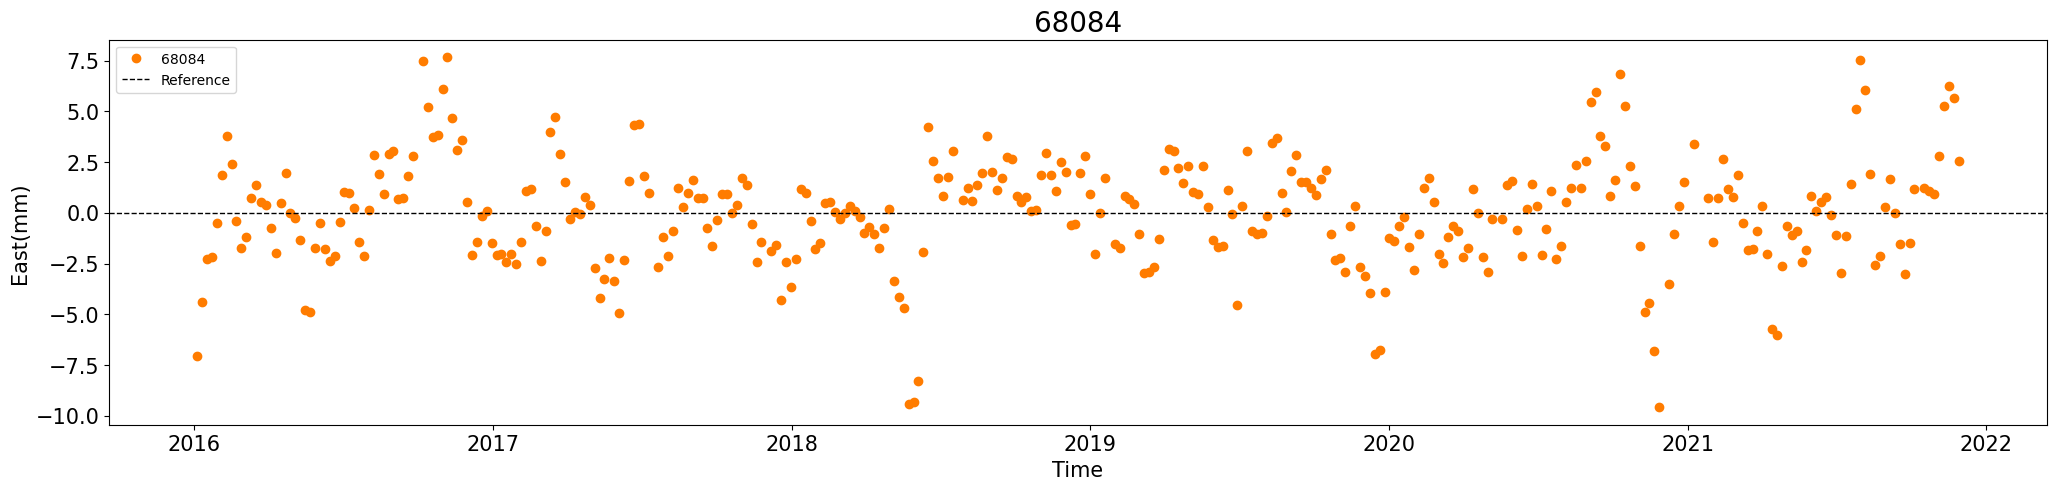

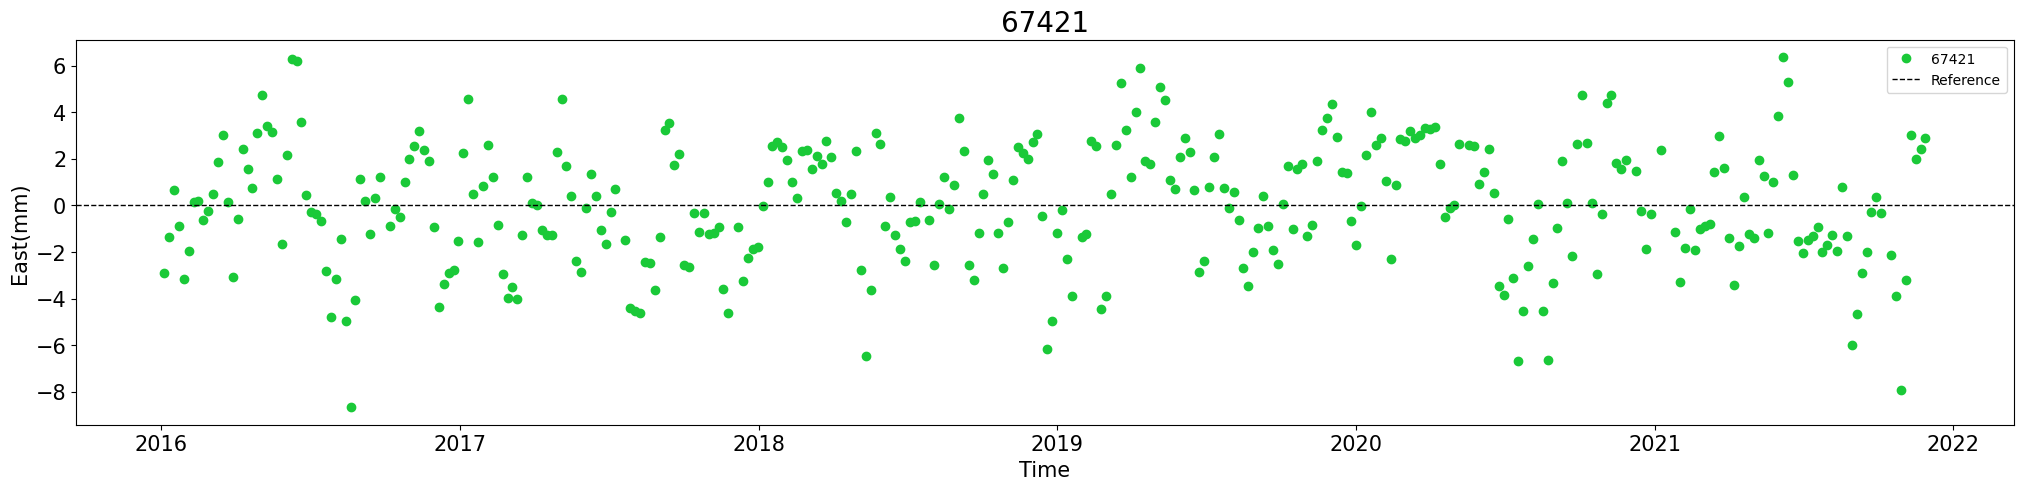

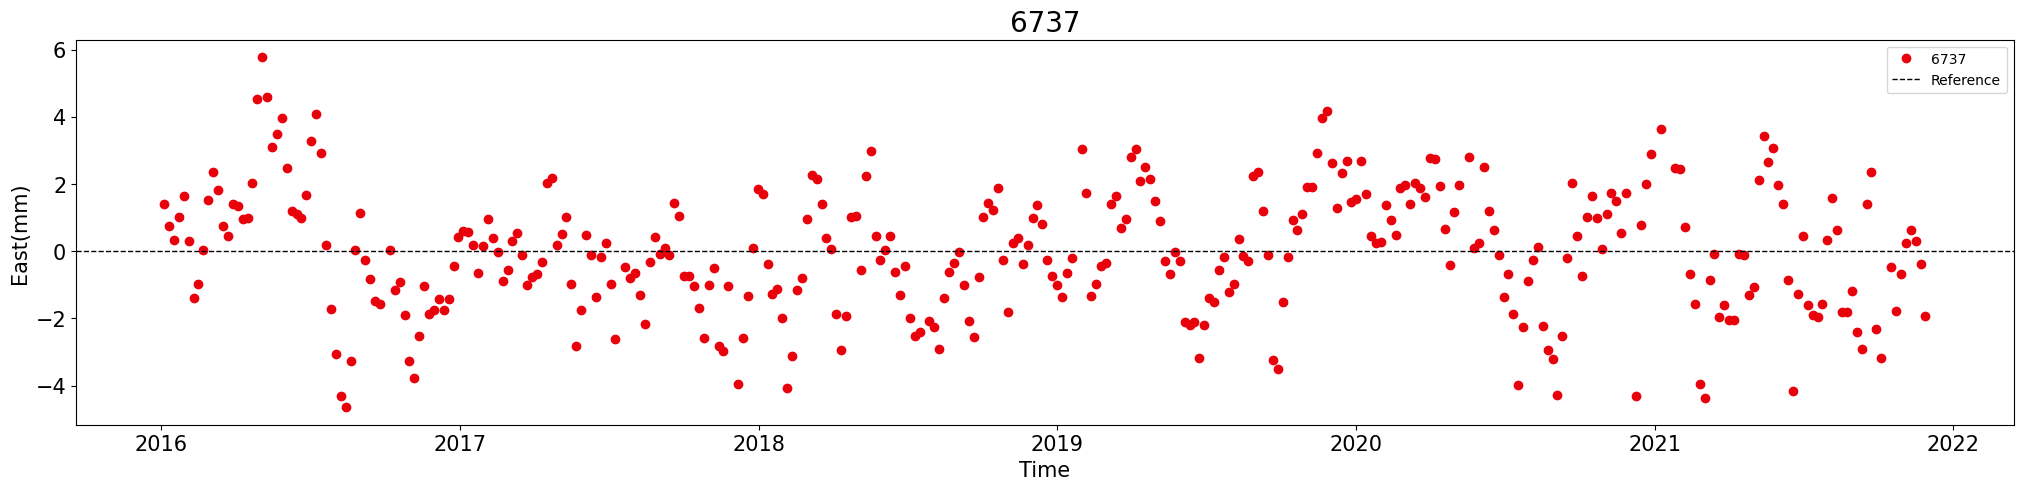

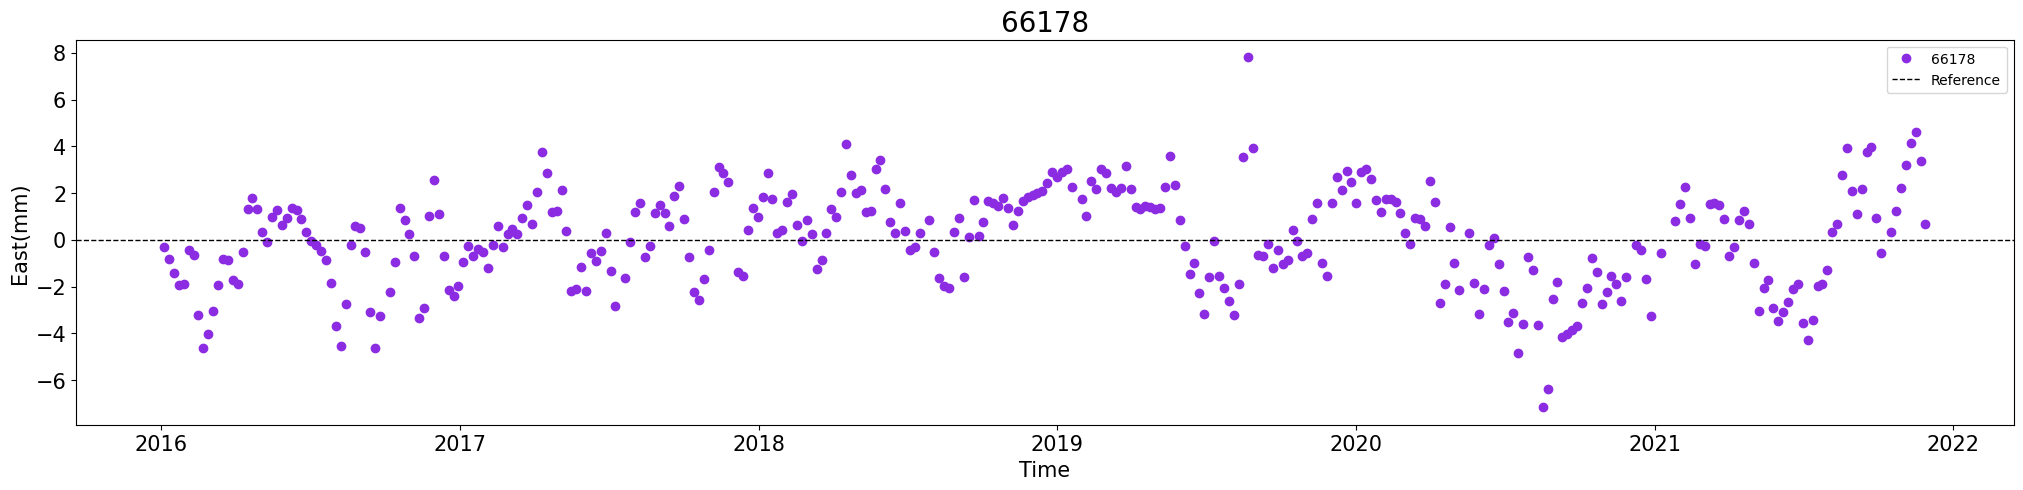

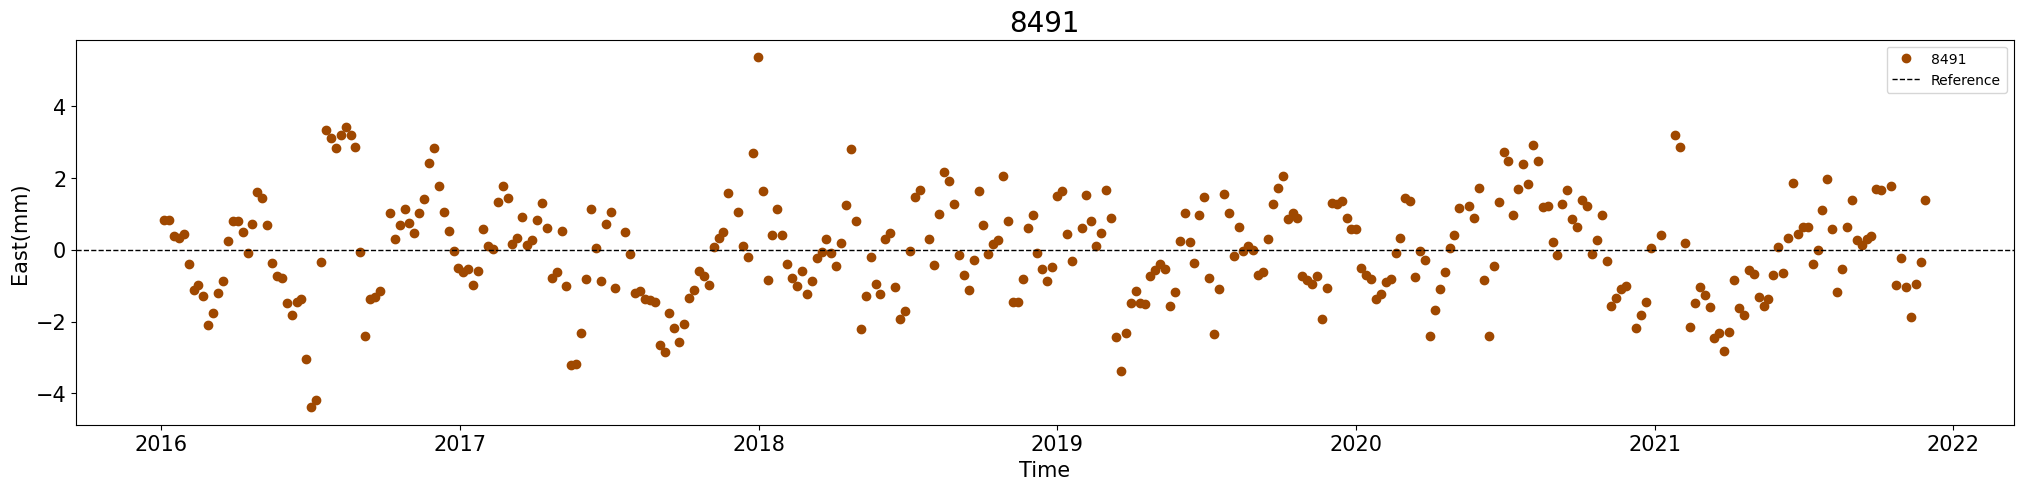

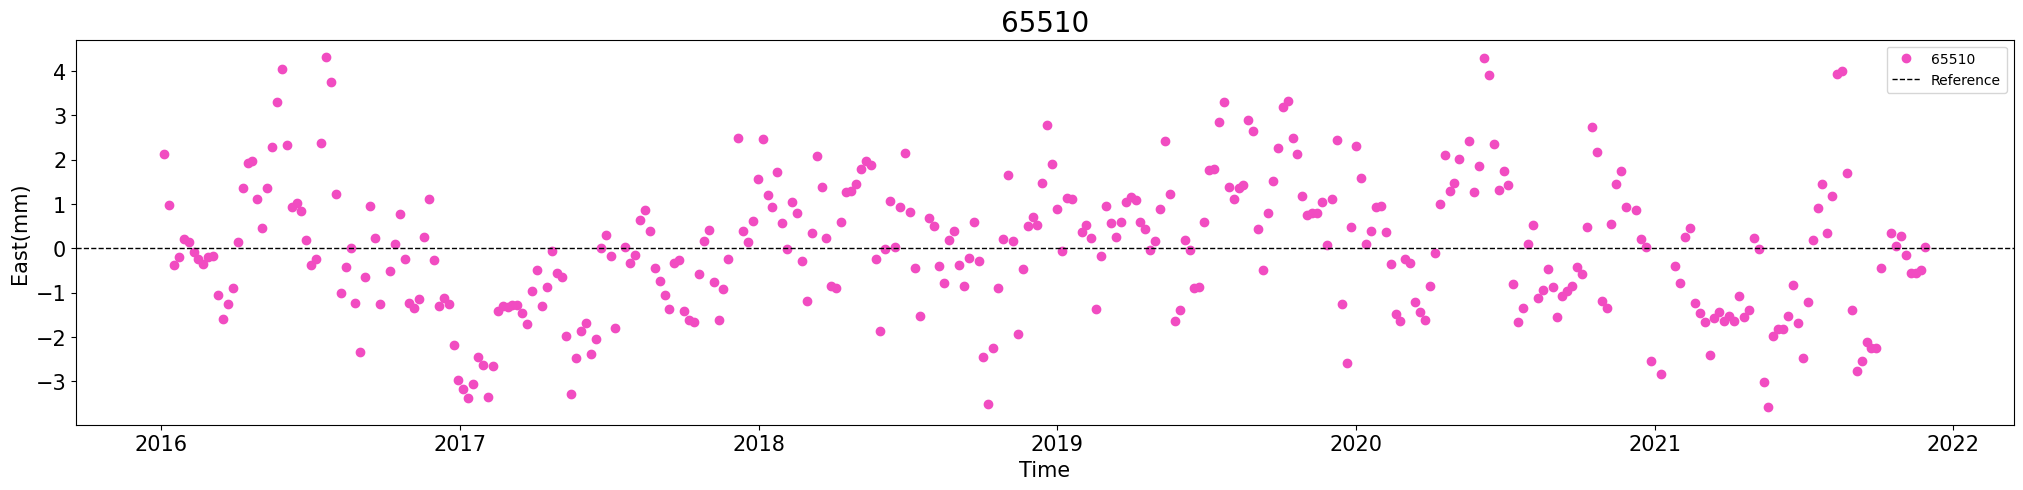

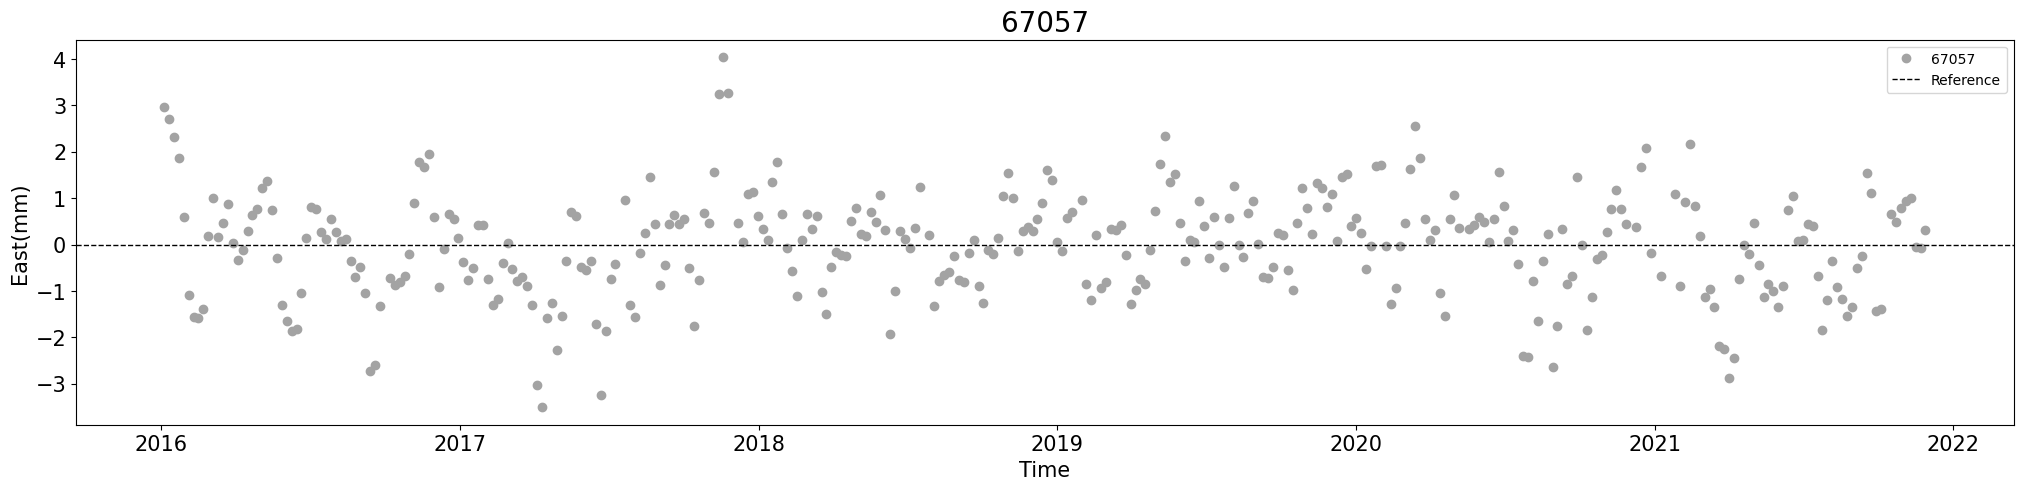

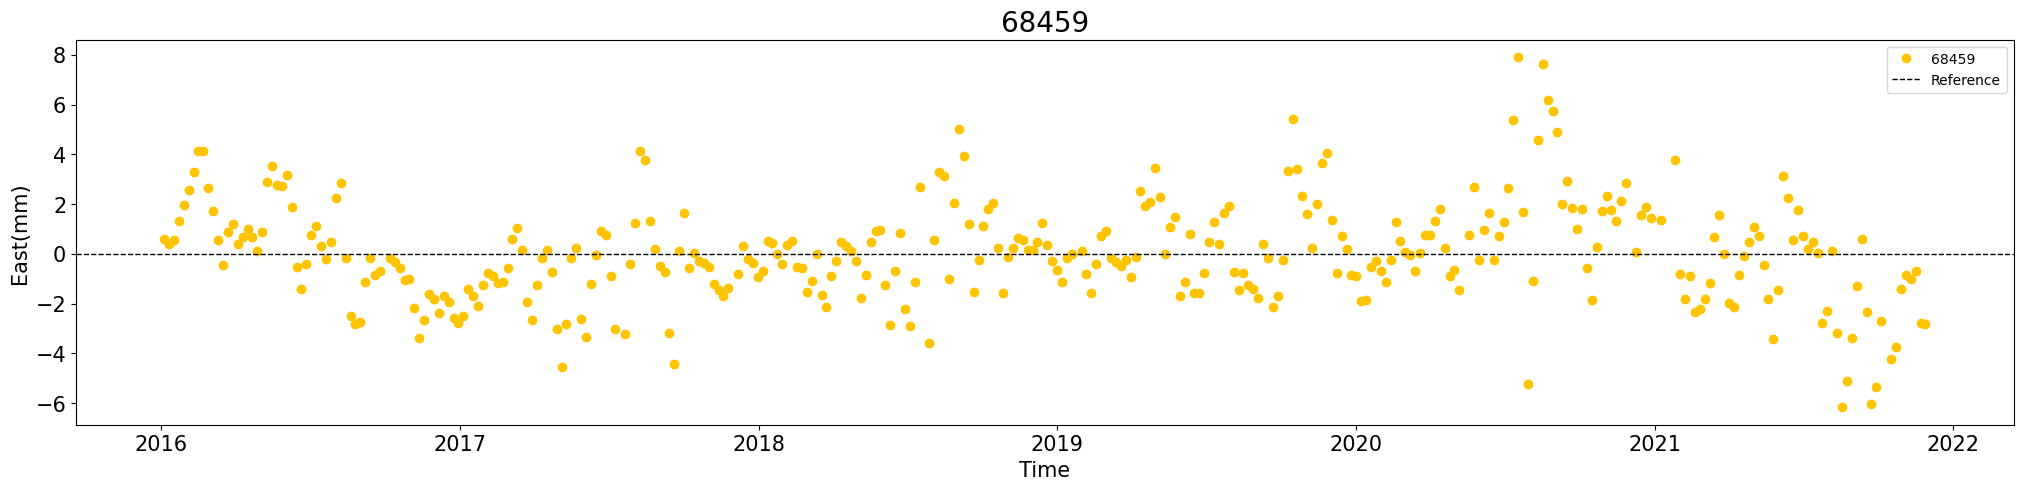

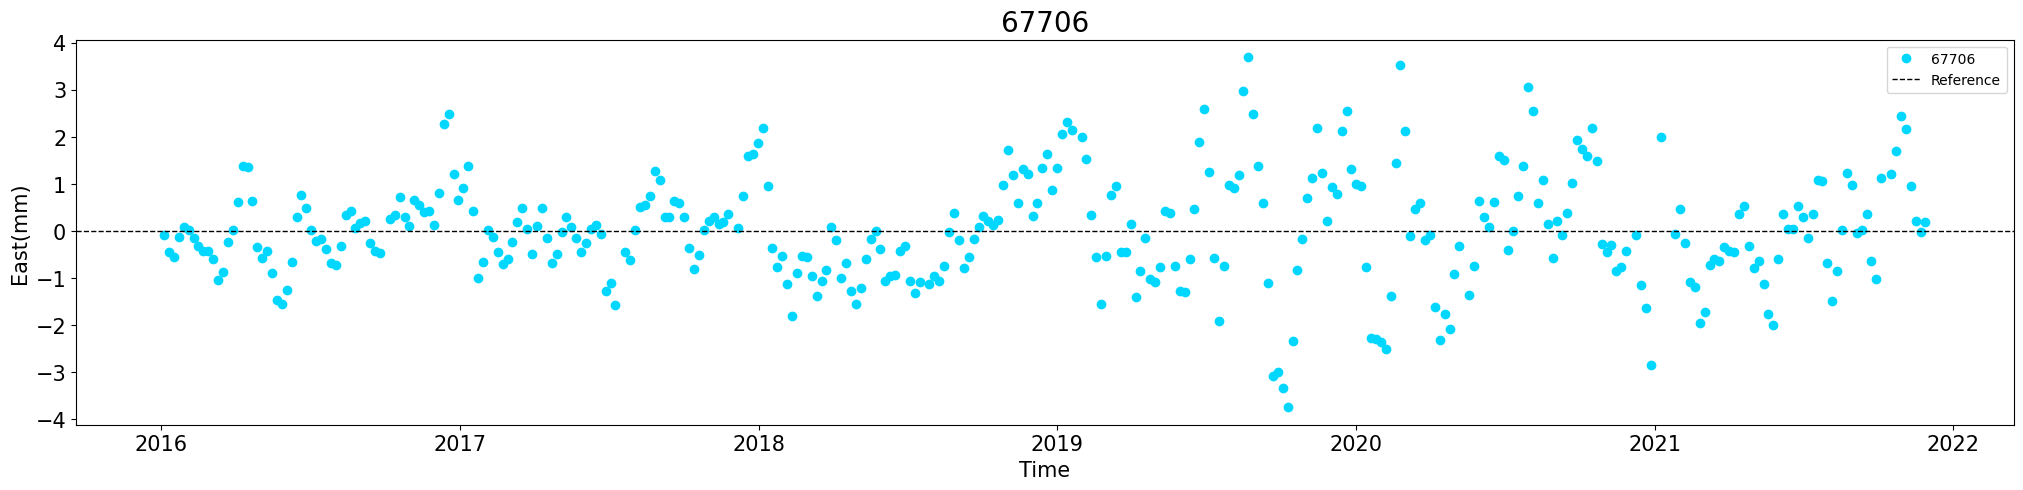

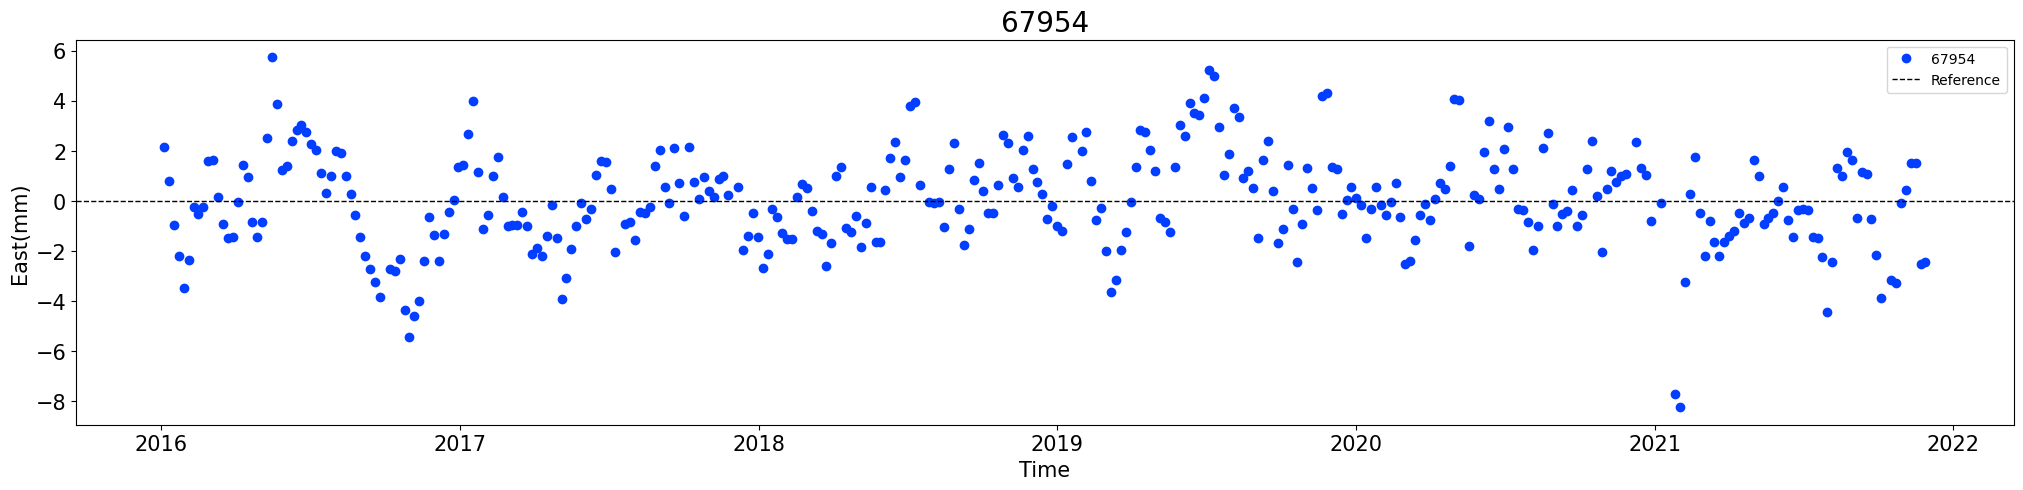

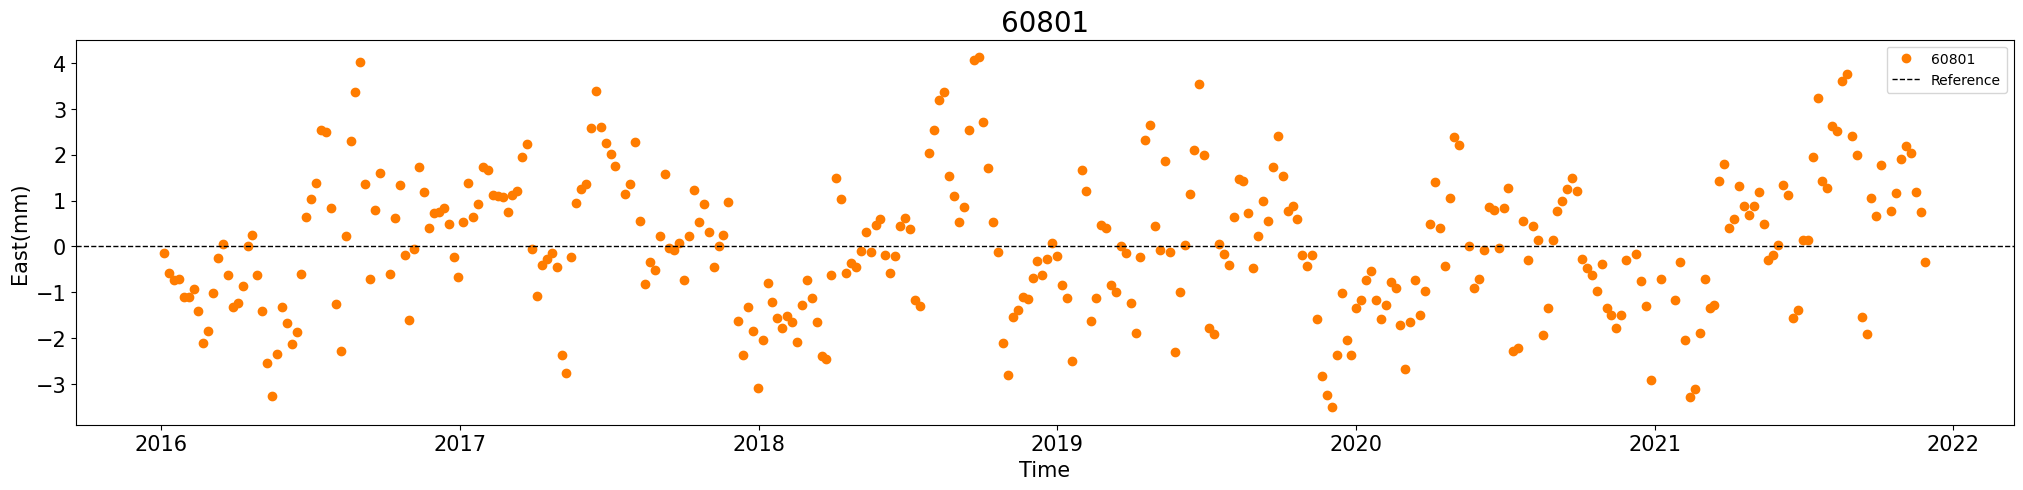

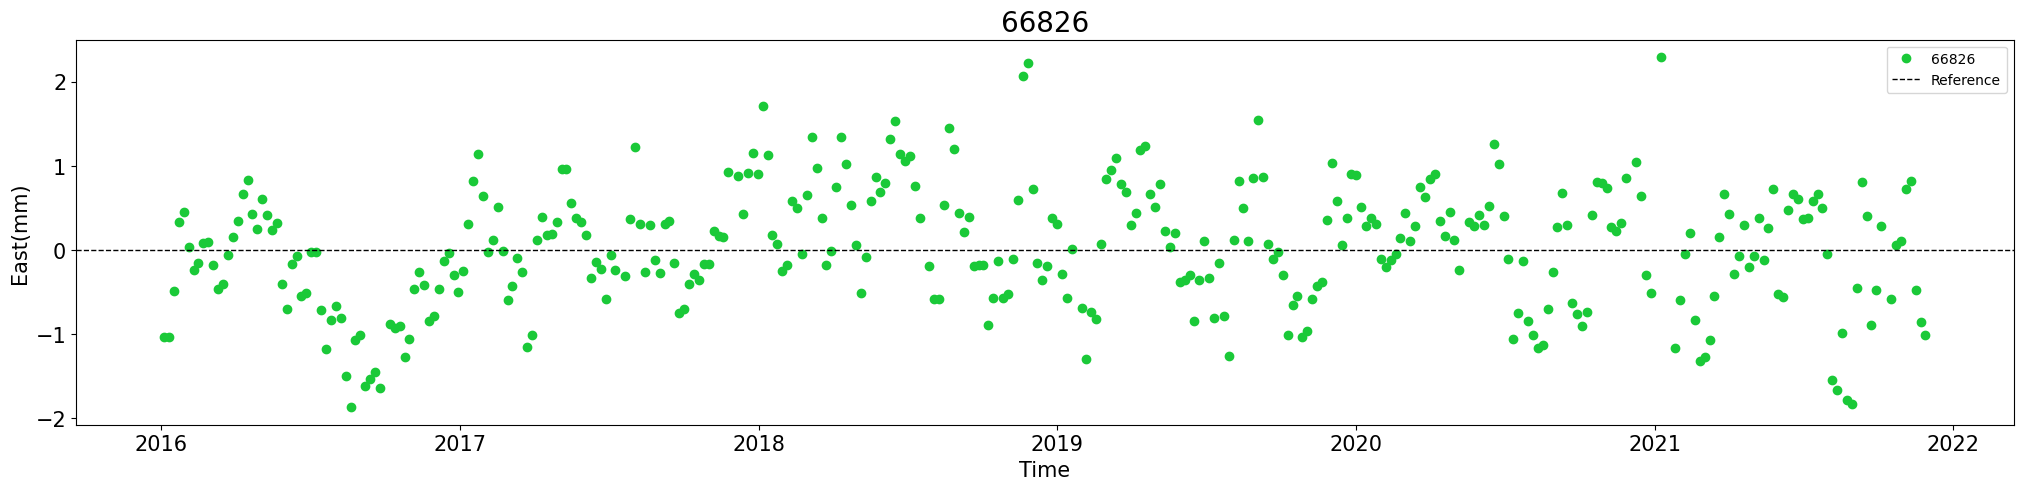

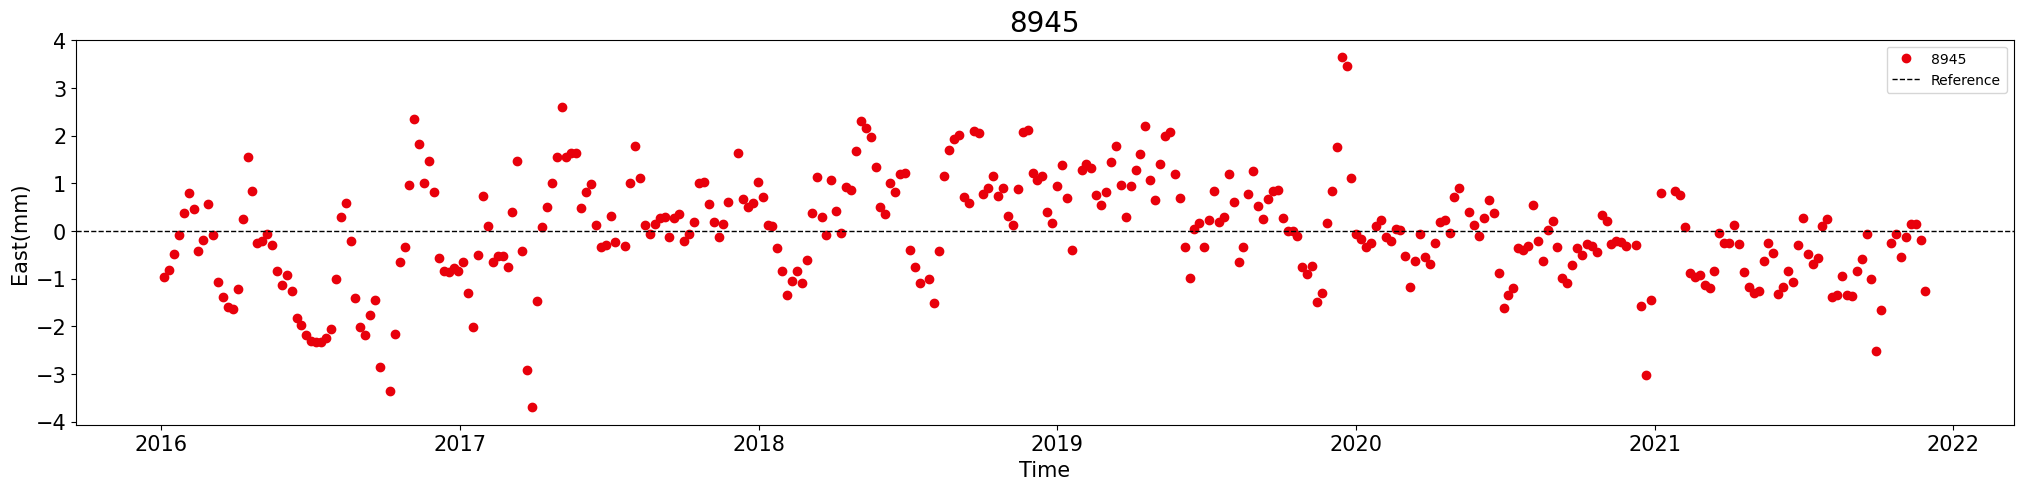

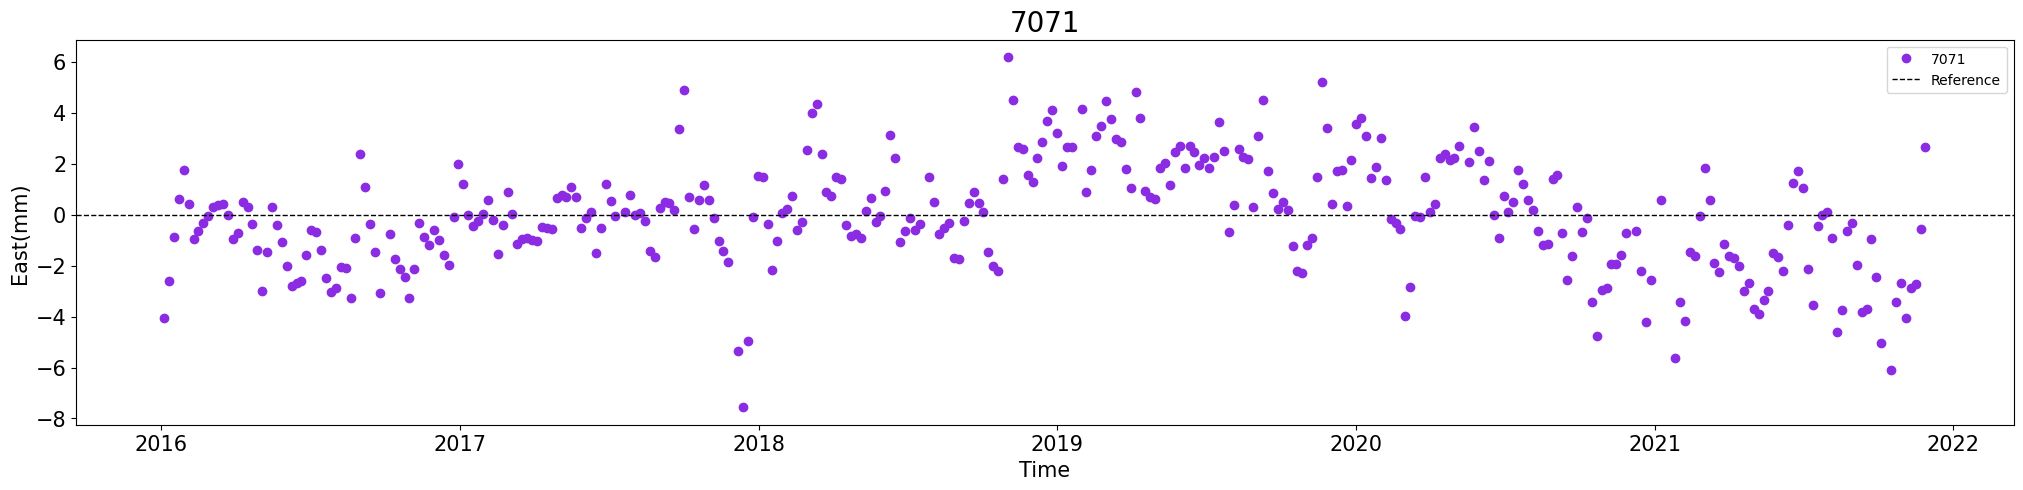

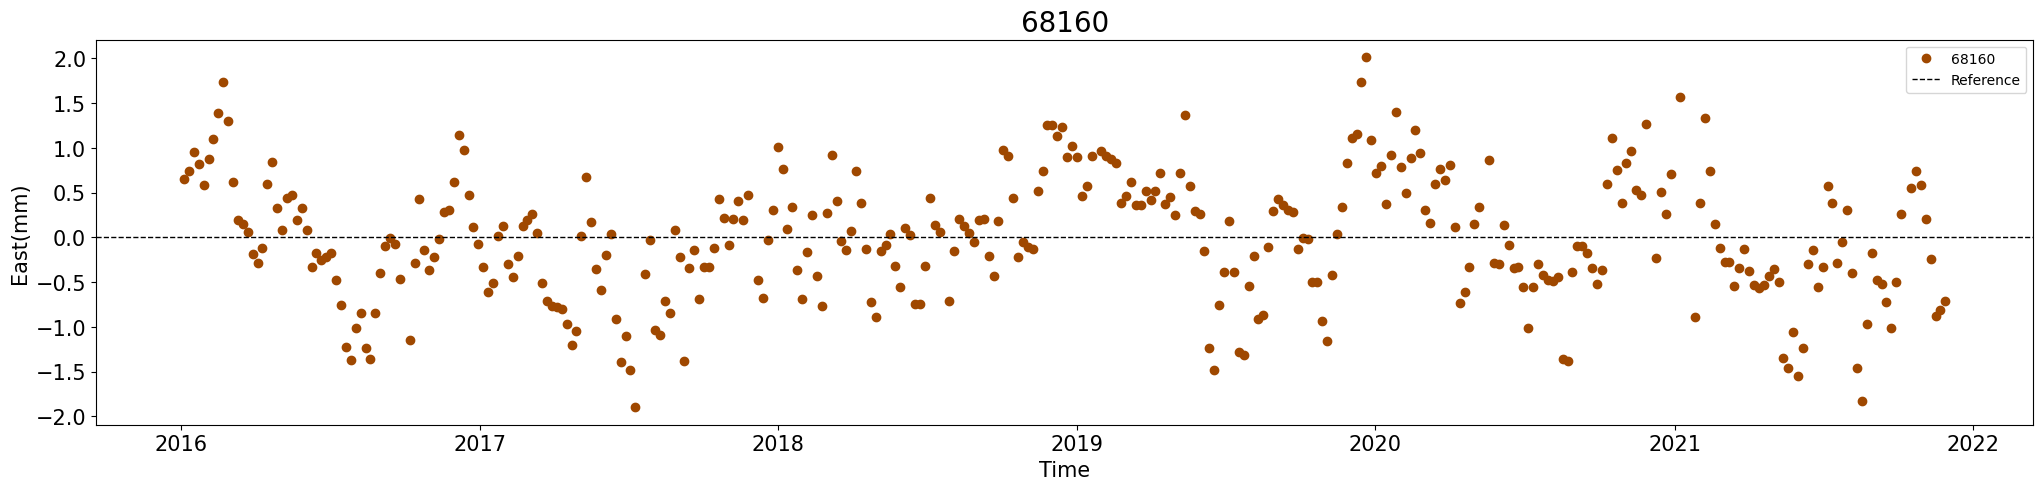

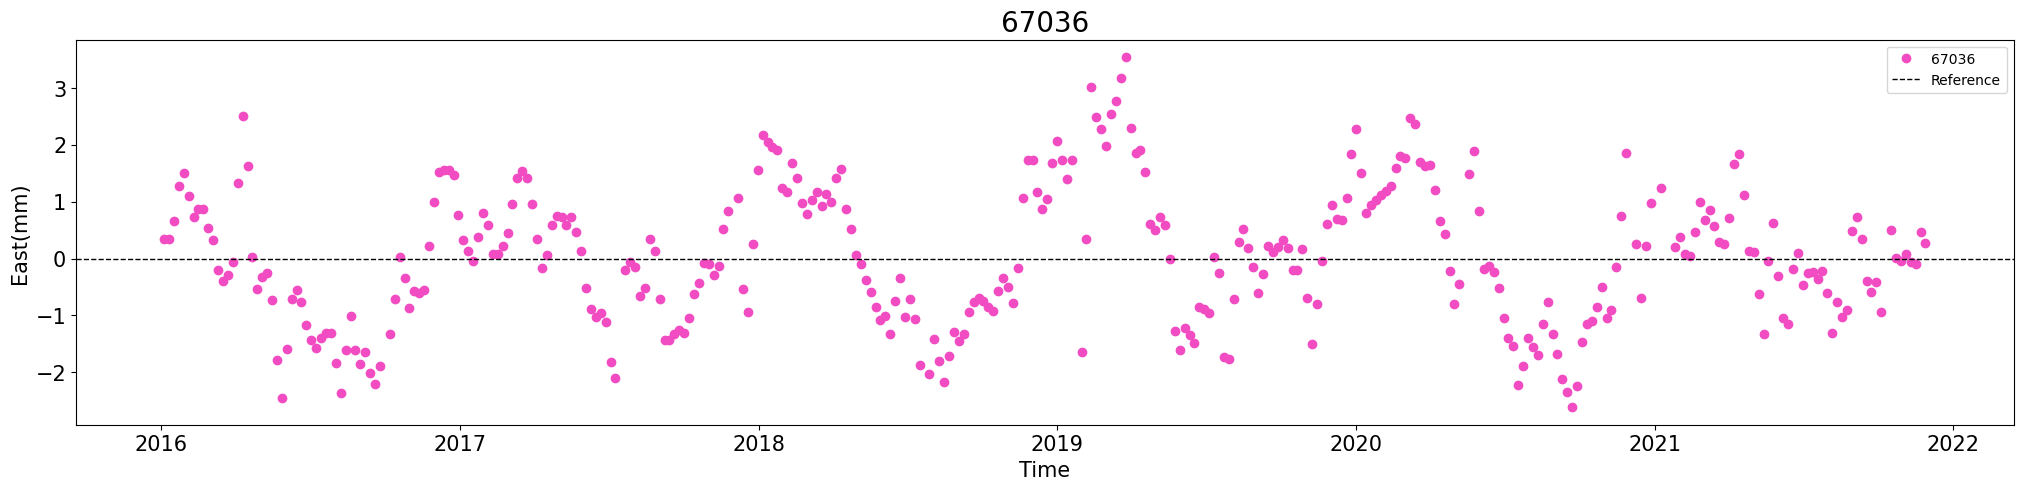

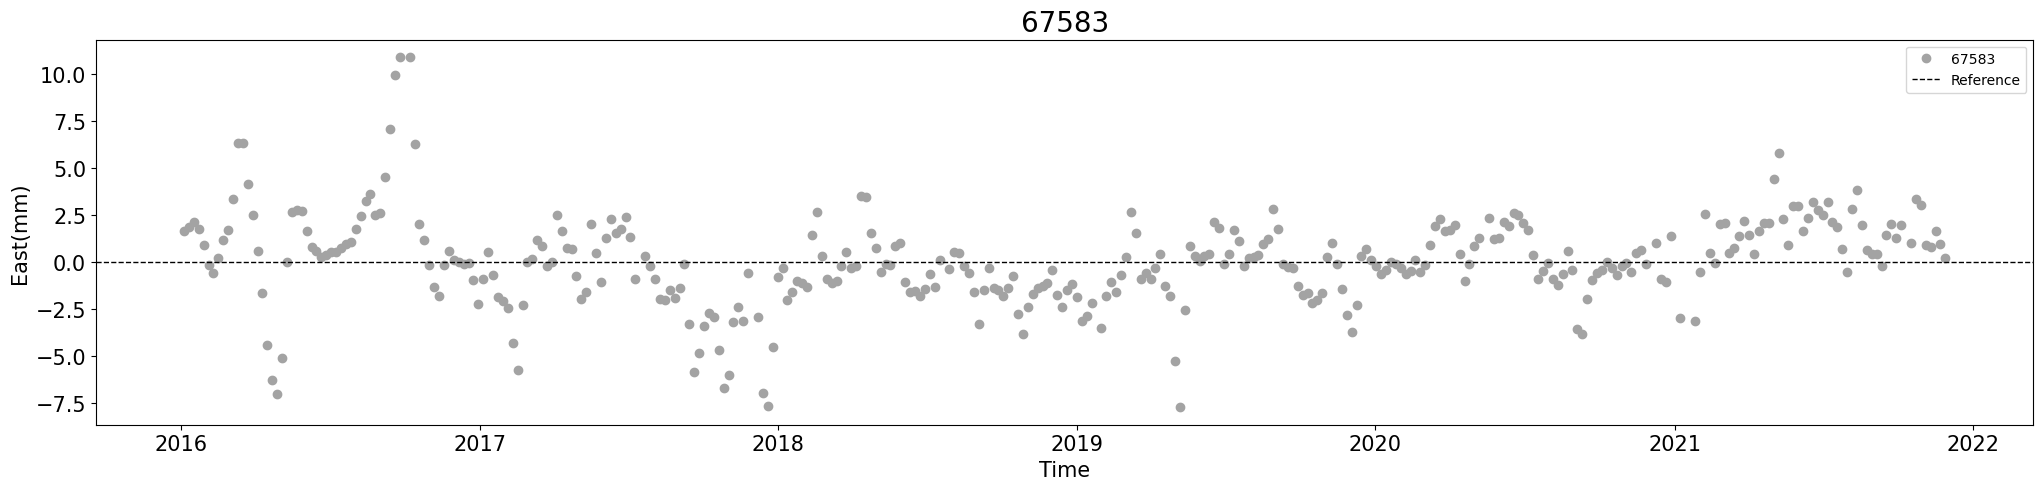

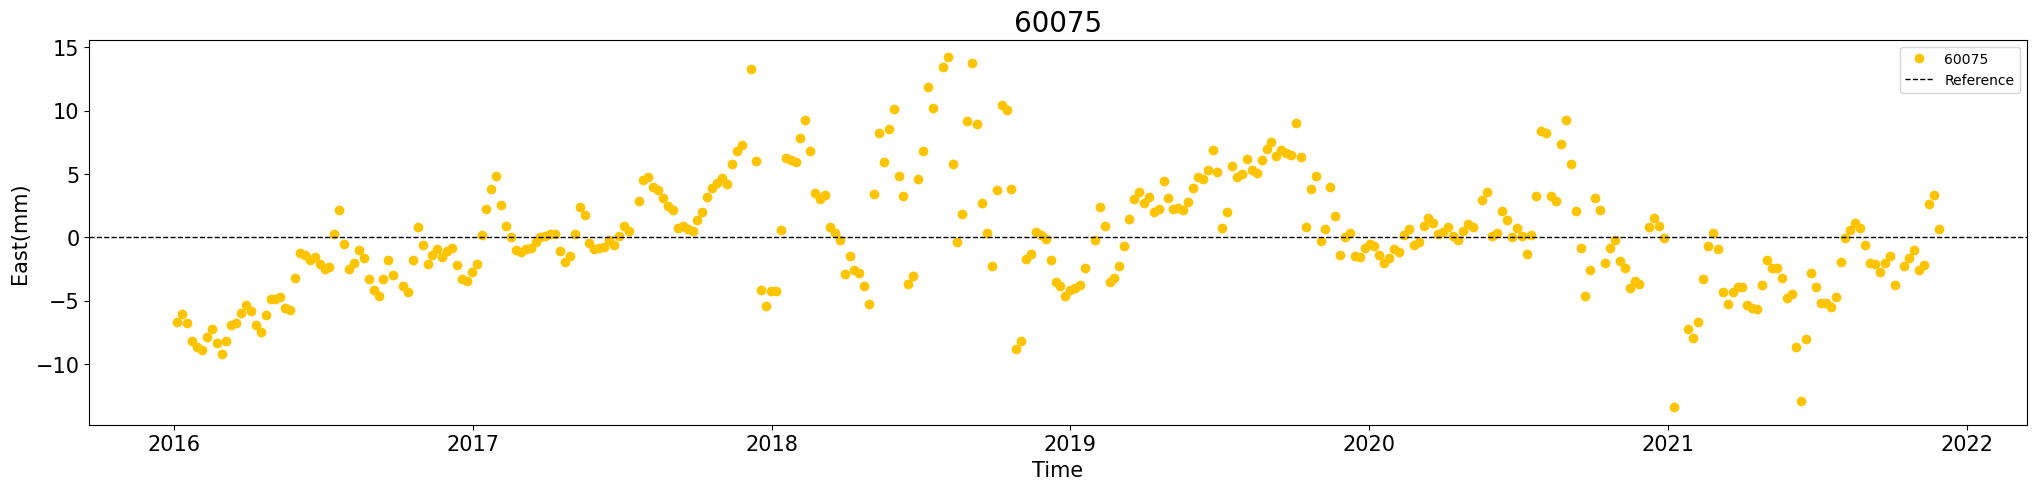

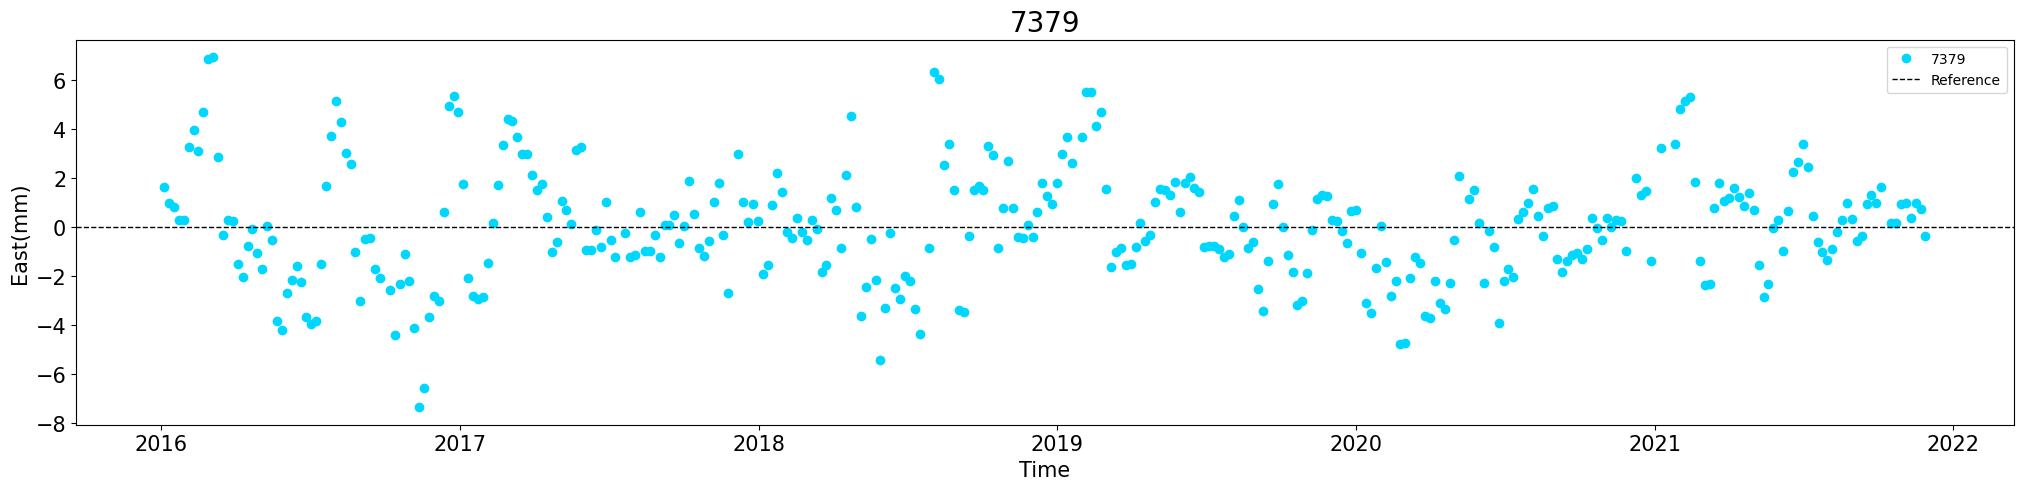

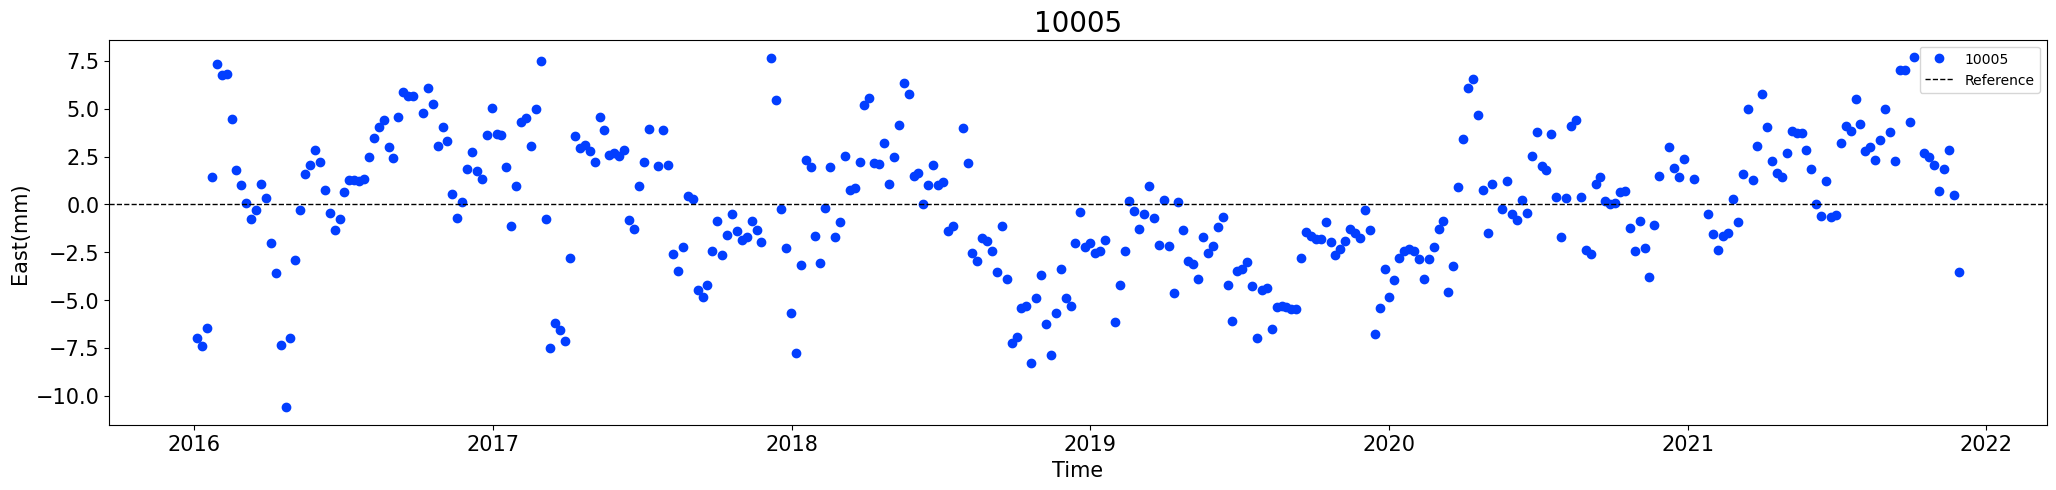

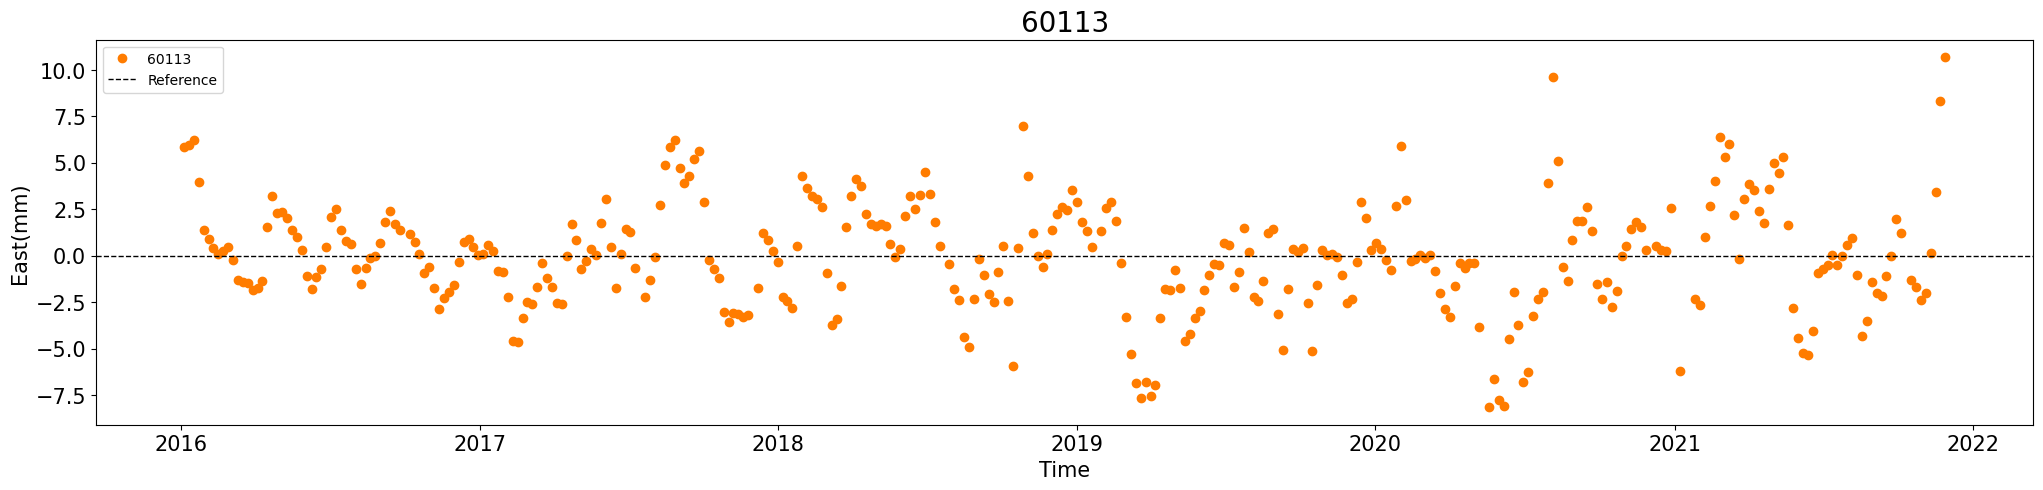

In [563]:
#checking the points plots - AFTER the reduction

colors = sns.color_palette("bright", len(points_avgrm_reduced))
folder = '/home/rafaela/internship/time_series/TimeSeries-insar/egm_files/insar_ts_plots/east/points_after_avg_rolling_mean'

for i, (column, color) in enumerate(zip(points_avgrm_reduced.columns, colors)):
    plt.figure(figsize=(25, 5))
    plt.plot(points_avgrm_reduced.index, points_avgrm_reduced[column], 'o', color=color, lw=2, label=column) 
    
    plt.title(f'{column}', fontsize = 20)
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1, label='Reference')
    plt.xlabel('Time', fontsize = 15)
    plt.xticks(fontsize=15)
    plt.ylabel('East(mm)', fontsize = 15)                                       
    plt.yticks(fontsize=15)
    #plt.ylim(-0.008,0.008)
    #plt.xlim(pd.Timestamp('2011-01-15'), pd.Timestamp('2018-07-15'))

    plt.legend()
    
    fl = os.path.join(folder, f'{column}.svg')
    f = io.BytesIO()
    plt.savefig(fl, format="svg")
    
    plt.show()

In [564]:
avg_rm_df

avg_east(mm)
2016-01-05      2.121113
2016-01-11      2.030377
2016-01-17      1.790979
2016-01-23      1.536626
2016-01-29      1.379929
...                  ...
2021-11-22      0.161531
2021-11-28      0.321240
2021-12-04      0.497997
2021-12-16      1.032583
2021-12-22      1.039372

[363 rows x 1 columns]

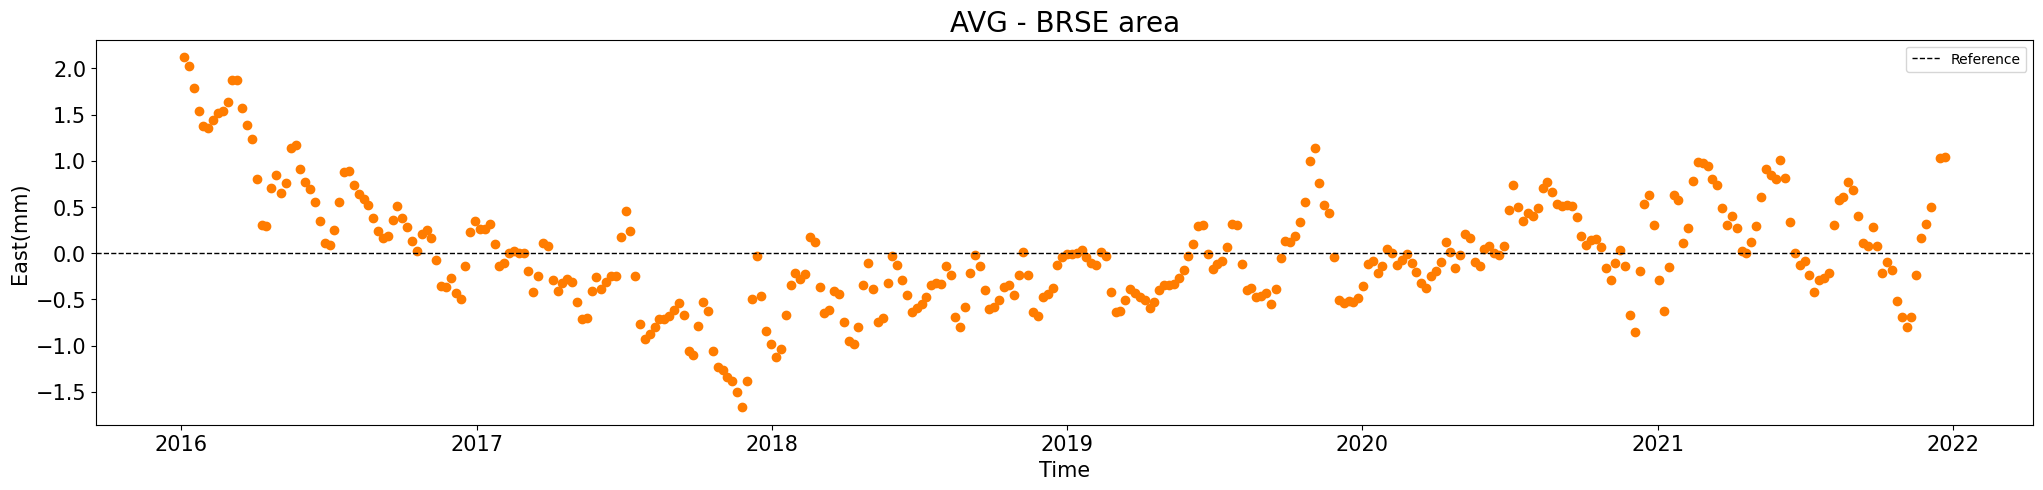

In [565]:
folder = '/home/rafaela/internship/time_series/TimeSeries-insar/egm_files/insar_ts_plots/east'

plt.figure(figsize=(25, 5))

plt.plot(avg_rm_df.index, avg_rm_df, 'o', color=color, lw=2) 
plt.title('AVG - BRSE area', fontsize = 20)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, label='Reference')
plt.xlabel('Time', fontsize = 15)
plt.xticks(fontsize=15)
plt.ylabel('East(mm)', fontsize = 15)                                       
plt.yticks(fontsize=15)
#plt.ylim(-0.008,0.008)
#plt.xlim(pd.Timestamp('2011-01-15'), pd.Timestamp('2018-07-15'))

plt.legend()
    
fl = os.path.join(folder, 'AVG - BRSE.svg')
f = io.BytesIO()
plt.savefig(fl, format="svg")
    
plt.show()

In [528]:
vitt_canv_1 = pd.read_csv('/home/rafaela/internship/time_series/TimeSeries-insar/egm_files/vitt_canv_1.csv')
vitt_canv_2 = pd.read_csv('/home/rafaela/internship/time_series/TimeSeries-insar/egm_files/vitt_canv_2.csv')

vitt_canv = pd.merge(vitt_canv_1, vitt_canv_2)
vitt_canv.isnull()

Unnamed: 0  187839  192757  186380  193039  146154  164325  184227  \
0         False   False   False   False   False   False   False   False   
1         False   False   False   False   False   False   False   False   
2         False   False   False   False   False   False   False   False   
3         False   False   False   False   False   False   False   False   
4         False   False   False   False   False   False   False   False   
..          ...     ...     ...     ...     ...     ...     ...     ...   
359       False   False   False   False   False   False   False   False   
360       False   False   False   False   False   False   False   False   
361       False   False   False   False   False   False   False   False   
362       False   False   False   False   False   False   False   False   
363       False   False   False   False   False   False   False   False   

     186799  188736  ...  10442   1318  10529  15616  10344   1413  10421  \
0     False   False  ...  False  False  False  False  False  False  False   
1     False   False  ...  False  False  False  False  False  False  False   
2     False   False  ...  False  False  False  False  False  False  False   
3     False   False  ...  False  False  False  False  False  False  False   
4     False   False  ...  False  False  False  False  False  False  False   
..      ...     ...  ...    ...    ...    ...    ...    ...    ...    ...   
359   False   False  ...  False  False  False  False  False  False  False   
360   False   False  ...  False  False  False  False  False  False  False   
361   False   False  ...  False  False  False  False  False  False  False   
362   False   False  ...  False  False  False  False  False  False  False   
363   False   False  ...  False  False  False  False  False  False  False   

     16568  15808   2129  
0    False  False  False  
1    False  False  False  
2    False  False  False  
3    False  False  False  
4    False  False  False  
..     ...    ...    ...  
359  False  False  False  
360  False  False  False  
361  False  False  False  
362  False  False  False  
363  False  False  False  

[364 rows x 44 columns]